In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# 加载数据
data_houses = pd.read_csv(
    "D:/University of Macau/Introduction to dada science programming/final project/processed_lianjia_data(2).csv")
print(data_houses.tail(5))

       Bedroom_count  Living_room_count    area  total_floors  total_price  \
22683            2.0                1.0   53.90             7        245.0   
22684            2.0                1.0   58.40             6        305.0   
22685            3.0                2.0  149.42             7       1030.0   
22686            2.0                1.0   90.15             7        680.0   
22687            1.0                1.0   55.45             6        205.0   

       price_per_sqm  bedroom_0.0  bedroom_1.0  bedroom_2.0  bedroom_3.0  ...  \
22683        45455.0            0            0            1            0  ...   
22684        52227.0            0            0            1            0  ...   
22685        68934.0            0            0            0            1  ...   
22686        75430.0            0            0            1            0  ...   
22687        36971.0            0            1            0            0  ...   

       district_Mentougou  district_Shunyi  

带有"orientation"关键词的列数: 82
总共需要生成 10 张图


C:\Users\wwy\AppData\Local\Temp\ipykernel_27796\2268197567.py:77: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  iqr_vector = pd.concat([iqr_vector, new_df], ignore_index=True)


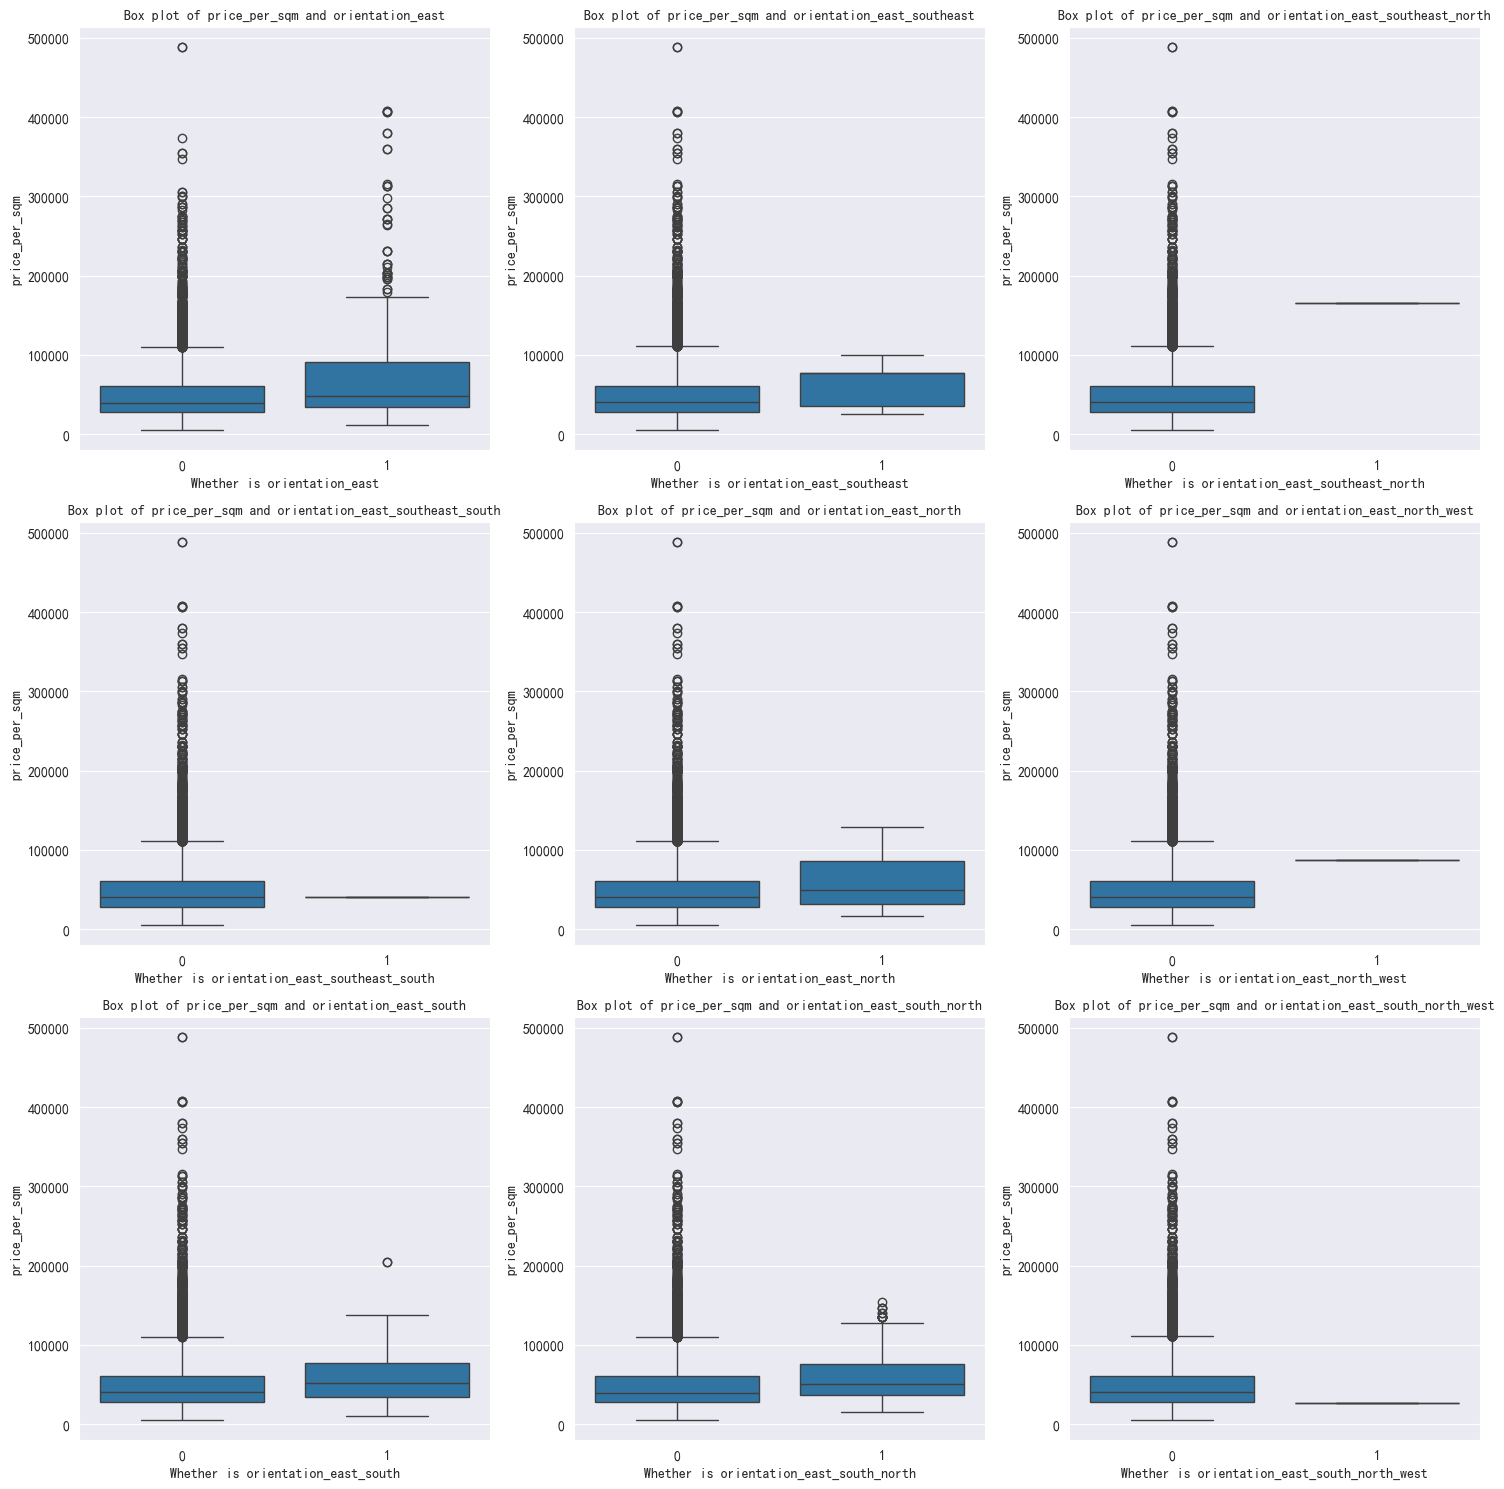

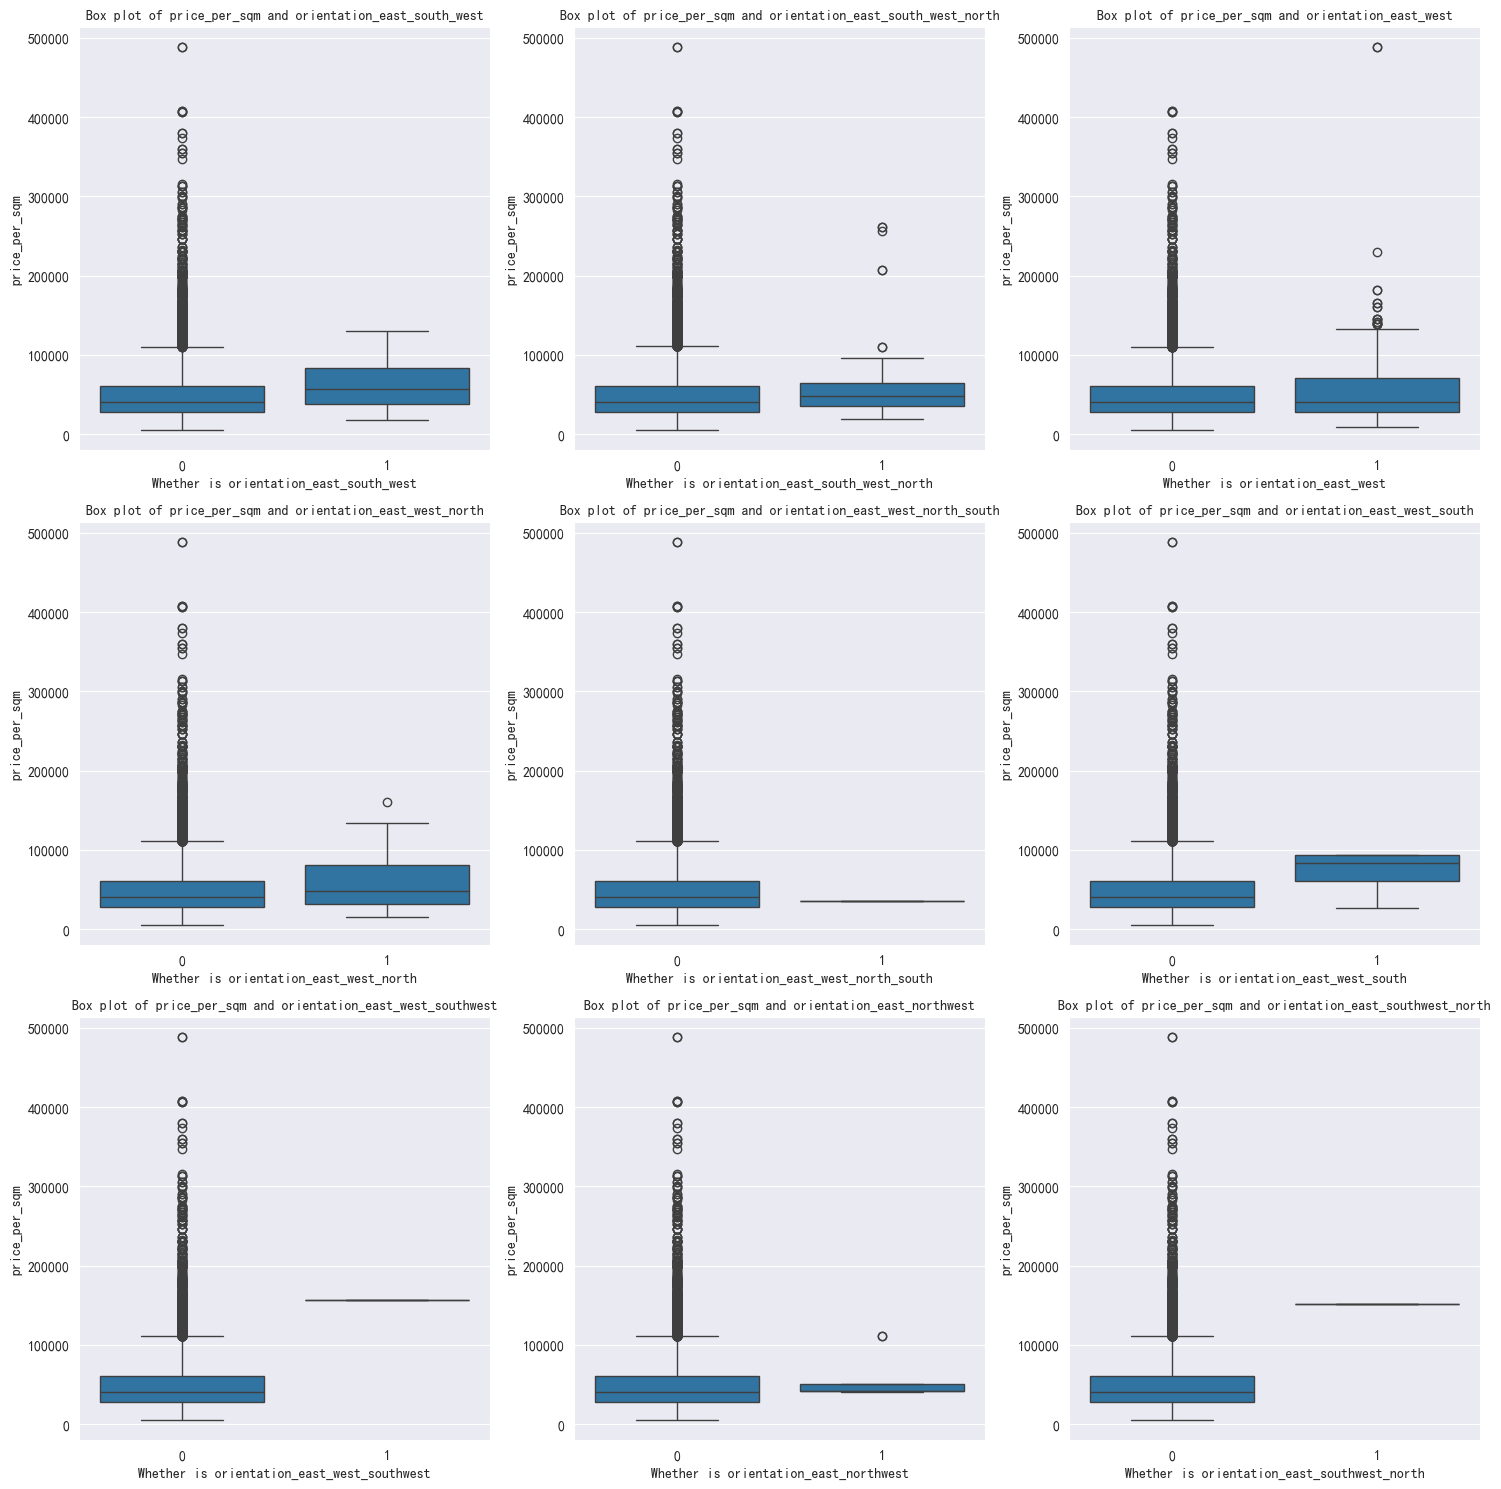

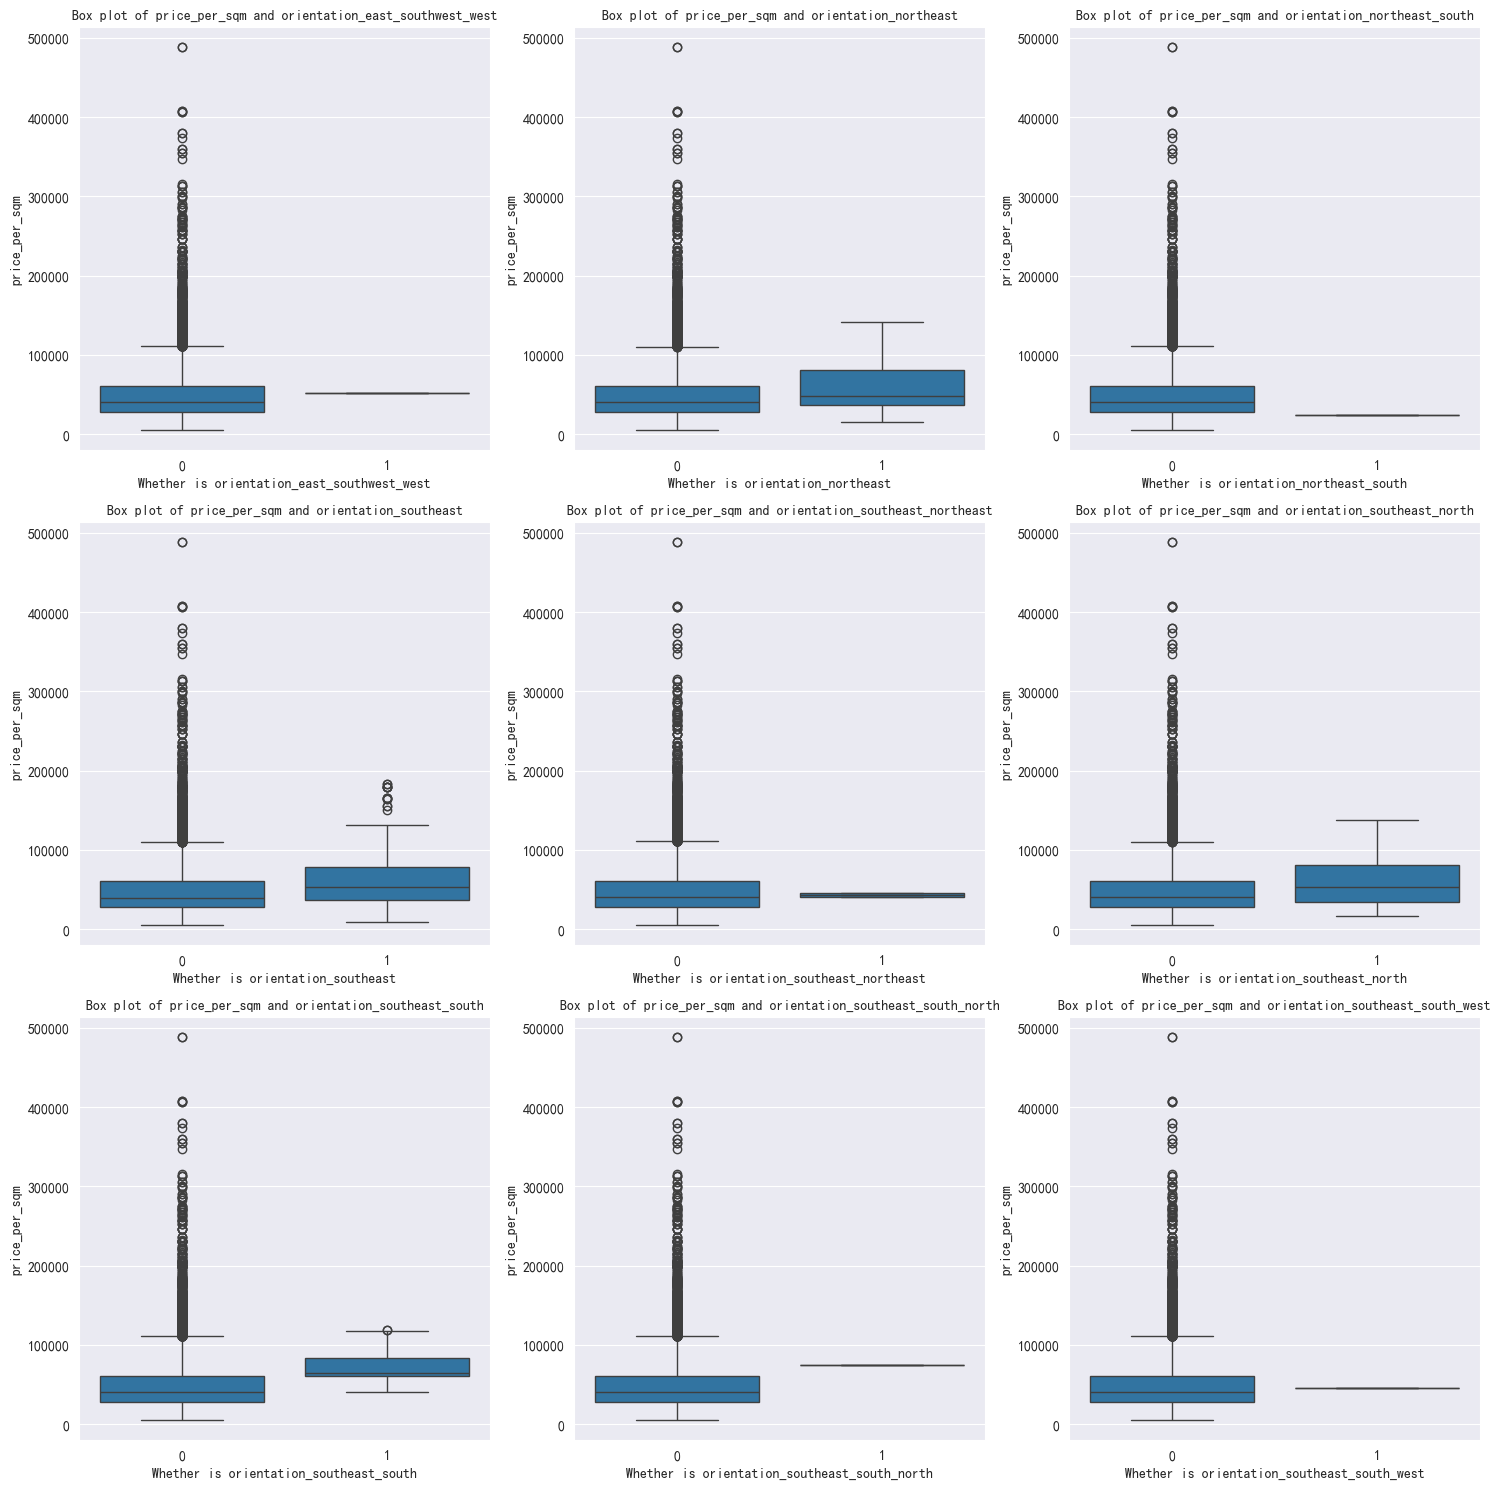

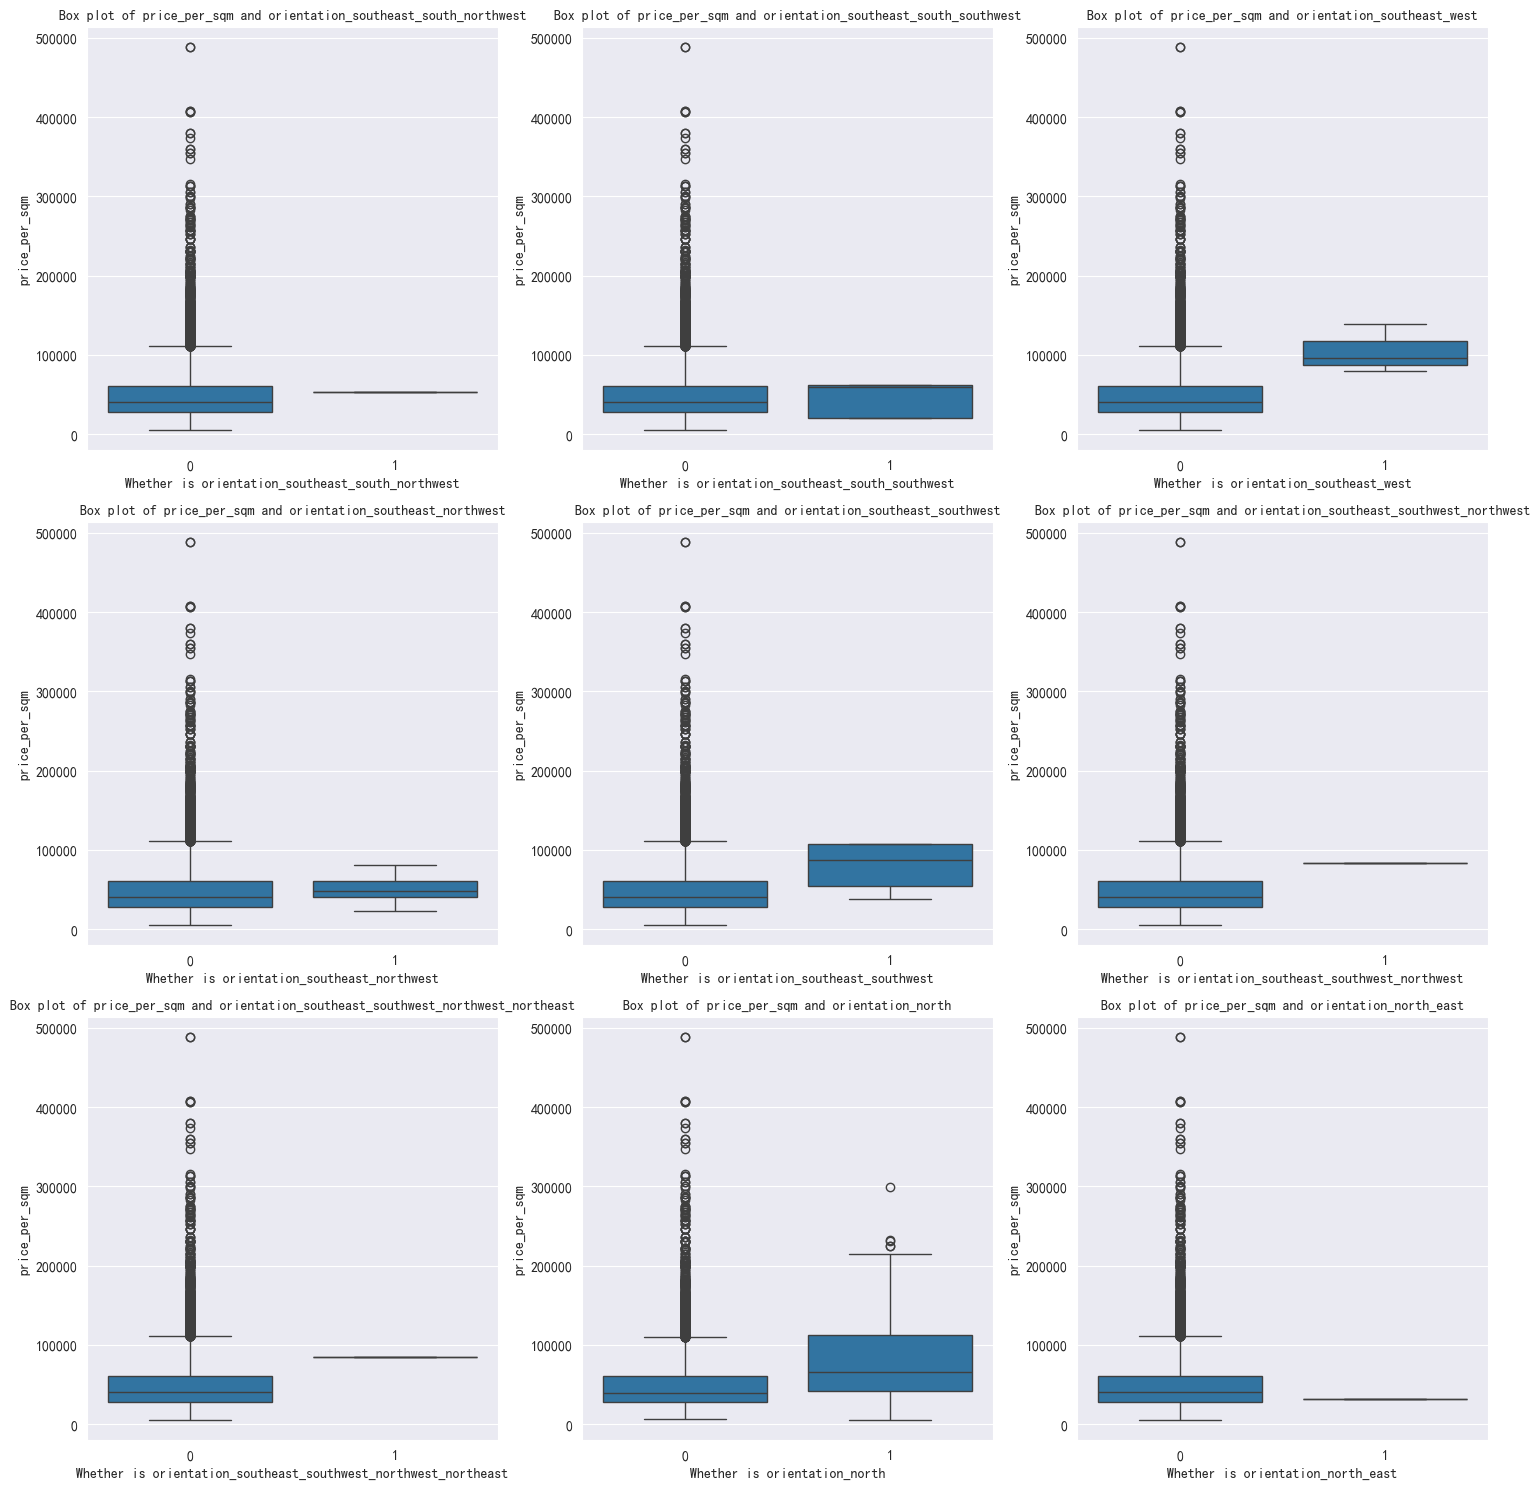

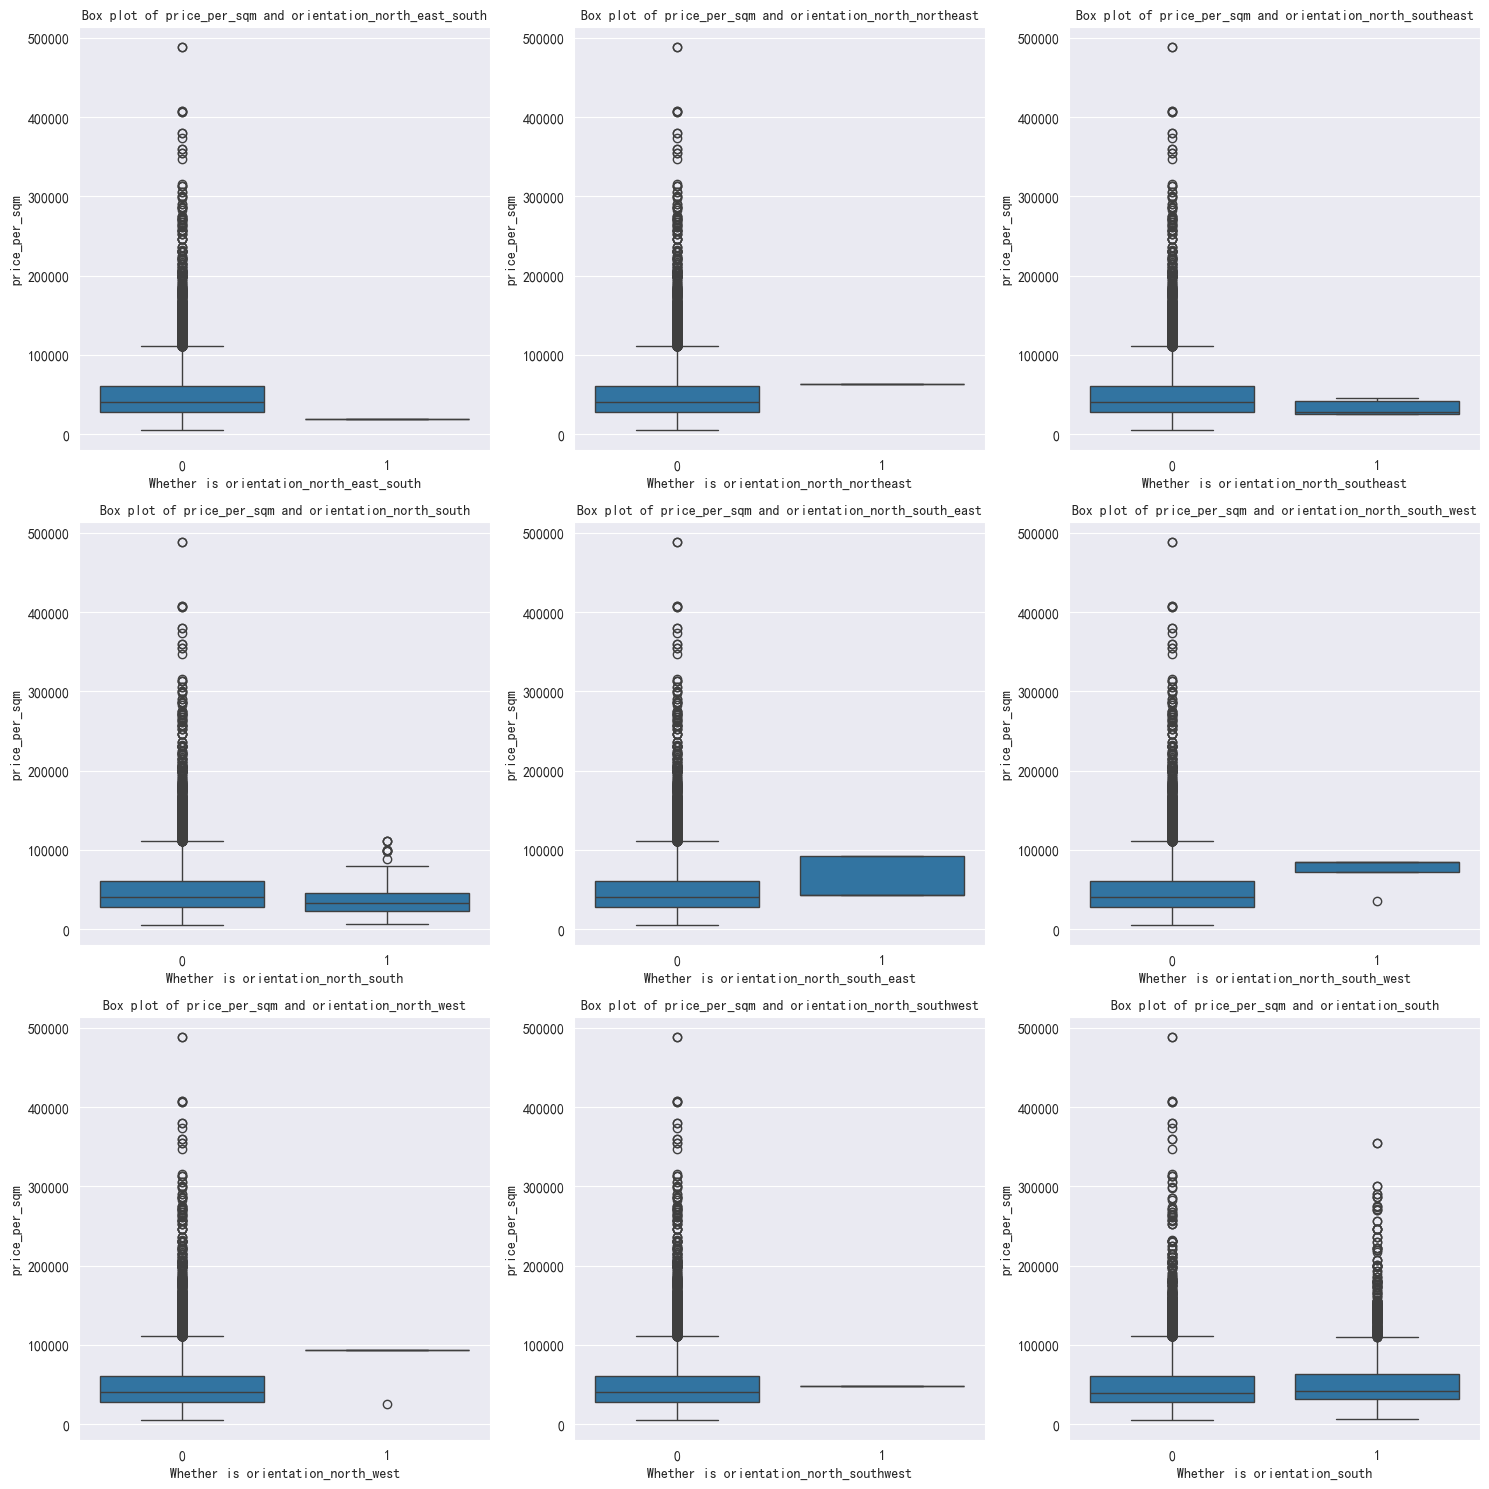

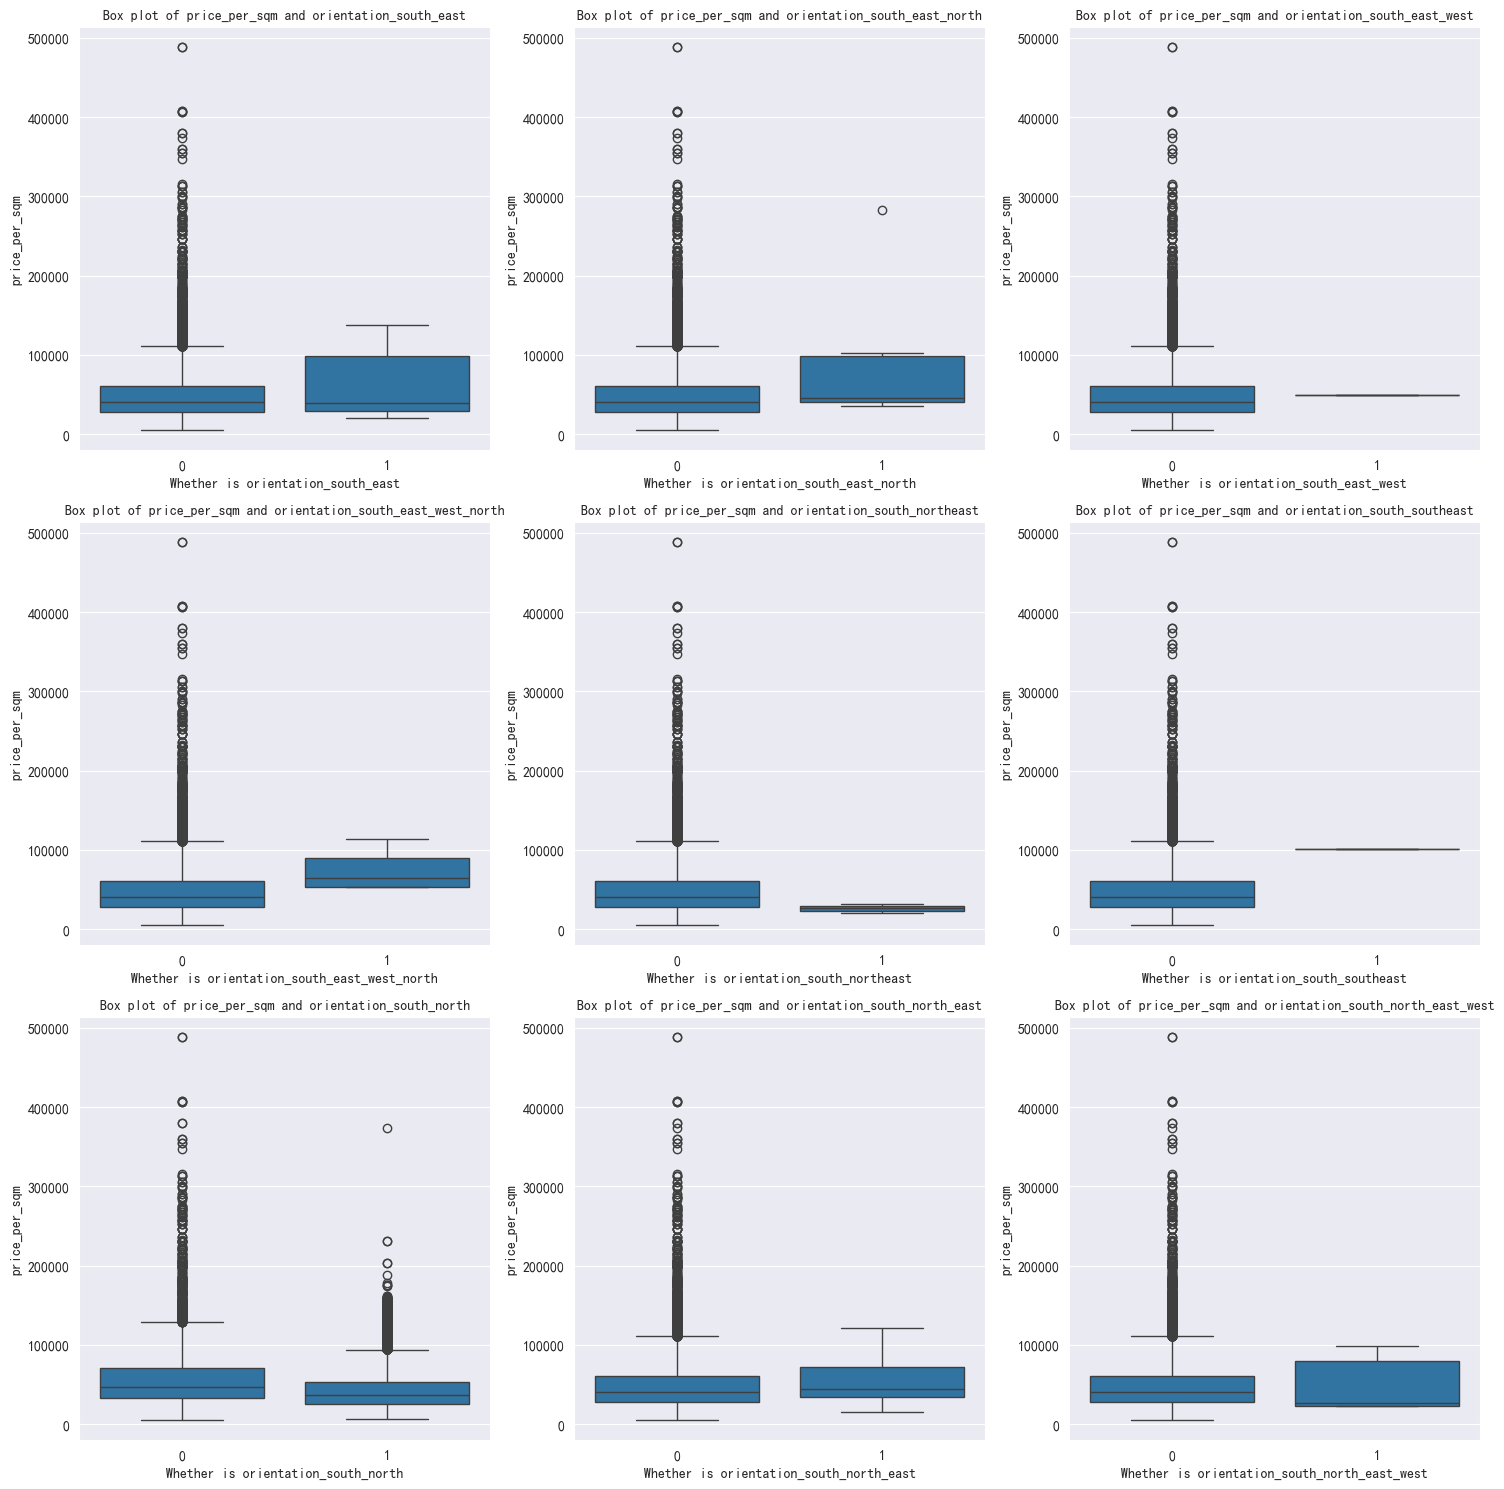

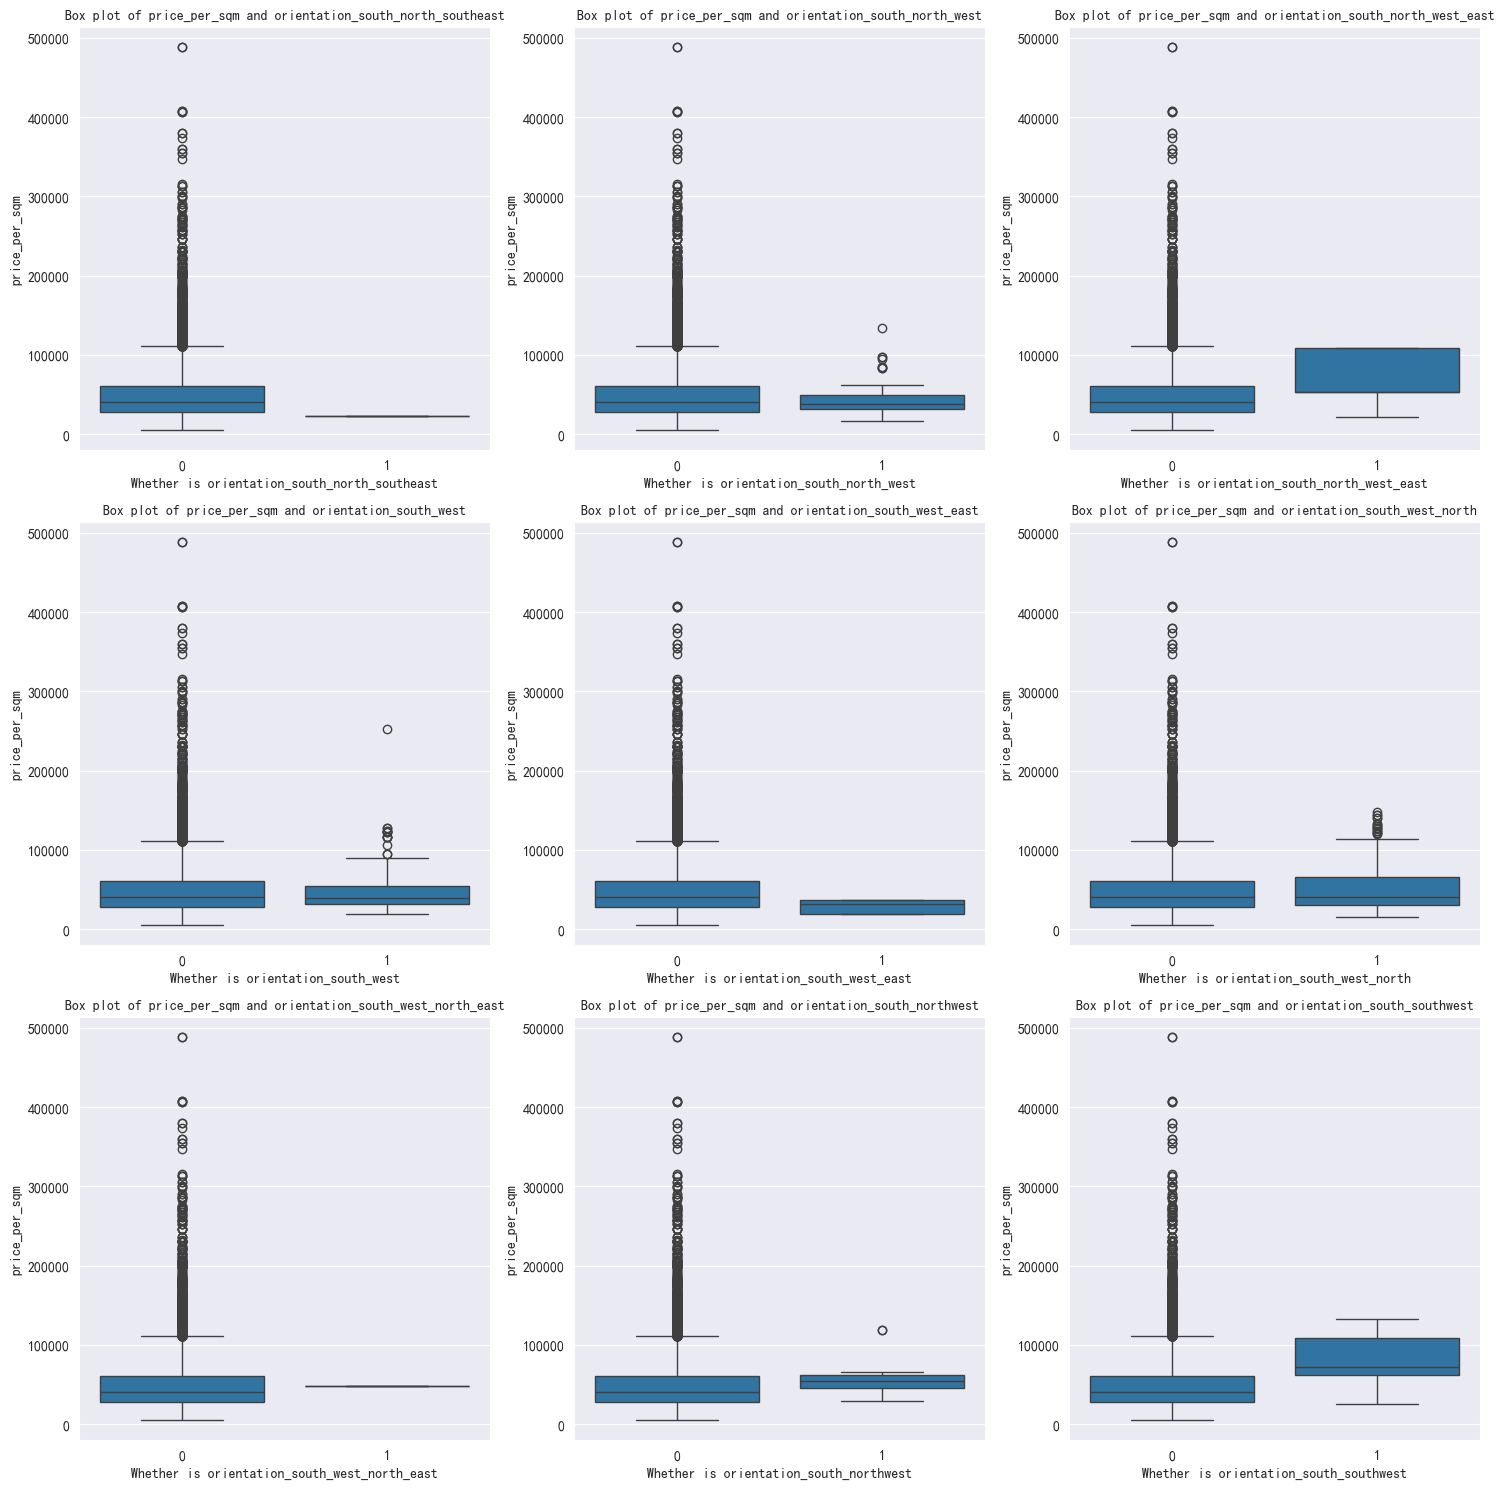

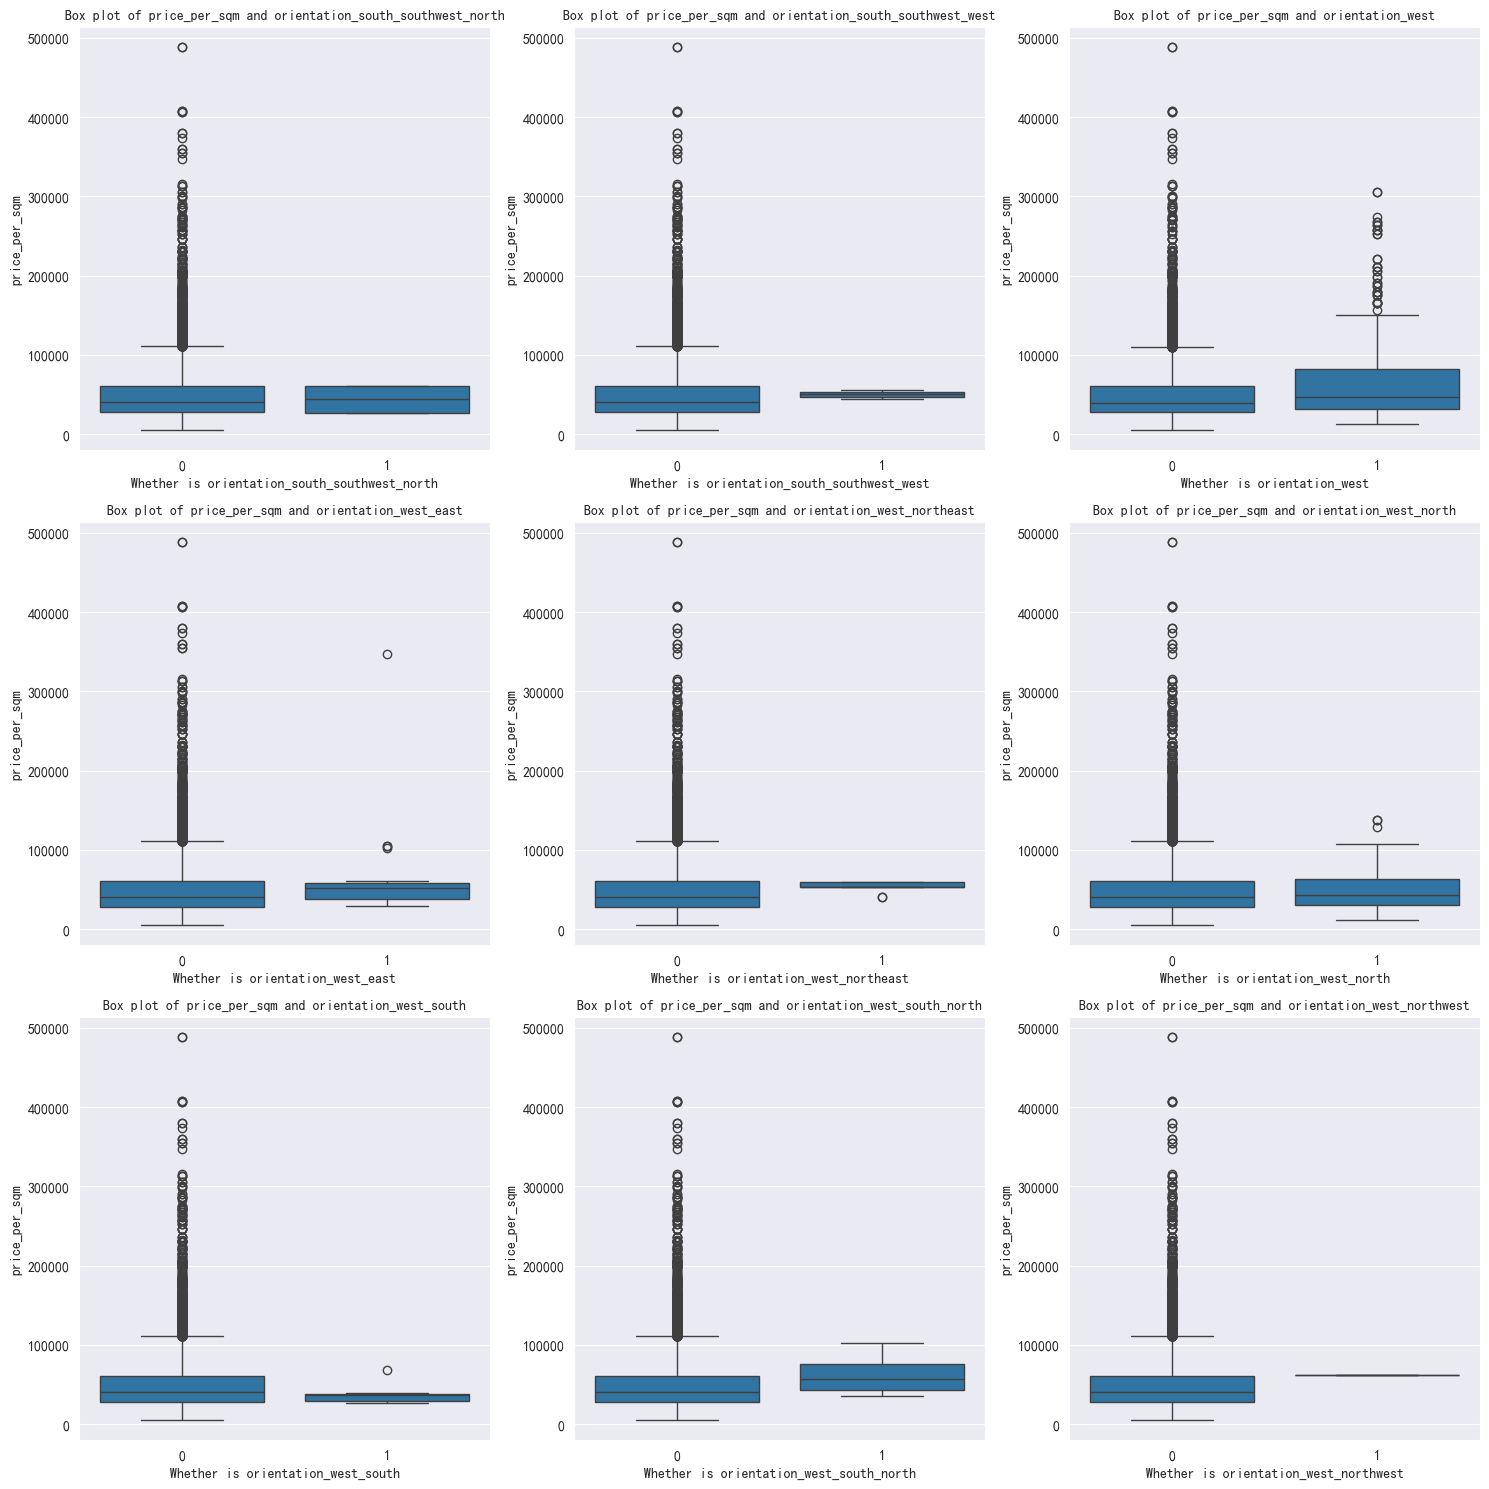

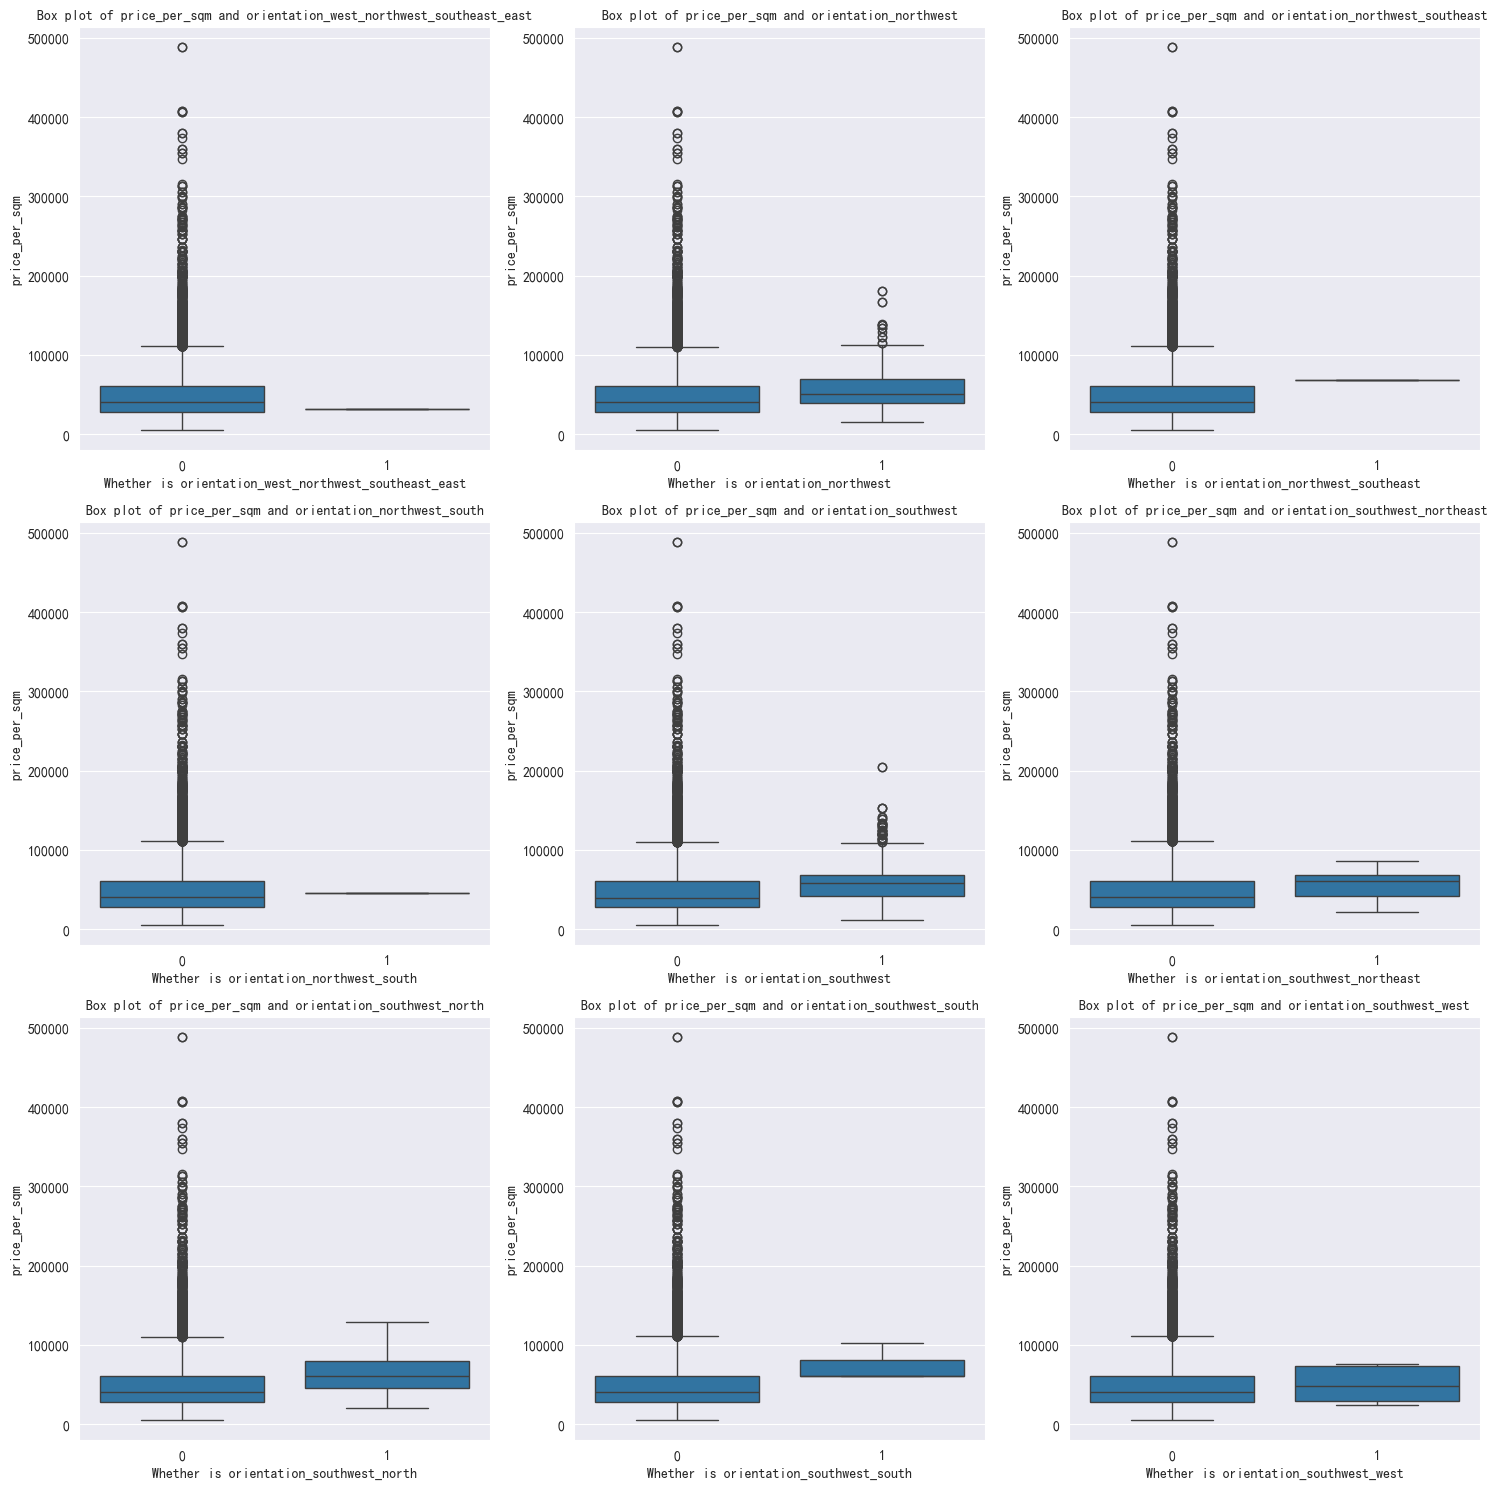

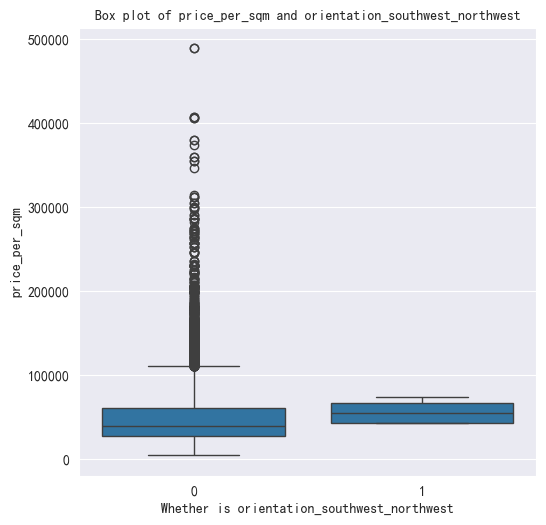

Statistics for Upper Limits:
Max: 217223.875
Min: 19214.0
Mean: 107633.34146341463
Median: 110746.0
带有"decoration"关键词的列数: 4
总共需要生成 1 张图


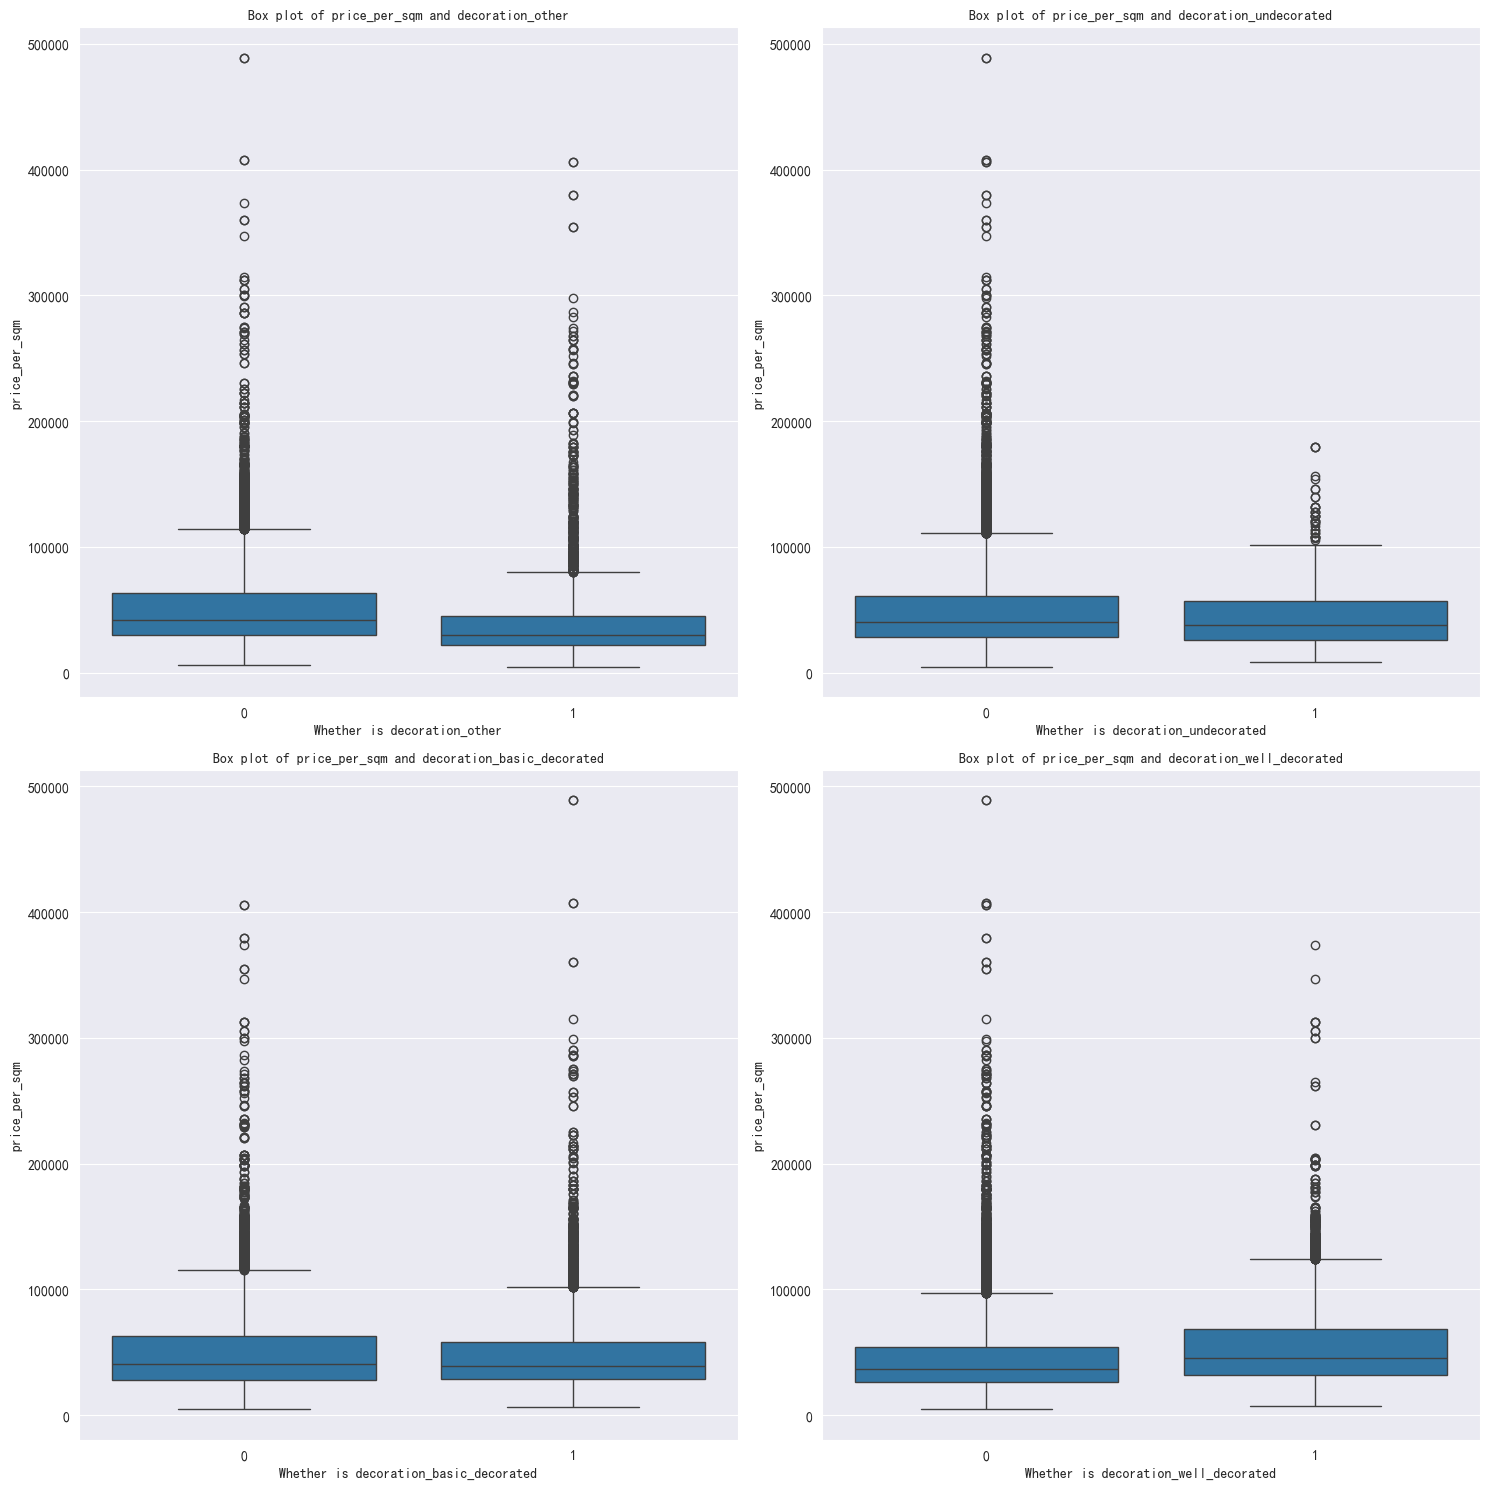

Statistics for Upper Limits:
Max: 217223.875
Min: 19214.0
Mean: 107551.46438953489
Median: 110746.0
带有"floor_level"关键词的列数: 5
总共需要生成 1 张图


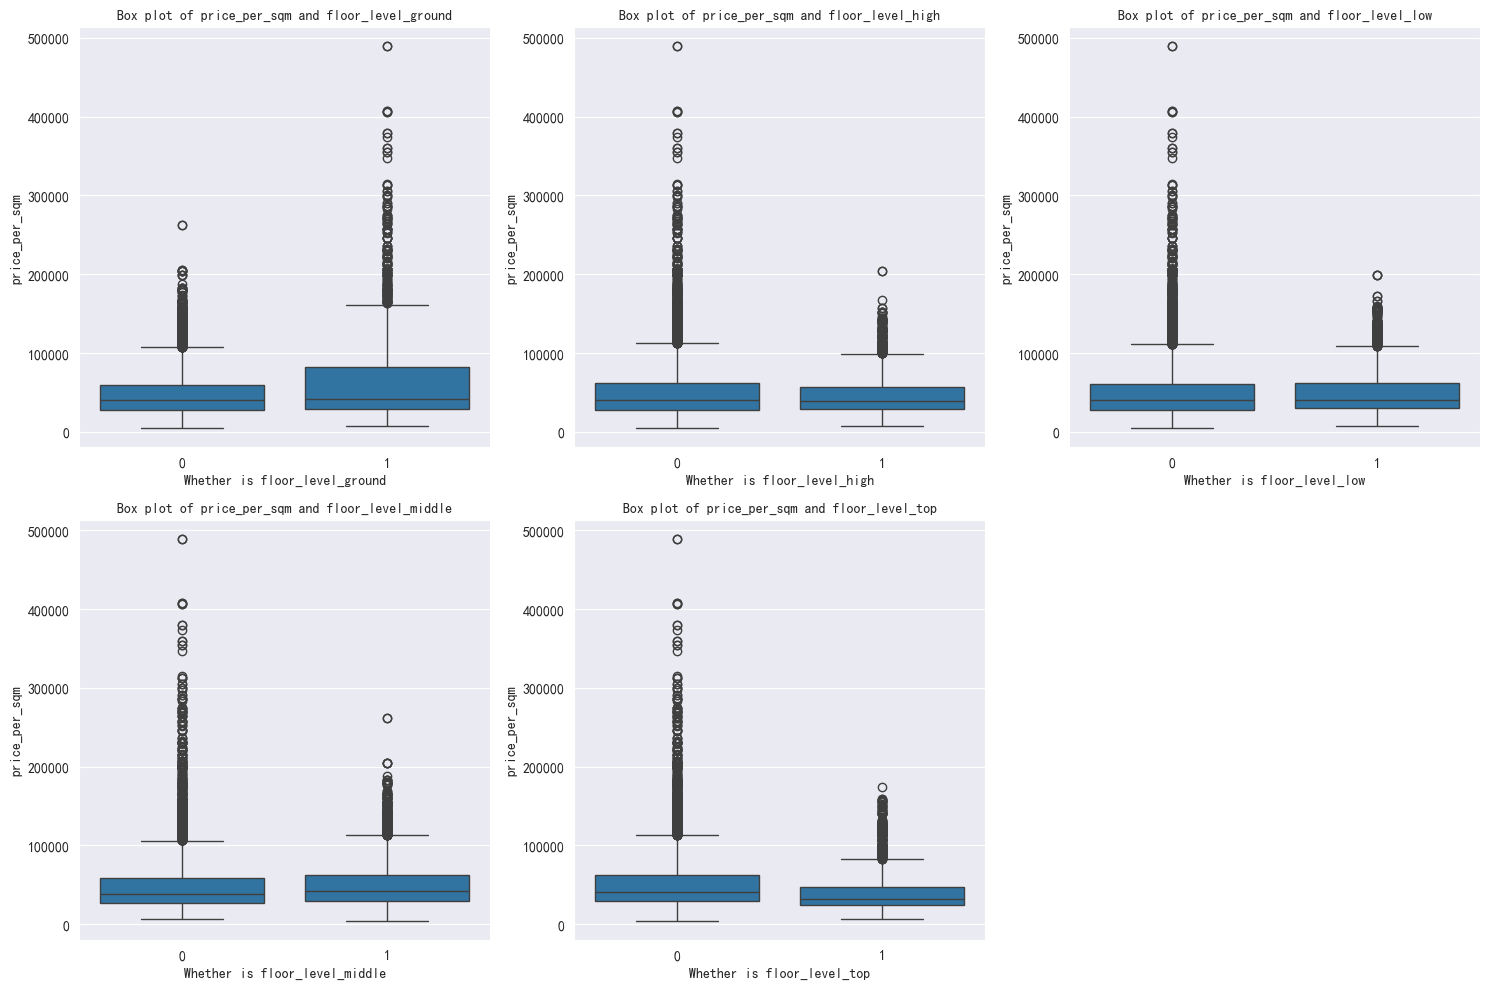

Statistics for Upper Limits:
Max: 217223.875
Min: 19214.0
Mean: 107780.66277472528
Median: 110746.0
带有"building_type"关键词的列数: 3
总共需要生成 1 张图


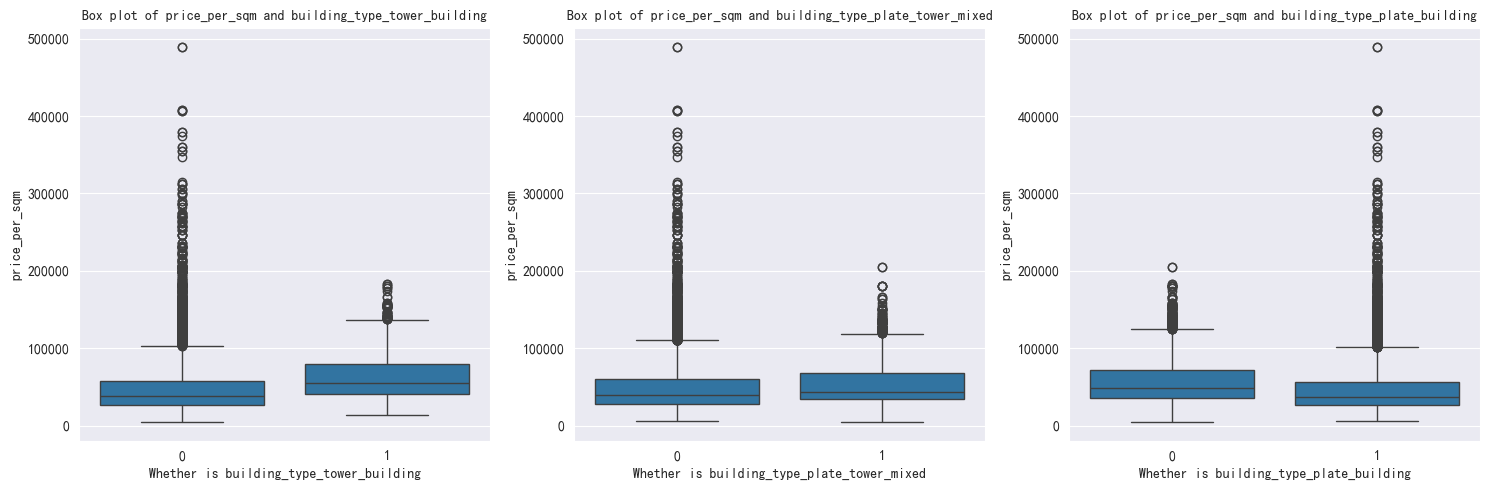

Statistics for Upper Limits:
Max: 217223.875
Min: 19214.0
Mean: 108044.72406914894
Median: 110746.0
带有"build_year"关键词的列数: 4
总共需要生成 1 张图


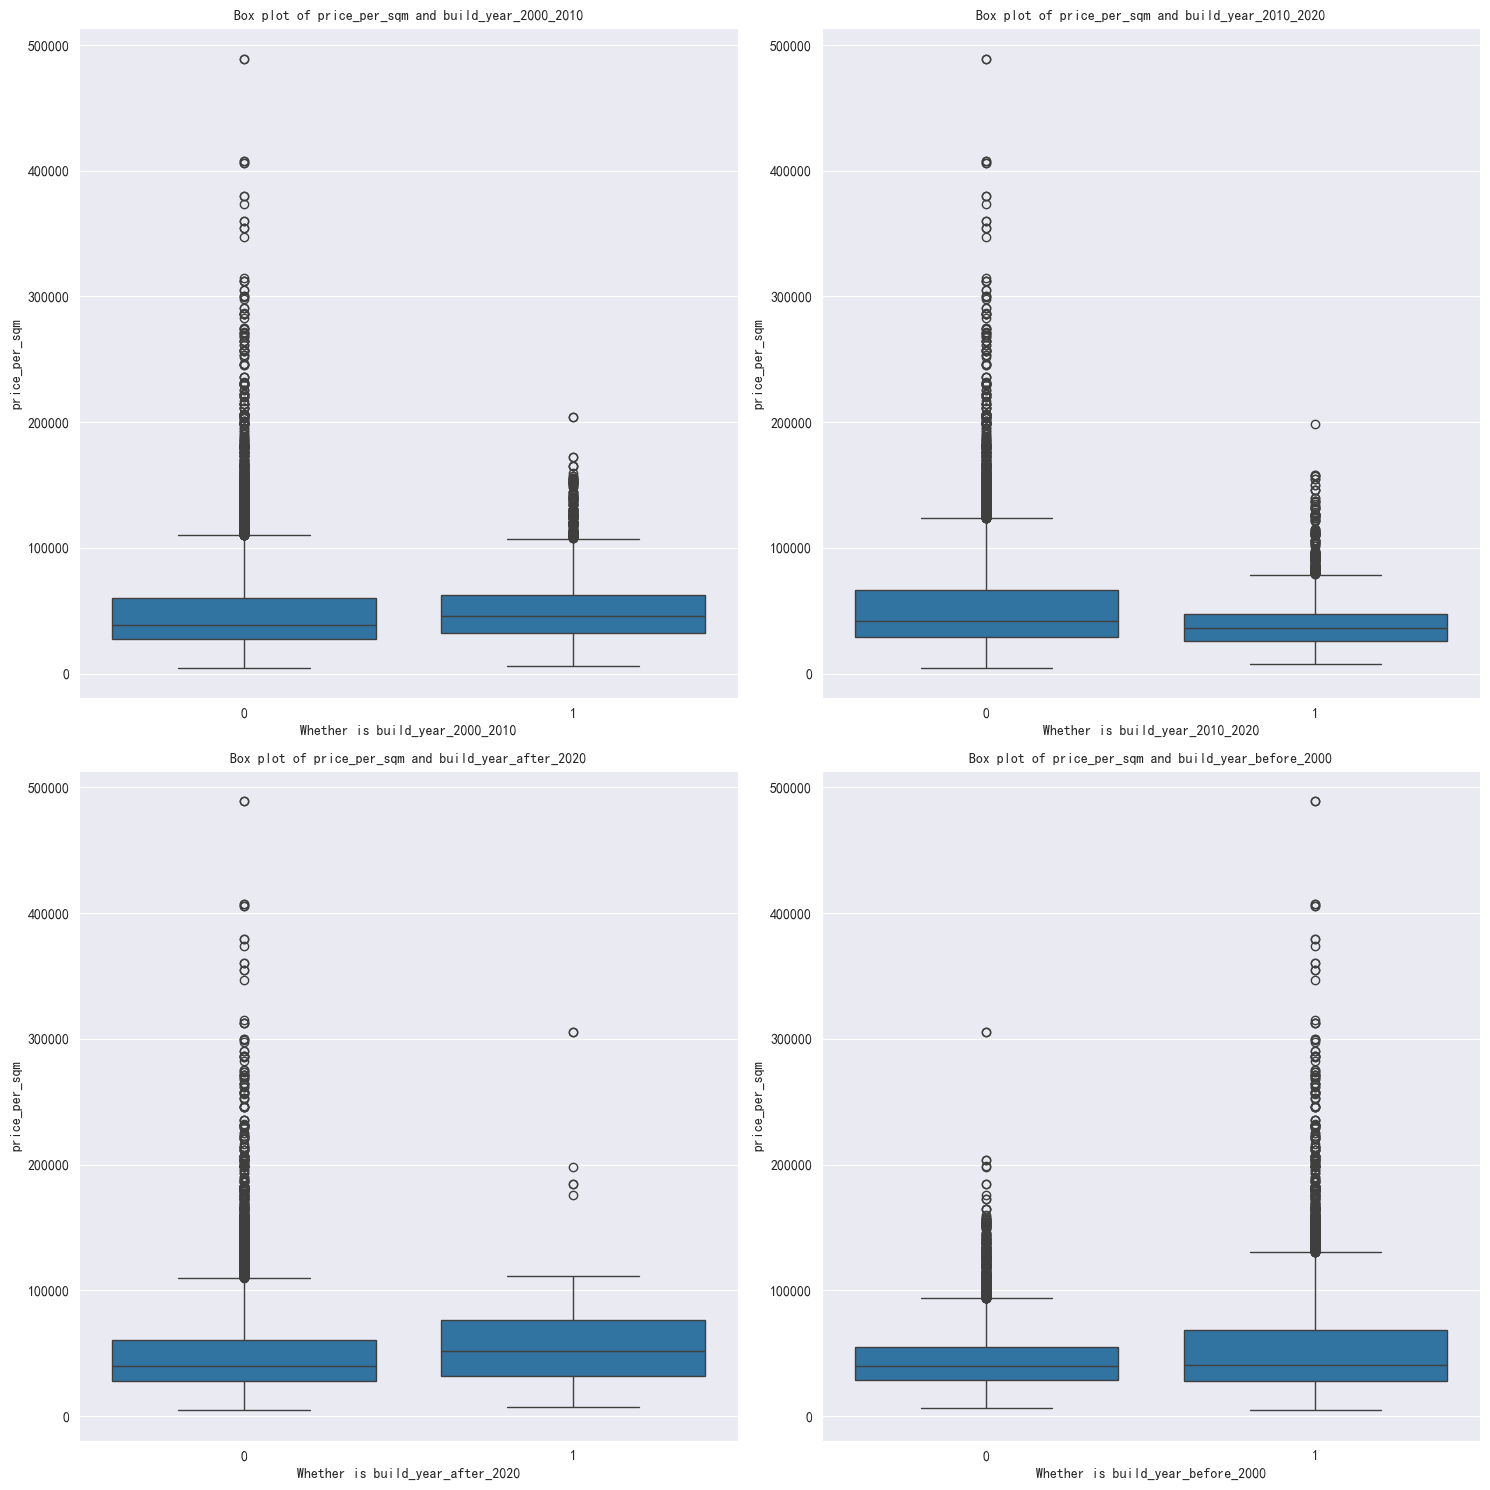

Statistics for Upper Limits:
Max: 217223.875
Min: 19214.0
Mean: 108220.25
Median: 110746.0
带有"district_"关键词的列数: 17
总共需要生成 2 张图


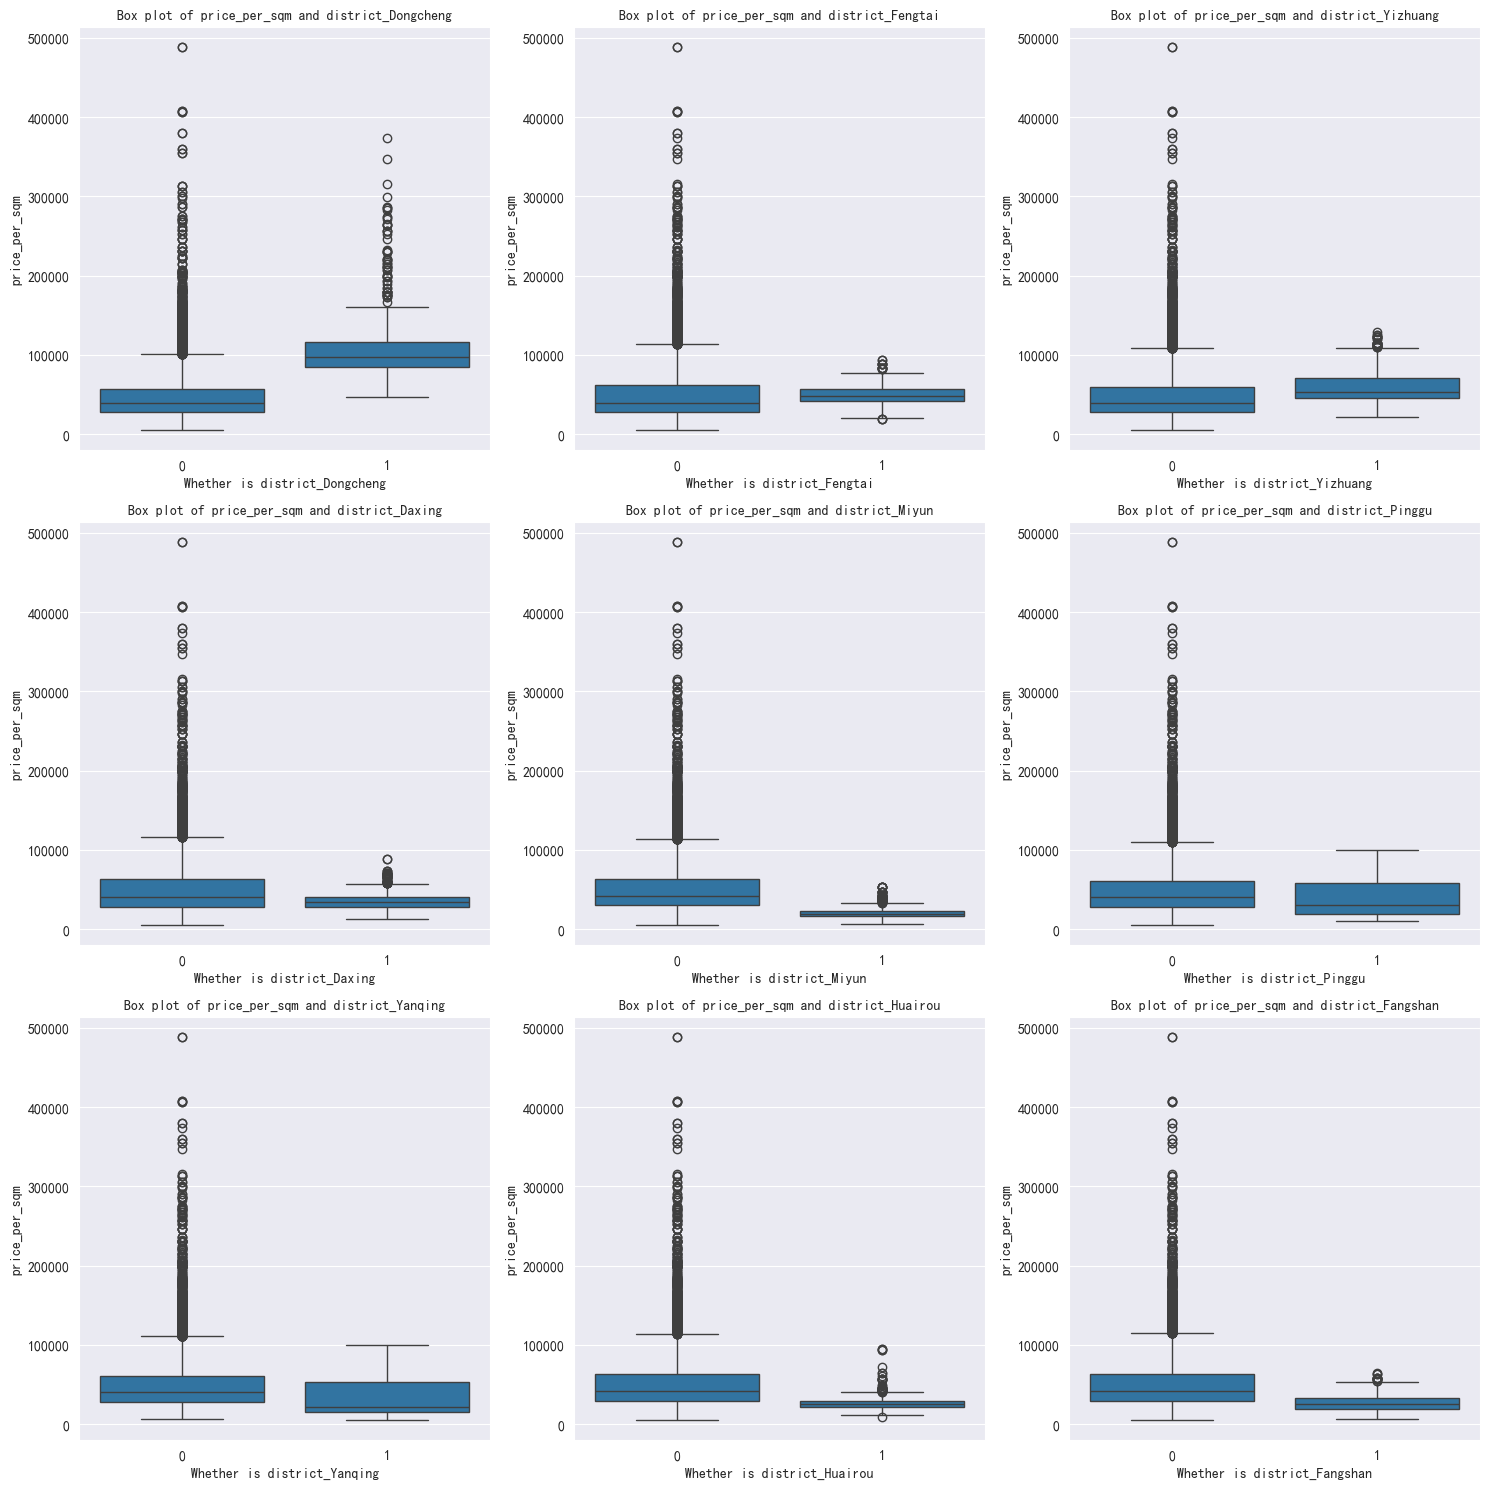

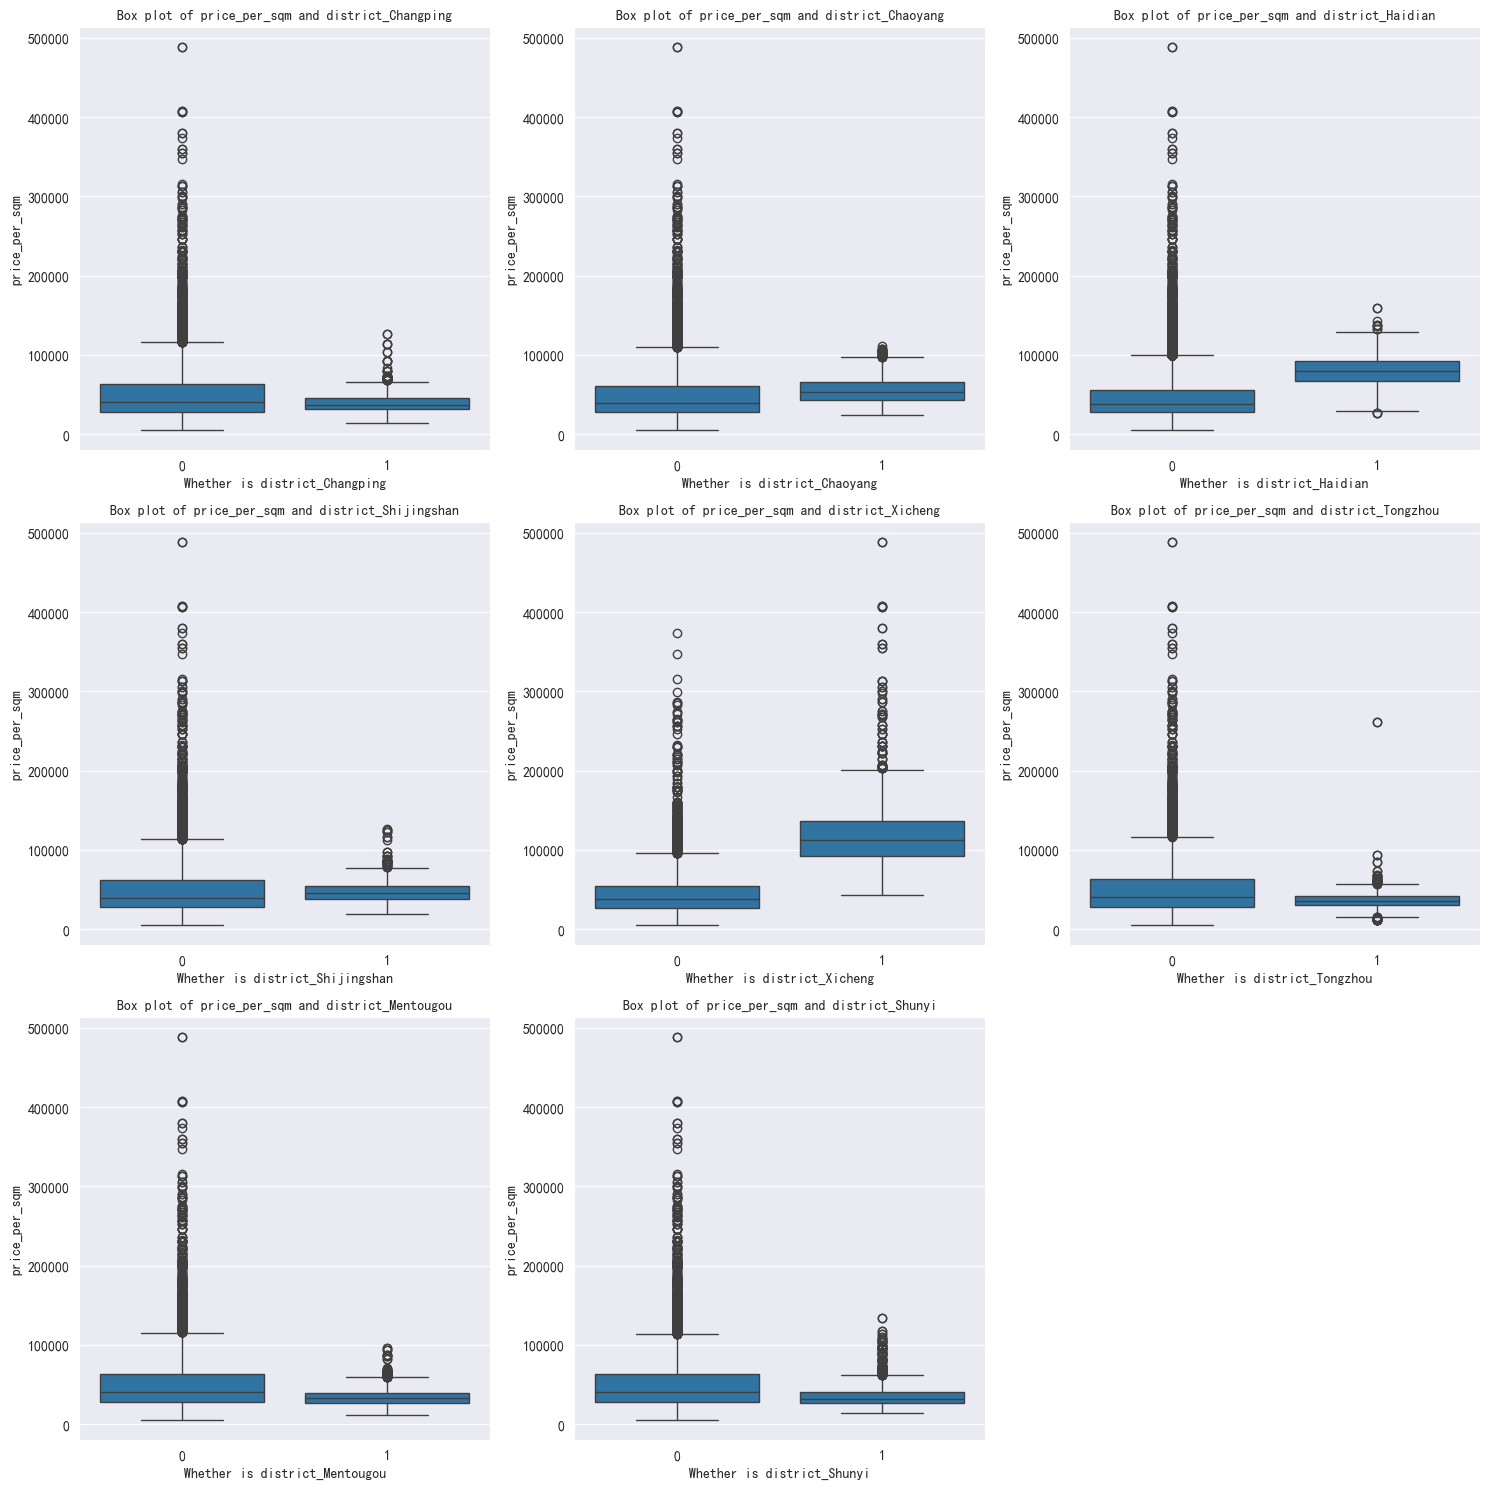

Statistics for Upper Limits:
Max: 217223.875
Min: 19214.0
Mean: 107020.97445652174
Median: 110746.0
带有"near_subway"关键词的列数: 1
总共需要生成 1 张图


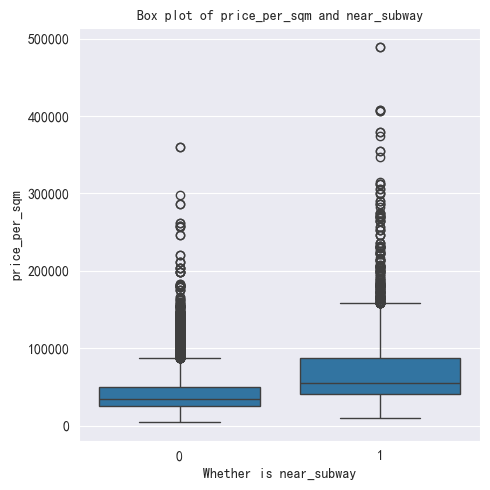

Statistics for Upper Limits:
Max: 217223.875
Min: 19214.0
Mean: 107154.73221982758
Median: 110746.0
带有"owned_over_5y"关键词的列数: 1
总共需要生成 1 张图


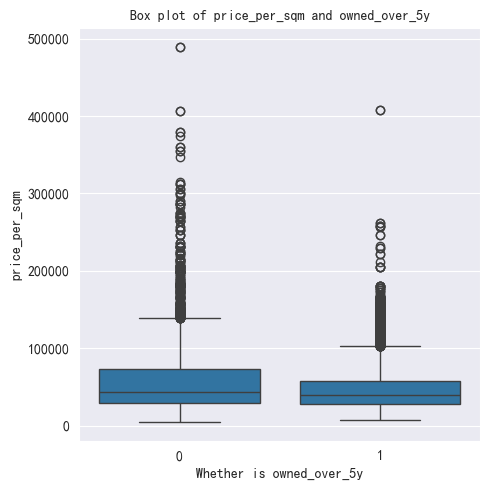

Statistics for Upper Limits:
Max: 217223.875
Min: 19214.0
Mean: 107269.19604700855
Median: 110746.0
带有"has_elevator"关键词的列数: 1
总共需要生成 1 张图


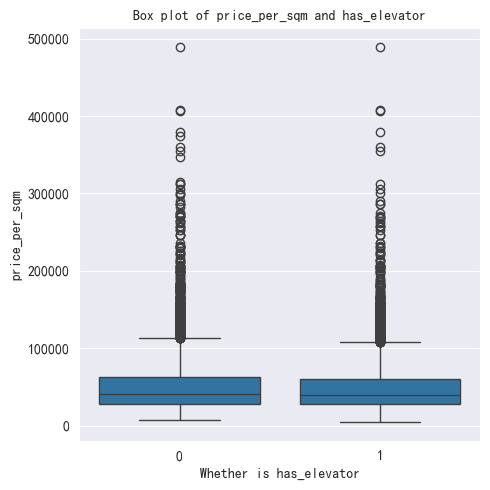

Statistics for Upper Limits:
Max: 217223.875
Min: 19214.0
Mean: 107298.21133474576
Median: 110746.0
带有"bedroom"关键词的列数: 15
总共需要生成 2 张图


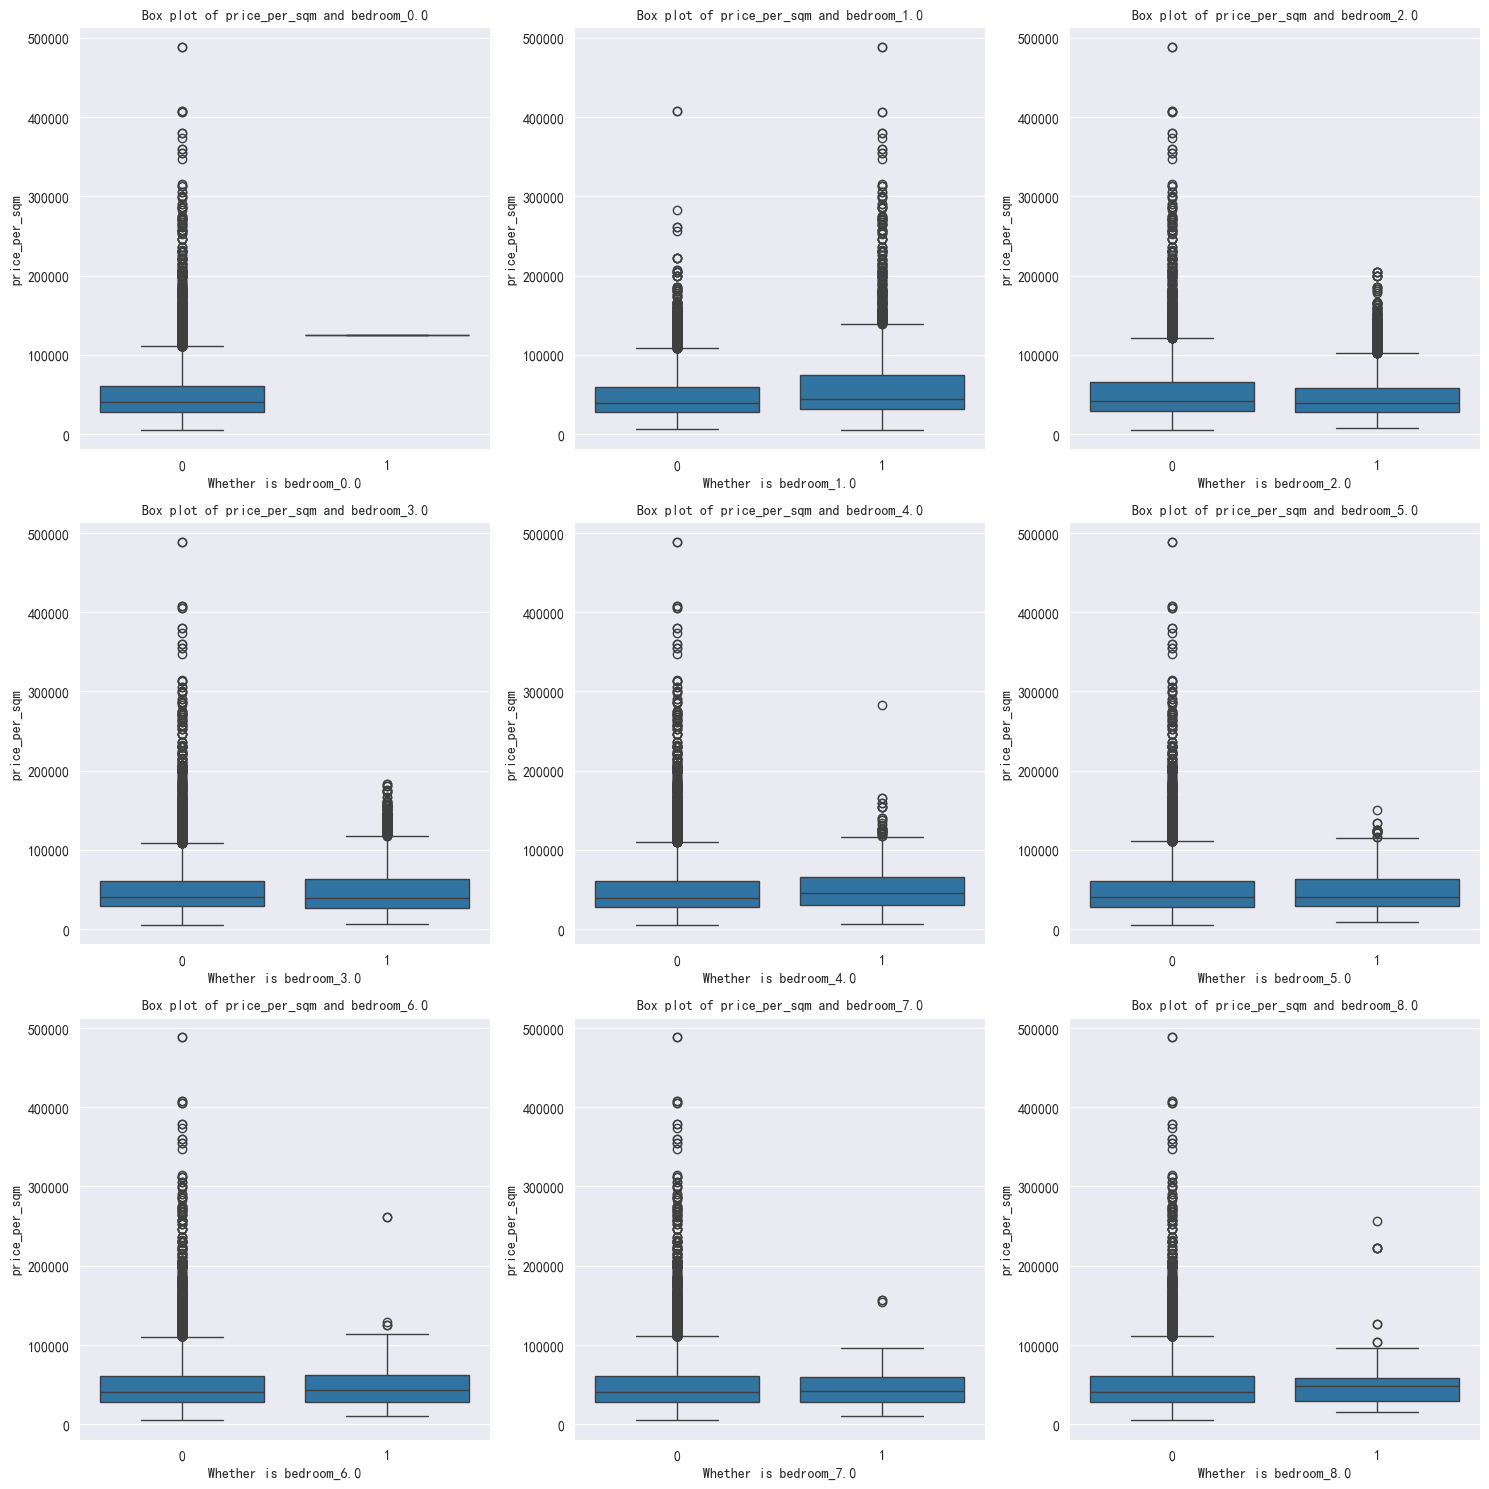

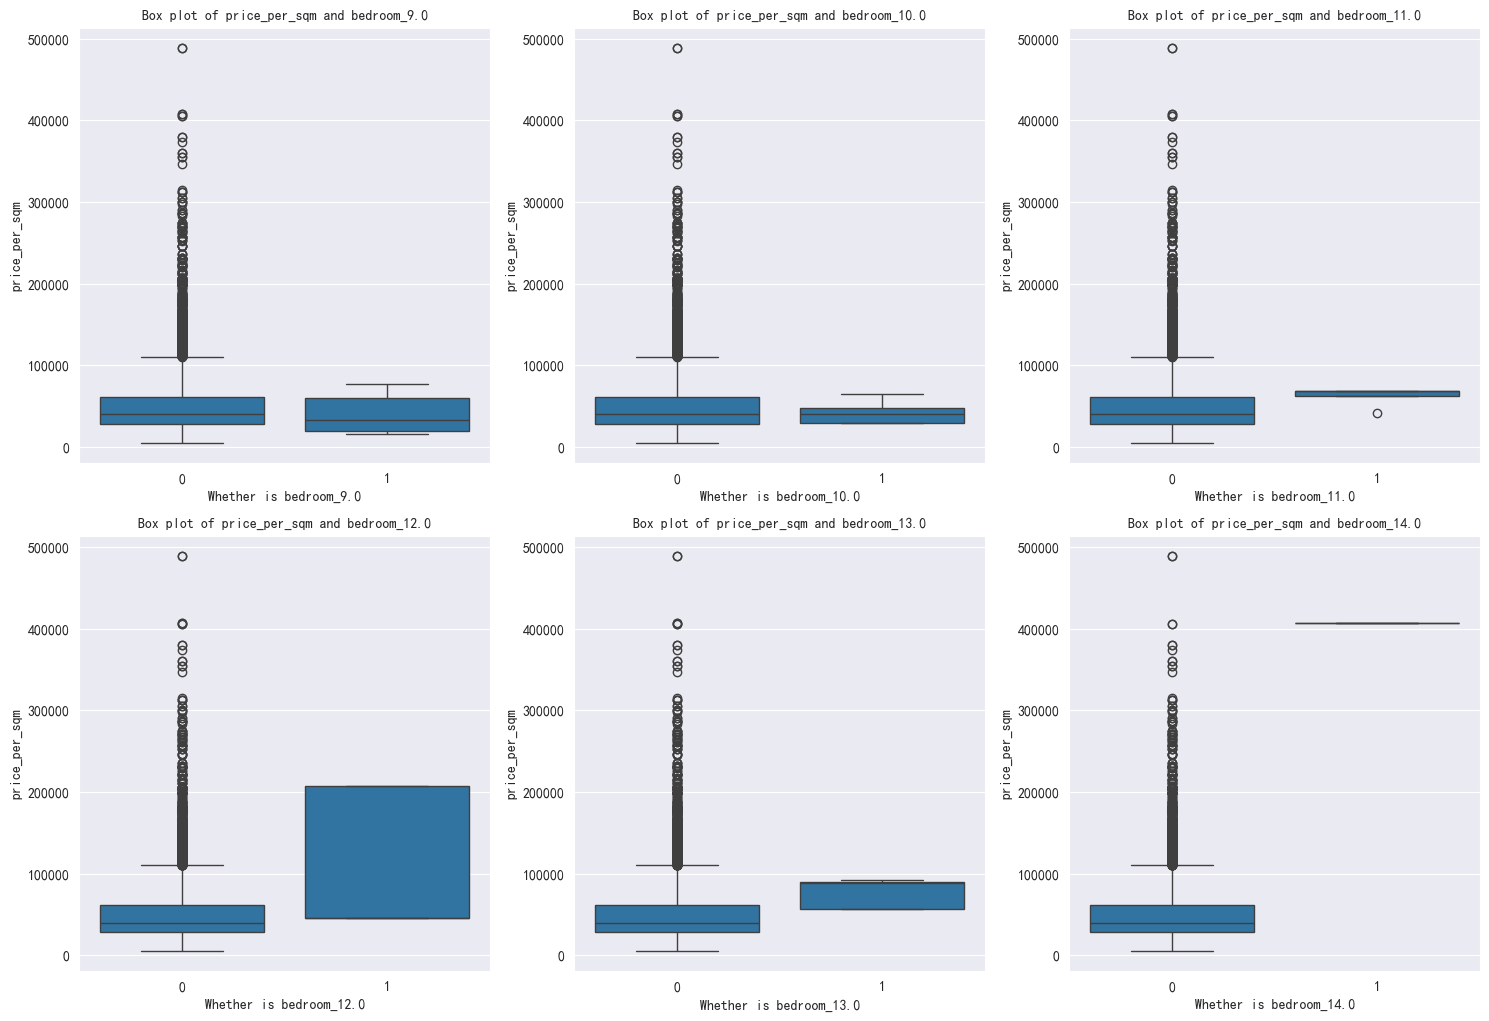

Statistics for Upper Limits:
Max: 447977.0
Min: 19214.0
Mean: 110147.38204887218
Median: 110746.0
带有"living_room"关键词的列数: 9
总共需要生成 1 张图


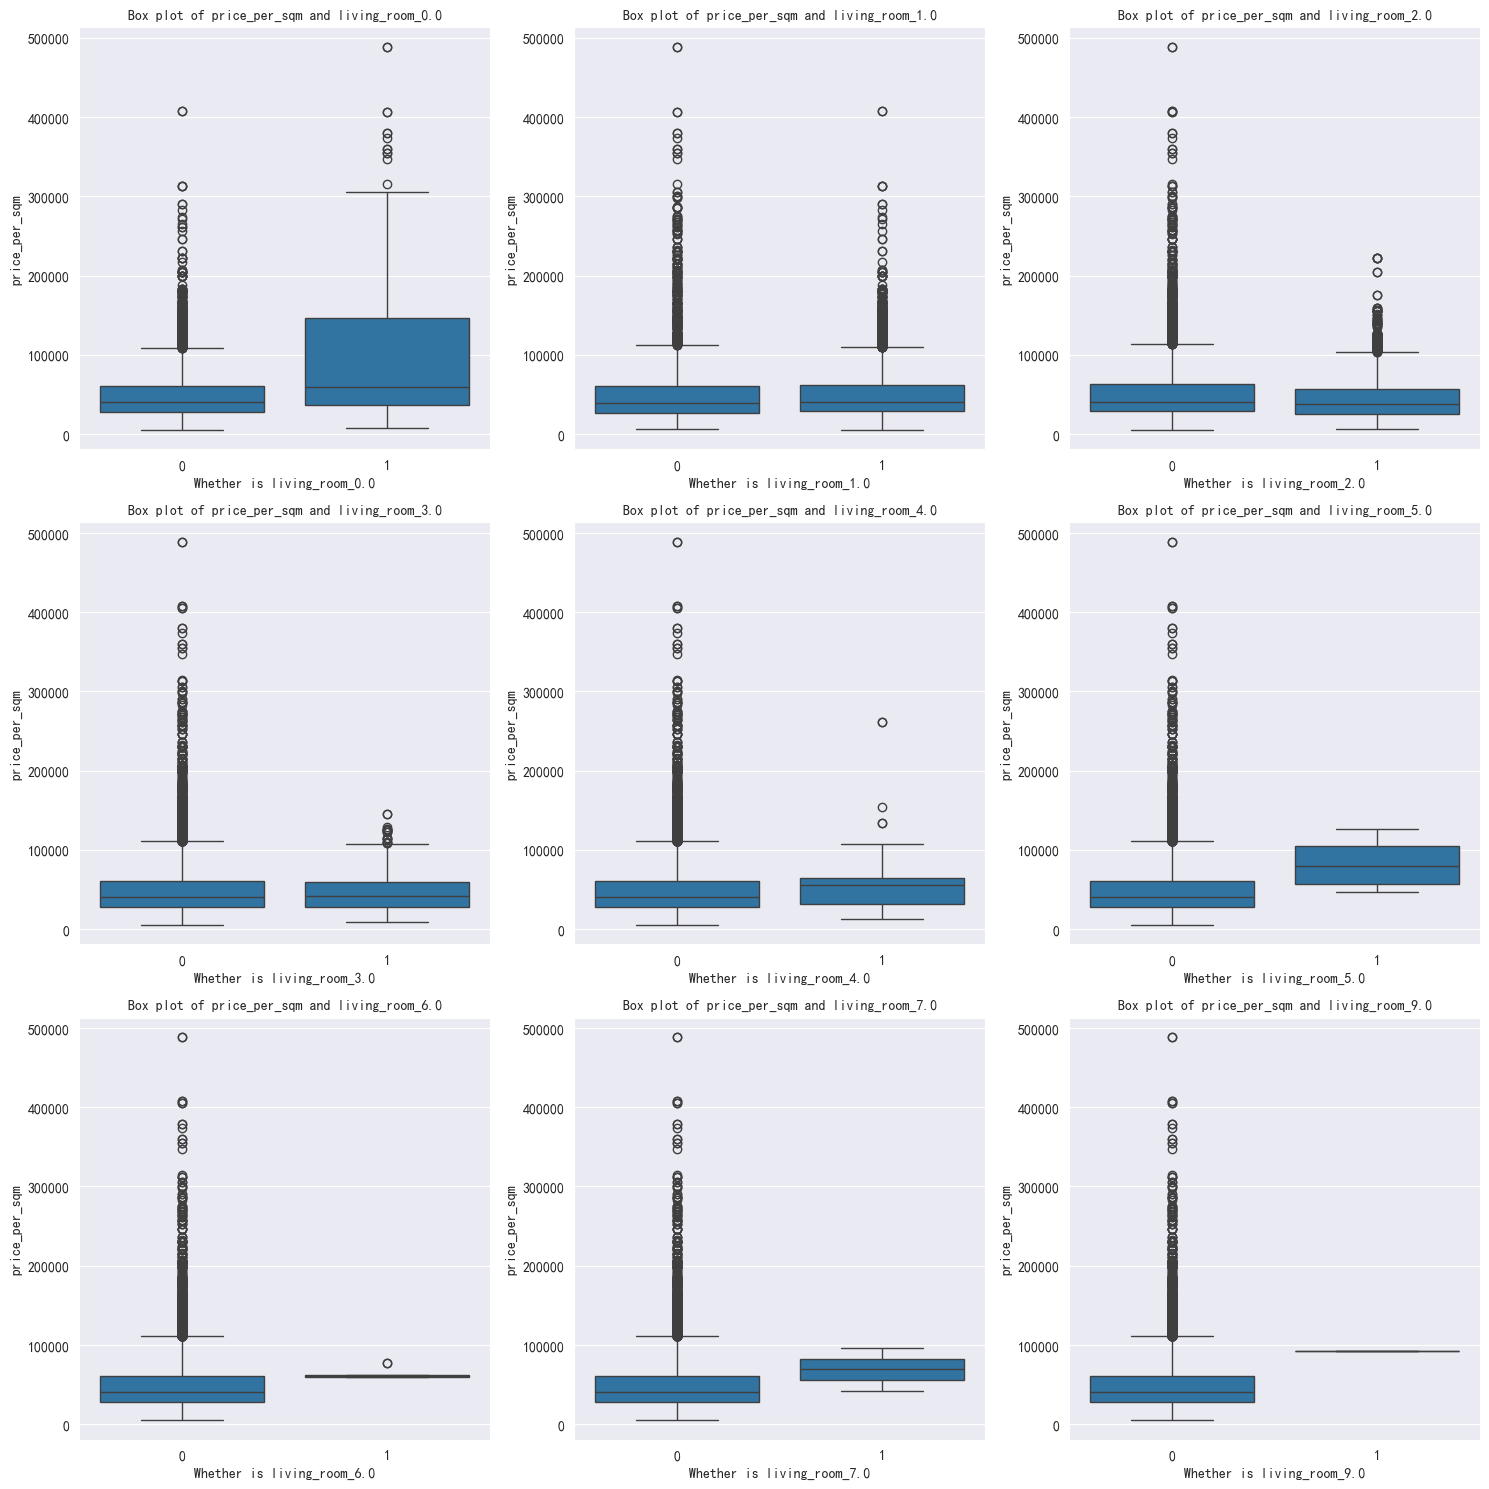

Statistics for Upper Limits:
Max: 447977.0
Min: 19214.0
Mean: 110935.24691901408
Median: 110746.0
         Keyword                            Column  Upper_Limit
0    orientation                  orientation_east    109743.00
1    orientation                  orientation_east    175052.75
2    orientation        orientation_east_southeast    110717.25
3    orientation        orientation_east_southeast    139982.75
4    orientation  orientation_east_southeast_north    110746.00
..           ...                               ...          ...
279  living_room                   living_room_6.0     64431.50
280  living_room                   living_room_7.0    110746.00
281  living_room                   living_room_7.0    123289.50
282  living_room                   living_room_9.0    110746.00
283  living_room                   living_room_9.0     91906.00

[284 rows x 3 columns]
Statistics for Upper Limits:
Max: 447977.0
Min: 19214.0
Mean: 110935.24691901408
Median: 110746.0


In [3]:
# 利用箱型图初步挑选与单价之间具有较高相关性的01变量，并且用所有箱型图的upper_limit的中位数去筛选异常的观测值
# 定义全局变量 iqr_vector
iqr_vector = pd.DataFrame(columns=['Keyword', 'Column', 'Upper_Limit'])


def generate_boxplots_to_process_outliers(data, keyword, target_column='price_per_sqm', n_cols=3, n_rows=3, figsize=(15, 15)):
    """
    根据关键词生成箱型图并计算+1.5IQR的upper limit，更新全局变量iqr_vector。

    参数:
    data (pd.DataFrame): 输入的数据集
    keyword (str): 用于筛选列的关键词
    target_column (str): 目标列，默认为'单价'
    n_cols (int): 每张图中的列数，默认为3
    n_rows (int): 每张图中的行数，默认为3
    figsize (tuple): 图形的大小，默认为(15, 15)

    返回:
    None: 函数会更新全局变量iqr_vector
    """
    global iqr_vector

    # 设置全局字体为 SimHei，支持中文
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

    # 筛选出包含关键词的列
    keyword_columns = [col for col in data.columns if keyword in col]
    keyword_columns_len = len(keyword_columns)
    print(f'带有"{keyword}"关键词的列数: {keyword_columns_len}')

    # 每张图的子图数量
    subplots_per_fig = n_rows * n_cols

    # 计算需要多少张图
    total_figs = math.ceil(keyword_columns_len / subplots_per_fig)
    print(f'总共需要生成 {total_figs} 张图')

    # 分别生成每张图
    for fig_idx in range(total_figs):
        start_idx = fig_idx * subplots_per_fig
        end_idx = min(start_idx + subplots_per_fig, keyword_columns_len)

        # 创建一个新的图形
        if n_cols == 1 and n_rows == 1:
            fig, ax = plt.subplots(figsize=figsize)
            axes = [ax]  # 将单个 Axes 对象放入列表中
        else:
            fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=figsize)
            axes = axes.flatten()

        # 绘制箱型图并计算+1.5IQR
        new_iqr_entries = []
        for ax, col in zip(axes, keyword_columns[start_idx:end_idx]):
            sns.boxplot(x=data[col], y=data[target_column], ax=ax)
            ax.set_title('Box plot of price_per_sqm and ' + col, fontdict={'fontsize': 10})
            ax.set_xlabel('Whether is ' + col)
            ax.set_ylabel(target_column)

            # 计算+1.5IQR
            q1 = data.groupby(col)[target_column].quantile(0.25)
            q3 = data.groupby(col)[target_column].quantile(0.75)
            iqr = q3 - q1
            upper_limit = q3 + 1.5 * iqr

            # 收集新的IQR条目
            for category, ul in upper_limit.items():
                new_iqr_entries.append({
                    'Keyword': keyword,
                    'Column': col,
                    'Upper_Limit': ul
                })

        # 更新全局iqr_vector
        if new_iqr_entries:
            new_df = pd.DataFrame(new_iqr_entries)
            iqr_vector = pd.concat([iqr_vector, new_df], ignore_index=True)

        # 关闭多余的子图
        if n_cols == 1 and n_rows == 1:
            pass  # 不需要关闭多余子图
        else:
            for i in range(end_idx - start_idx, len(axes)):
                fig.delaxes(axes[i])

        plt.tight_layout()
        plt.show()

    # 打印统计信息
    print("Statistics for Upper Limits:")
    print("Max:", iqr_vector['Upper_Limit'].max())
    print("Min:", iqr_vector['Upper_Limit'].min())
    print("Mean:", iqr_vector['Upper_Limit'].mean())
    print("Median:", iqr_vector['Upper_Limit'].median())


data_houses = pd.read_csv(
    "D:/University of Macau/Introduction to dada science programming/final project/processed_lianjia_data(2).csv")
generate_boxplots_to_process_outliers(data_houses, 'orientation')
generate_boxplots_to_process_outliers(data_houses, 'decoration', n_cols=2, n_rows=2)
generate_boxplots_to_process_outliers(data_houses, 'floor_level', n_cols=3, n_rows=2, figsize=(15, 10))
generate_boxplots_to_process_outliers(data_houses, 'building_type', n_cols=3, n_rows=1, figsize=(15, 5))
generate_boxplots_to_process_outliers(data_houses, 'build_year', n_cols=2, n_rows=2)
generate_boxplots_to_process_outliers(data_houses, 'district_')
generate_boxplots_to_process_outliers(data_houses, 'near_subway', n_cols=1, n_rows=1, figsize=(5, 5))
generate_boxplots_to_process_outliers(data_houses, 'owned_over_5y', n_cols=1, n_rows=1, figsize=(5, 5))
generate_boxplots_to_process_outliers(data_houses, 'has_elevator', n_cols=1, n_rows=1, figsize=(5, 5))
generate_boxplots_to_process_outliers(data_houses, 'bedroom')
generate_boxplots_to_process_outliers(data_houses, 'living_room')

# 最后可以查看全局iqr_vector的内容
print(iqr_vector)
# 打印统计信息
print("Statistics for Upper Limits:")
print("Max:", iqr_vector['Upper_Limit'].max())
print("Min:", iqr_vector['Upper_Limit'].min())
print("Mean:", iqr_vector['Upper_Limit'].mean())
print("Median:", iqr_vector['Upper_Limit'].median())

In [4]:
# 保存筛选异常观测值的的数据，记为processed_lianjia_data_filtered.csv

def remove_high_price_rows(data, threshold):
    # 使用布尔索引筛选出 price_per_sqm 小于等于阈值的行
    data_houses_proceed = data[data['price_per_sqm'] <= threshold]

    # 打印删除了多少行
    removed_count = len(data) - len(data_houses_proceed)
    print(f"已删除 {removed_count} 行，其中 'price_per_sqm' 大于 {threshold}")

    return data_houses_proceed


threshold = iqr_vector['Upper_Limit'].median()
data_houses_processed = remove_high_price_rows(data_houses, threshold)
print(data_houses_processed.head(5))

# # 指定保存的文件路径
# output_file_path = "D:/University of Macau/Introduction to dada science programming/final project/processed_lianjia_data_filtered.csv"
# 
# # 使用 to_csv 方法保存 DataFrame
# data_houses_processed.to_csv(output_file_path, index=False)
# 
# print(f"数据已成功保存到 {output_file_path}")

已删除 1202 行，其中 'price_per_sqm' 大于 110746.0
   Bedroom_count  Living_room_count   area  total_floors  total_price  \
0            1.0                0.0  38.28            14        370.0   
1            2.0                1.0  62.66             6        510.0   
2            2.0                1.0  55.47             6        530.0   
3            2.0                1.0  90.61             7        498.0   
4            2.0                1.0  52.70             6        421.0   

   price_per_sqm  bedroom_0.0  bedroom_1.0  bedroom_2.0  bedroom_3.0  ...  \
0        96657.0            0            1            0            0  ...   
1        81392.0            0            0            1            0  ...   
2        95548.0            0            0            1            0  ...   
3        54961.0            0            0            1            0  ...   
4        79887.0            0            0            1            0  ...   

   district_Mentougou  district_Shunyi  price_level_low_

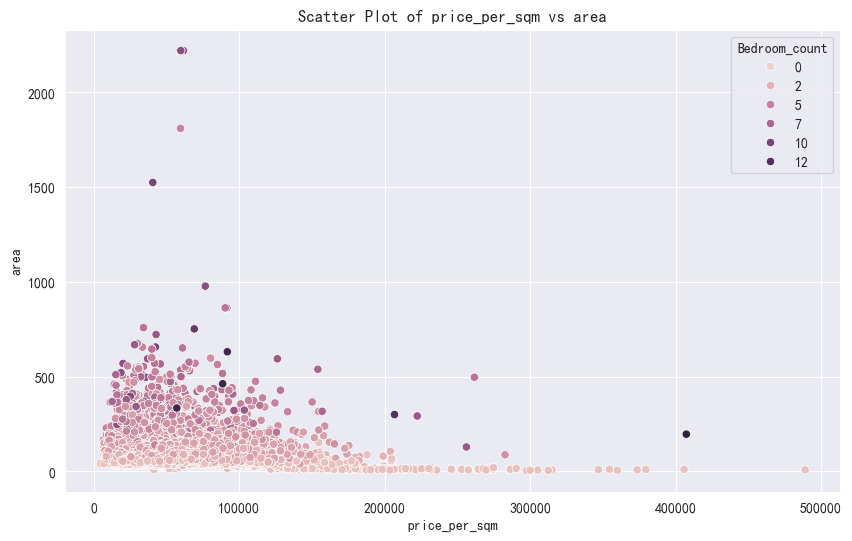

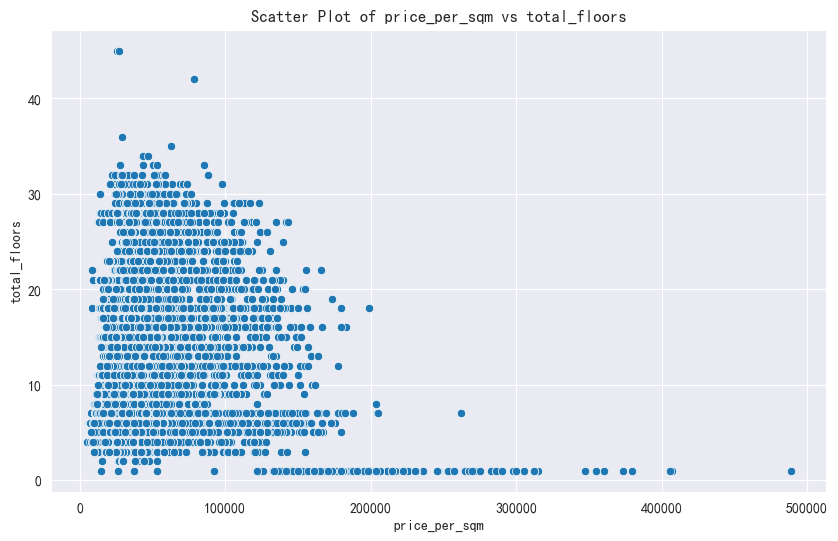

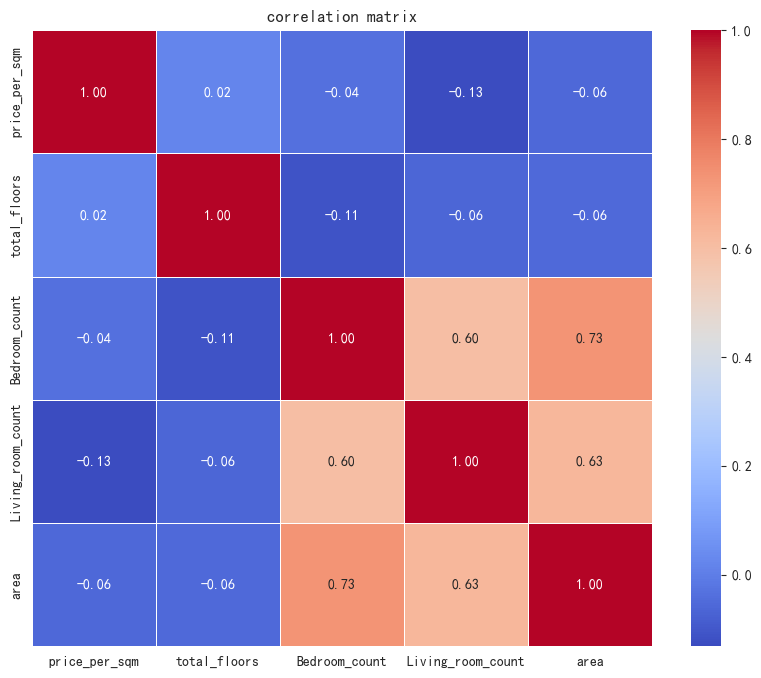

In [5]:
# 绘制数值列的散点图和相关性热图
## scatter plot
# 确保卧室数量列的数据类型是整数
data_houses['Bedroom_count'] = data_houses['Bedroom_count'].astype(int)

# 明确指定卧室数量的类别
unique_bedroom_counts = data_houses['Bedroom_count'].unique()
unique_bedroom_counts.sort()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_houses, x='price_per_sqm', y='area', hue='Bedroom_count')

plt.title('Scatter Plot of price_per_sqm vs area')
plt.xlabel('price_per_sqm')
plt.ylabel('area')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_houses, x='price_per_sqm', y='total_floors')

plt.title('Scatter Plot of price_per_sqm vs total_floors')
plt.xlabel('price_per_sqm')
plt.ylabel('total_floors')
plt.show()

# ## 相关性矩阵图
# 选择需要的列
columns_of_interest = ['price_per_sqm', 'total_floors', 'Bedroom_count', 'Living_room_count', 'area']
data_subset = data_houses[columns_of_interest]

# 计算相关系数矩阵
correlation_matrix = data_subset.corr()
# 绘制相关性矩阵的热力图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('correlation matrix')
plt.show()

带有"orientation"关键词的列数: 82
总共需要生成 10 张图


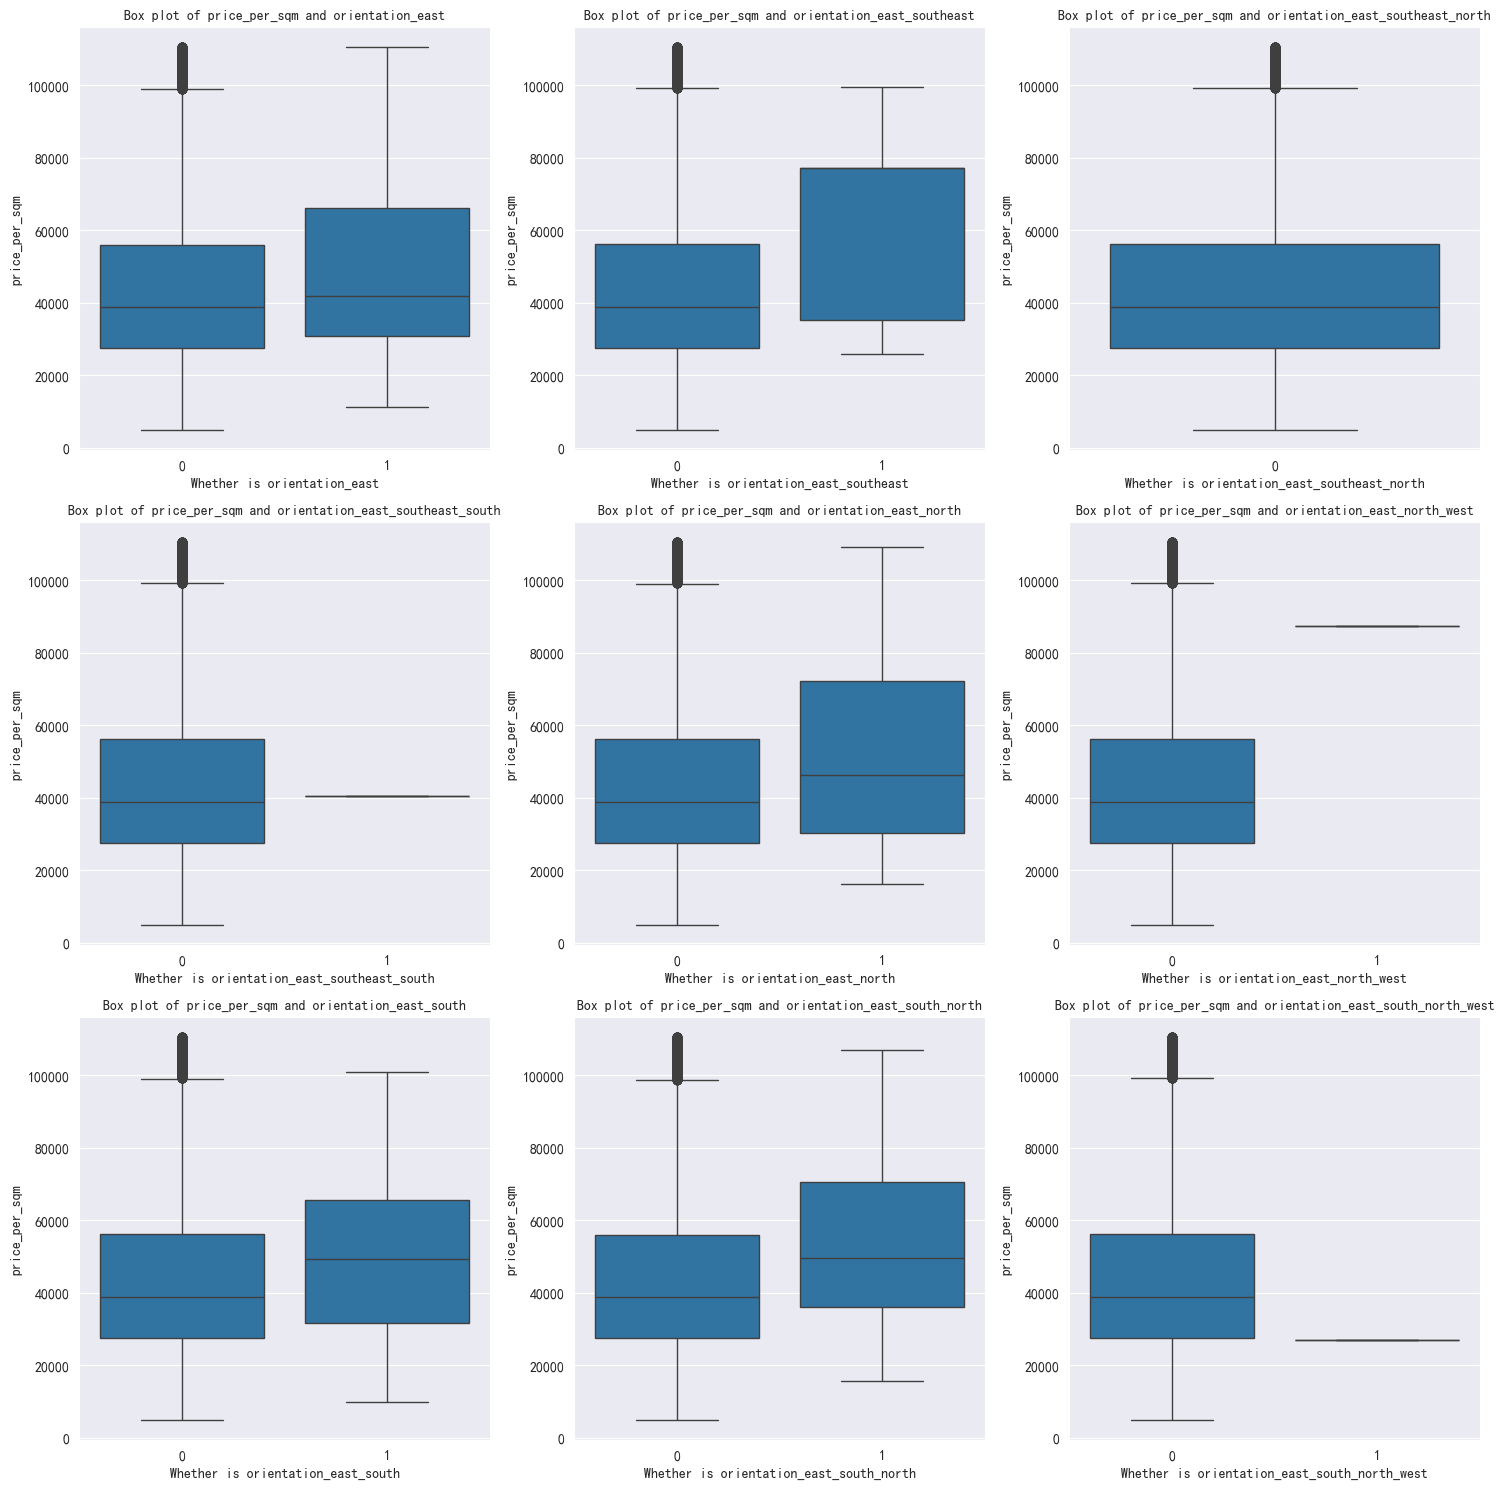

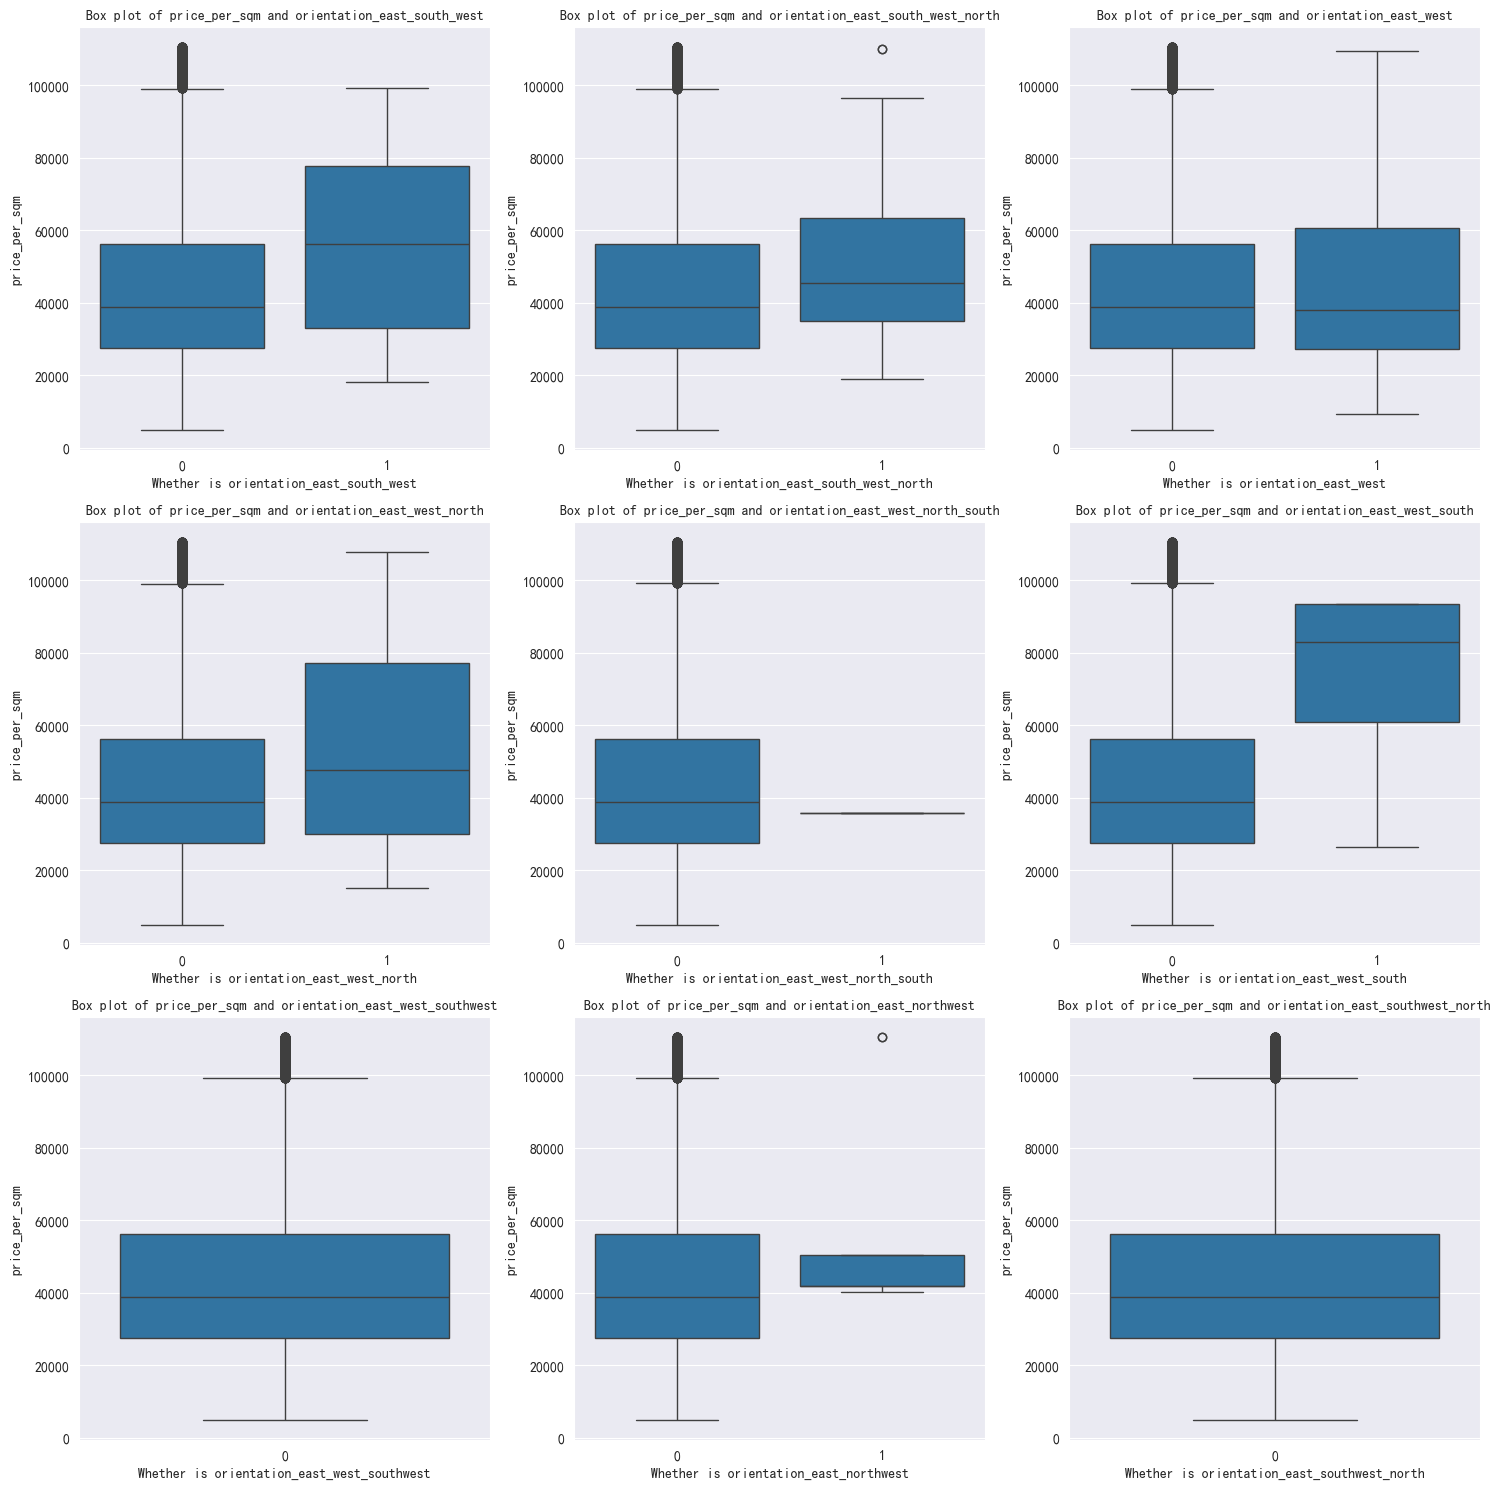

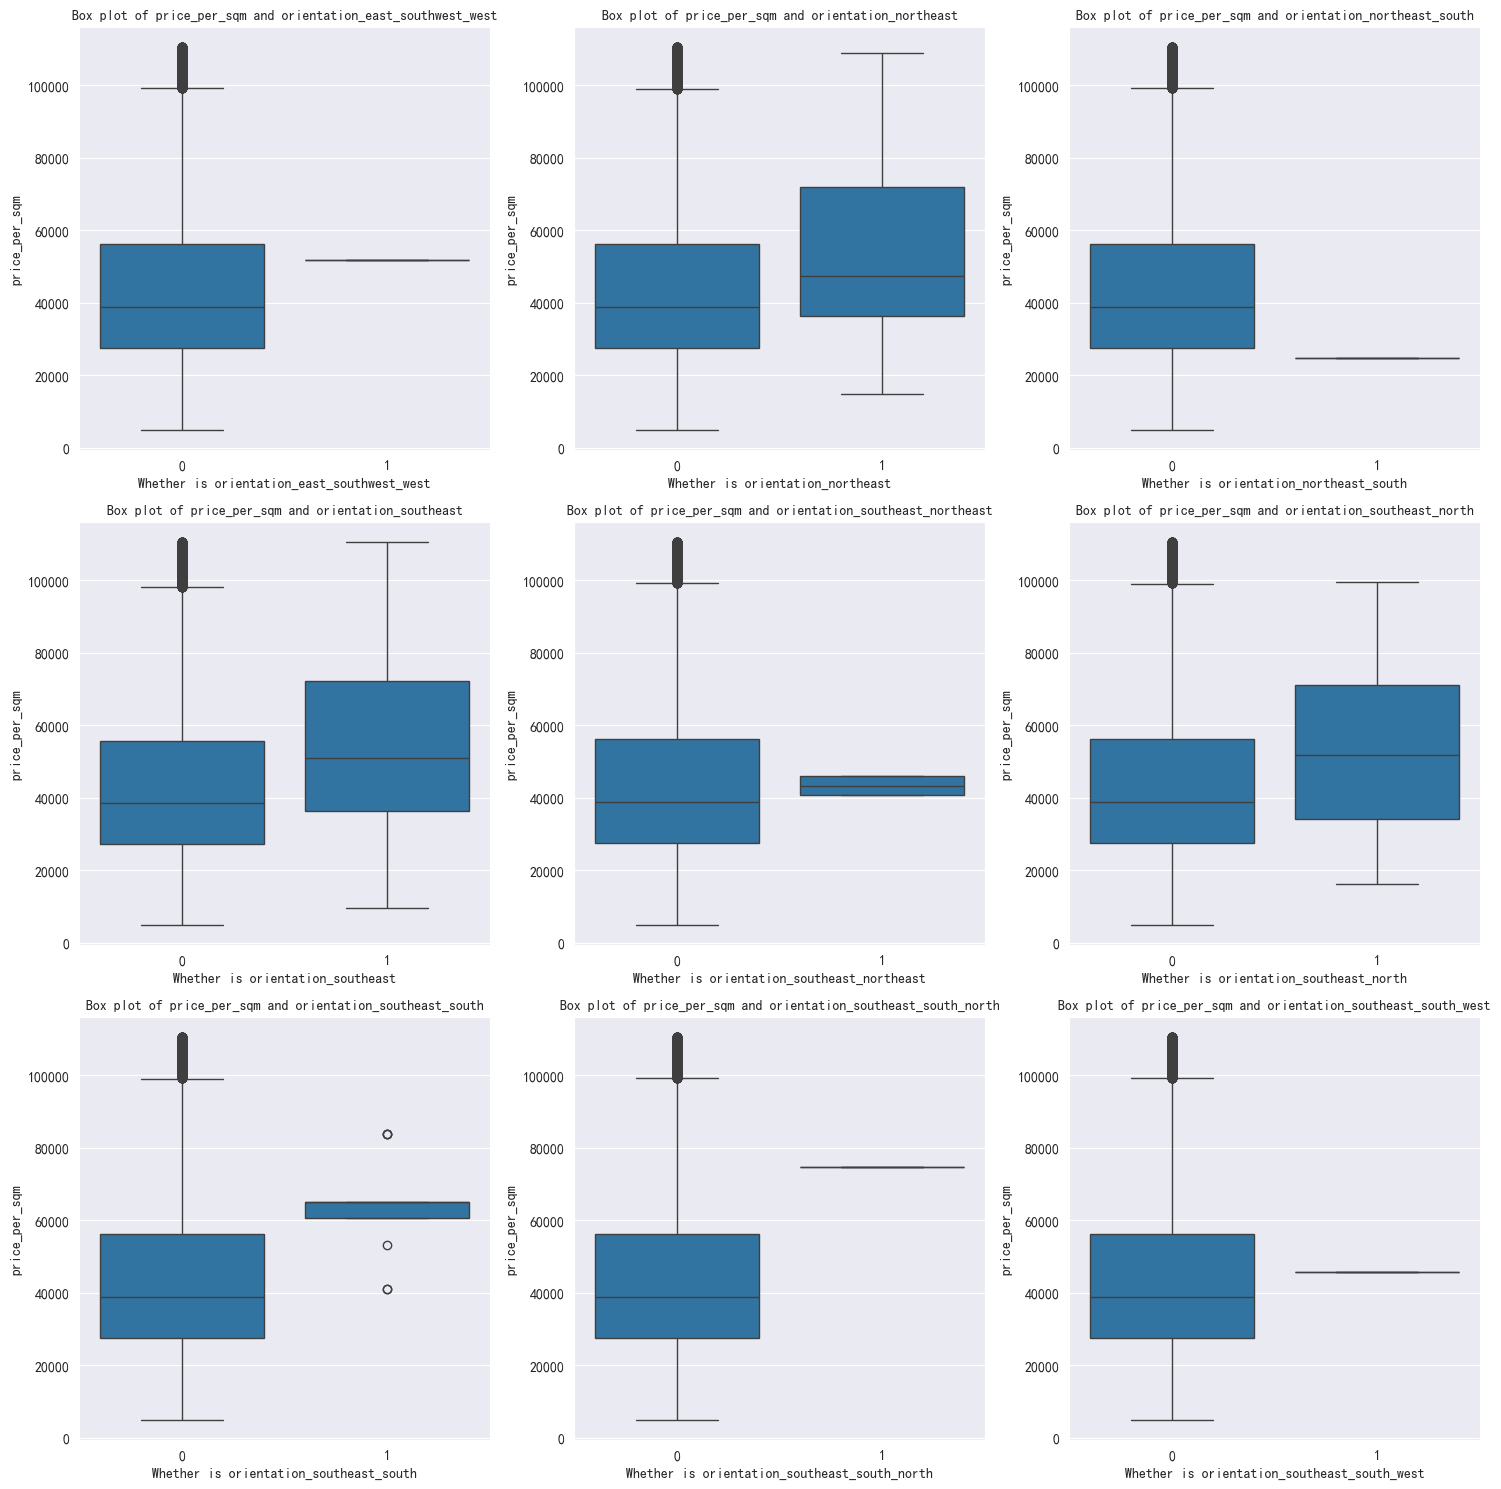

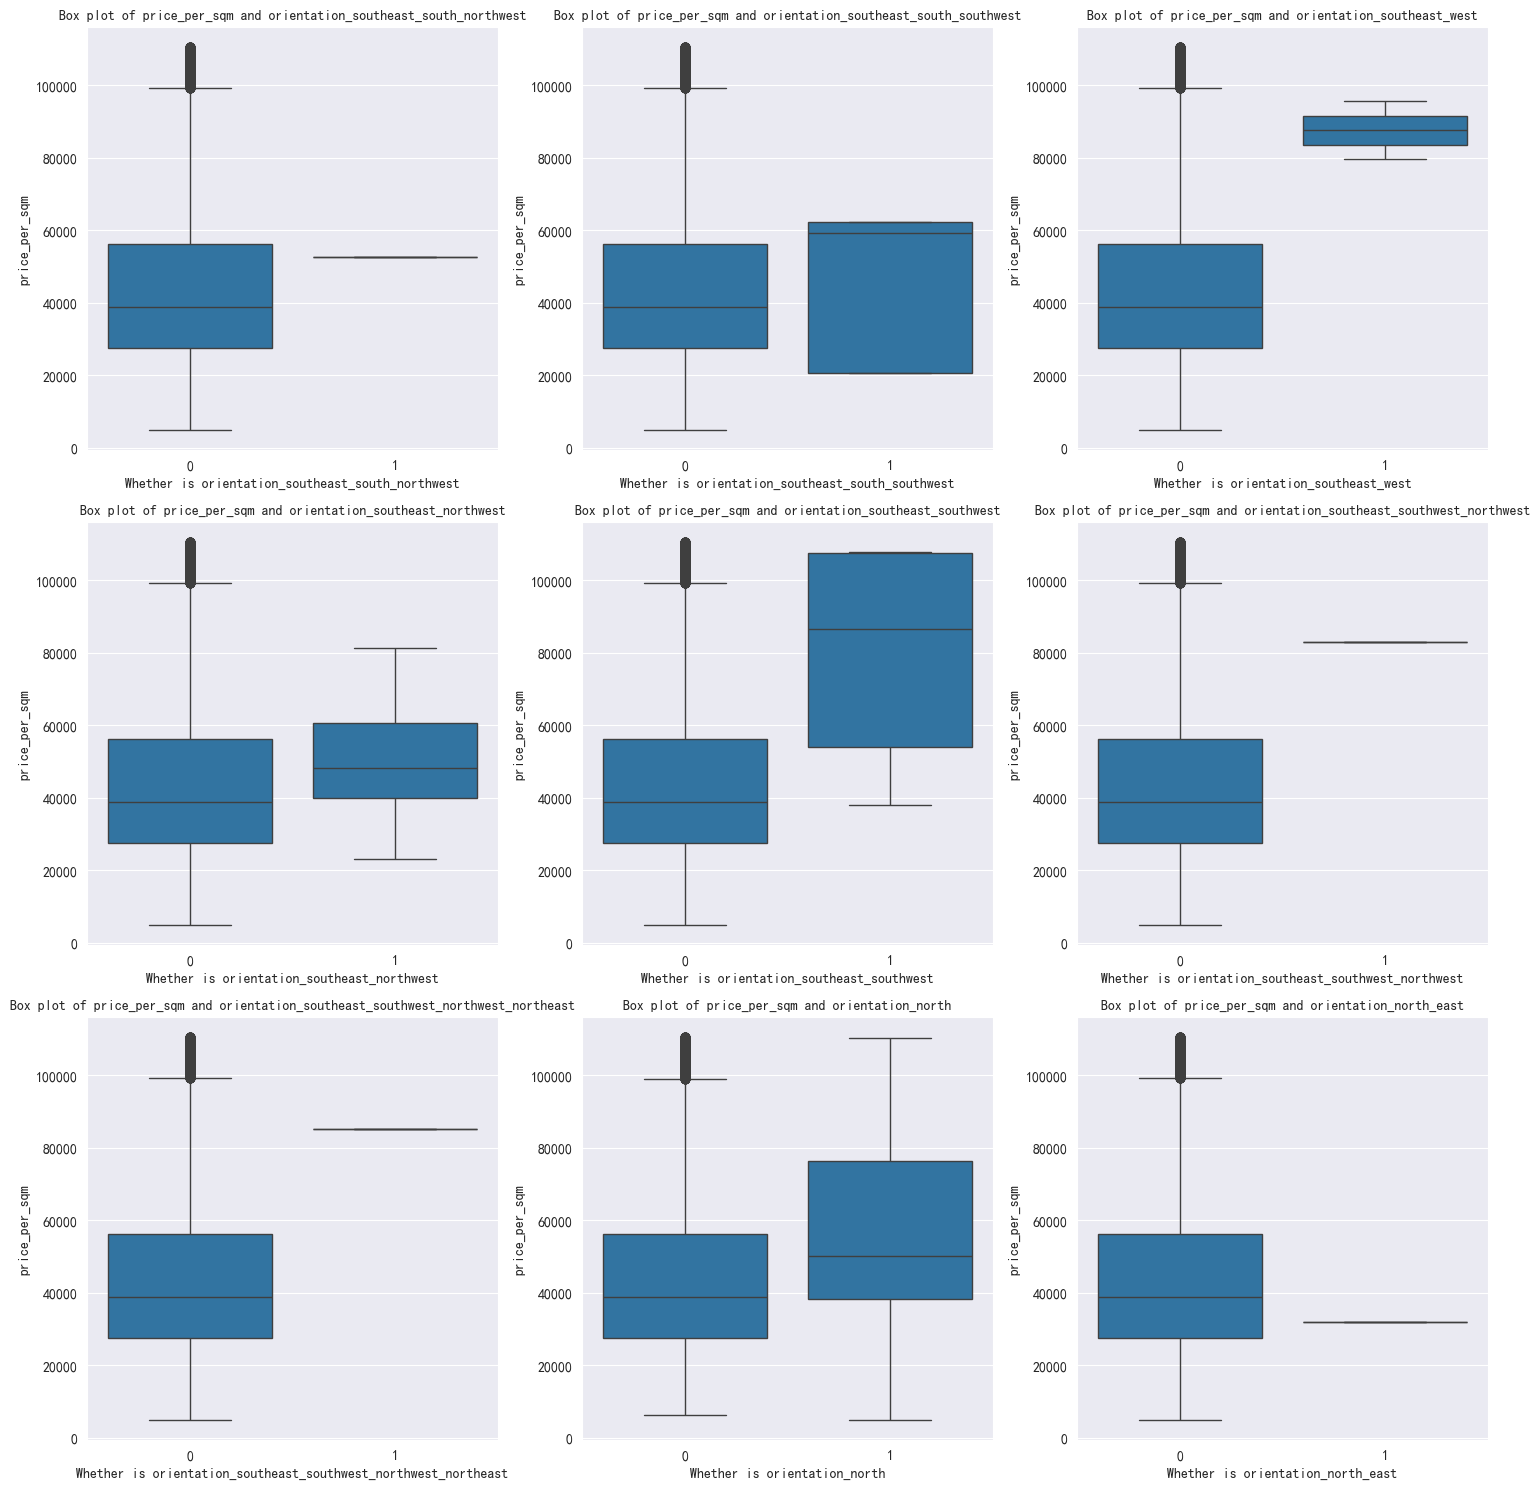

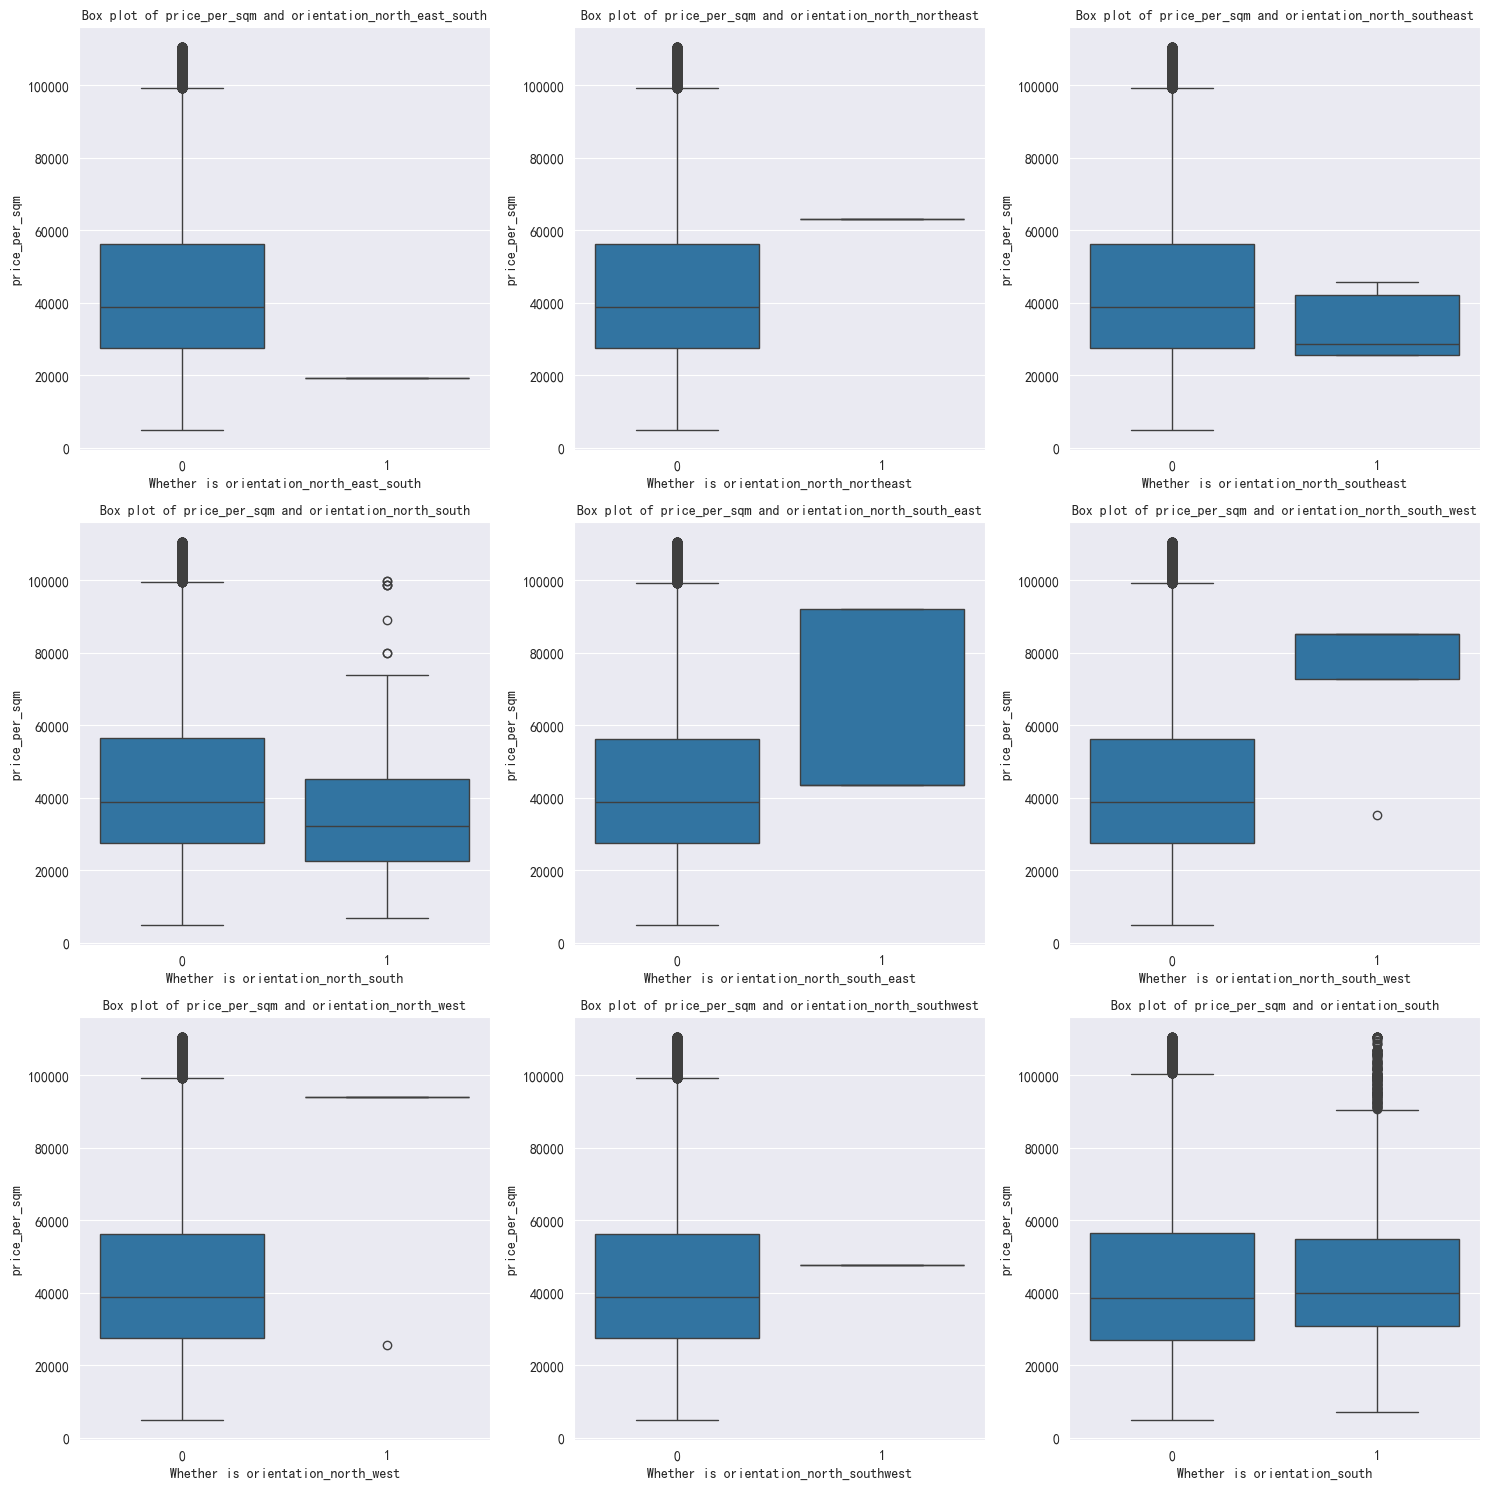

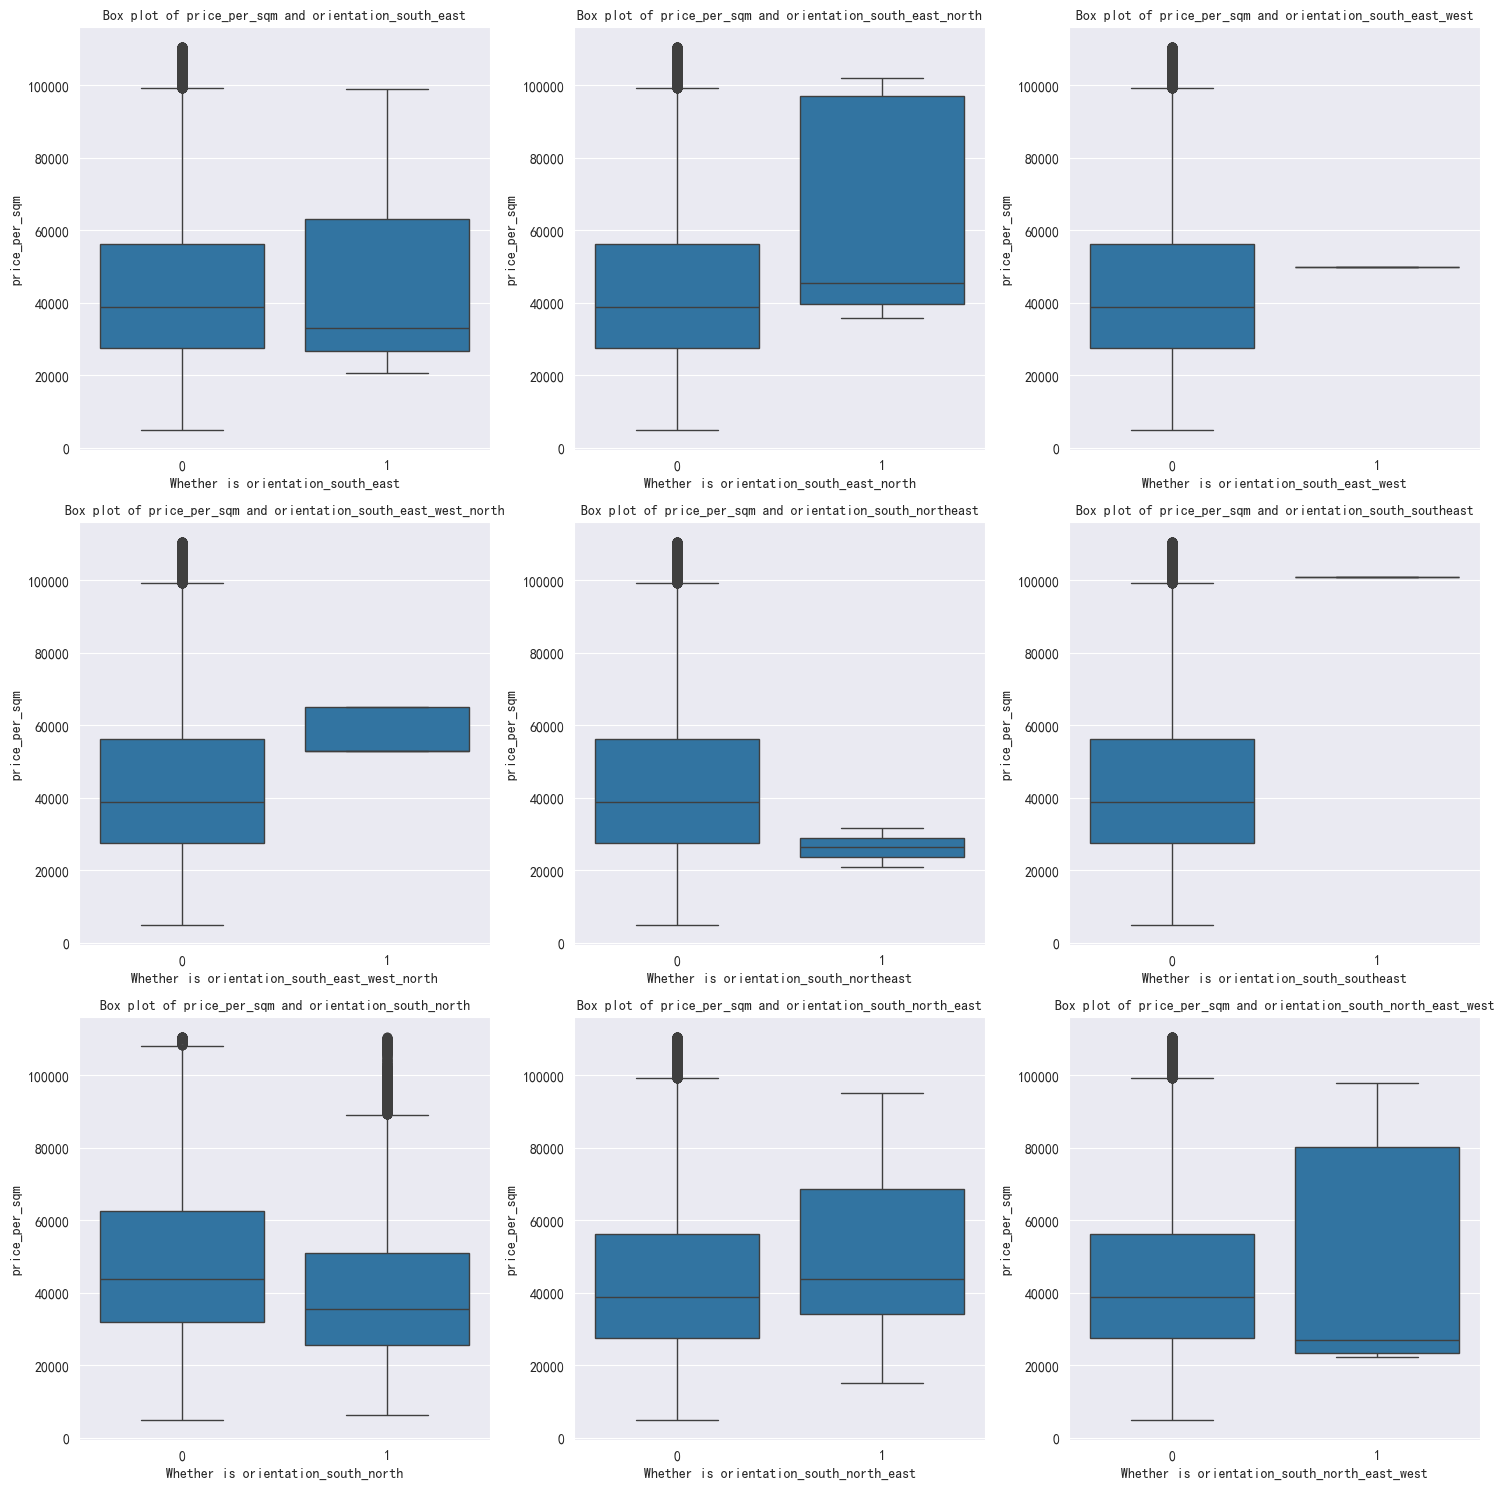

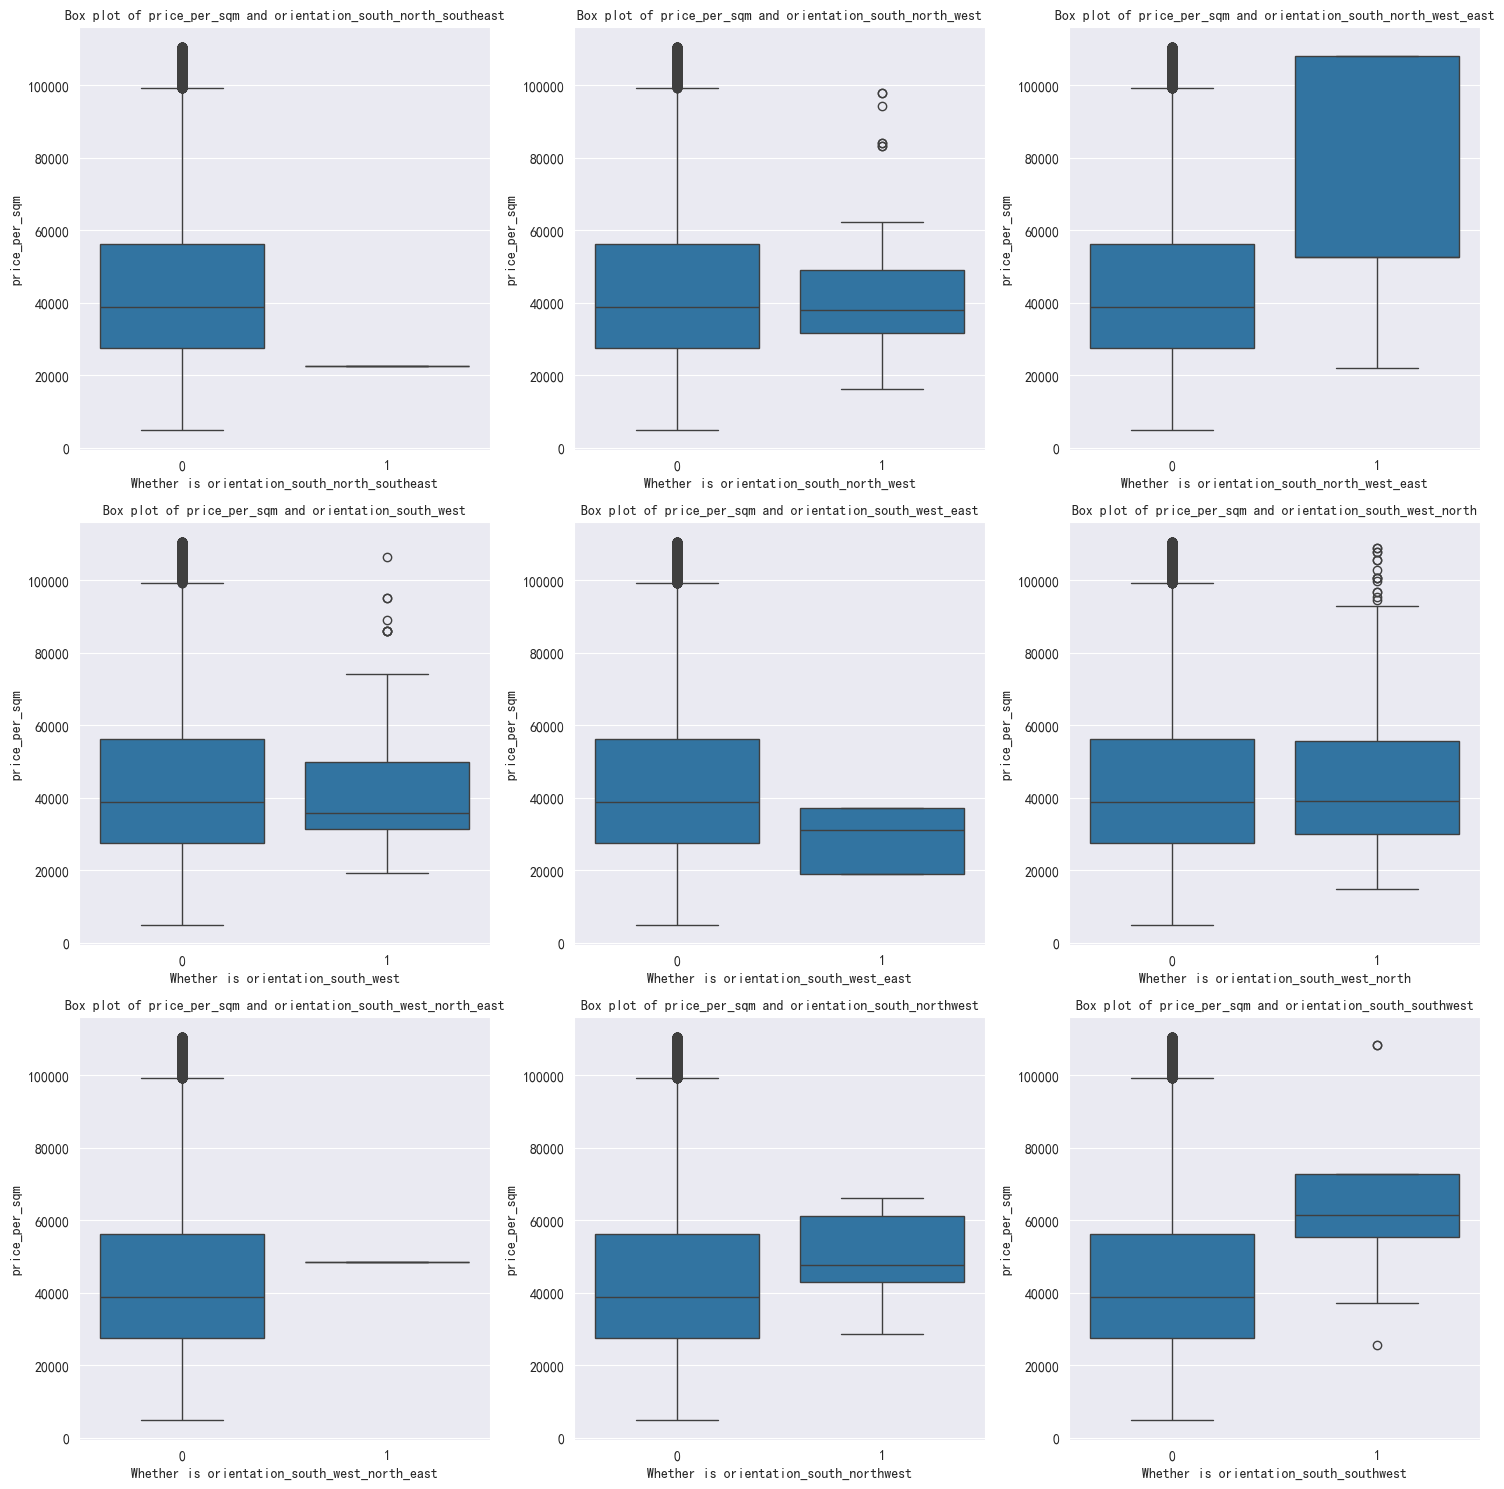

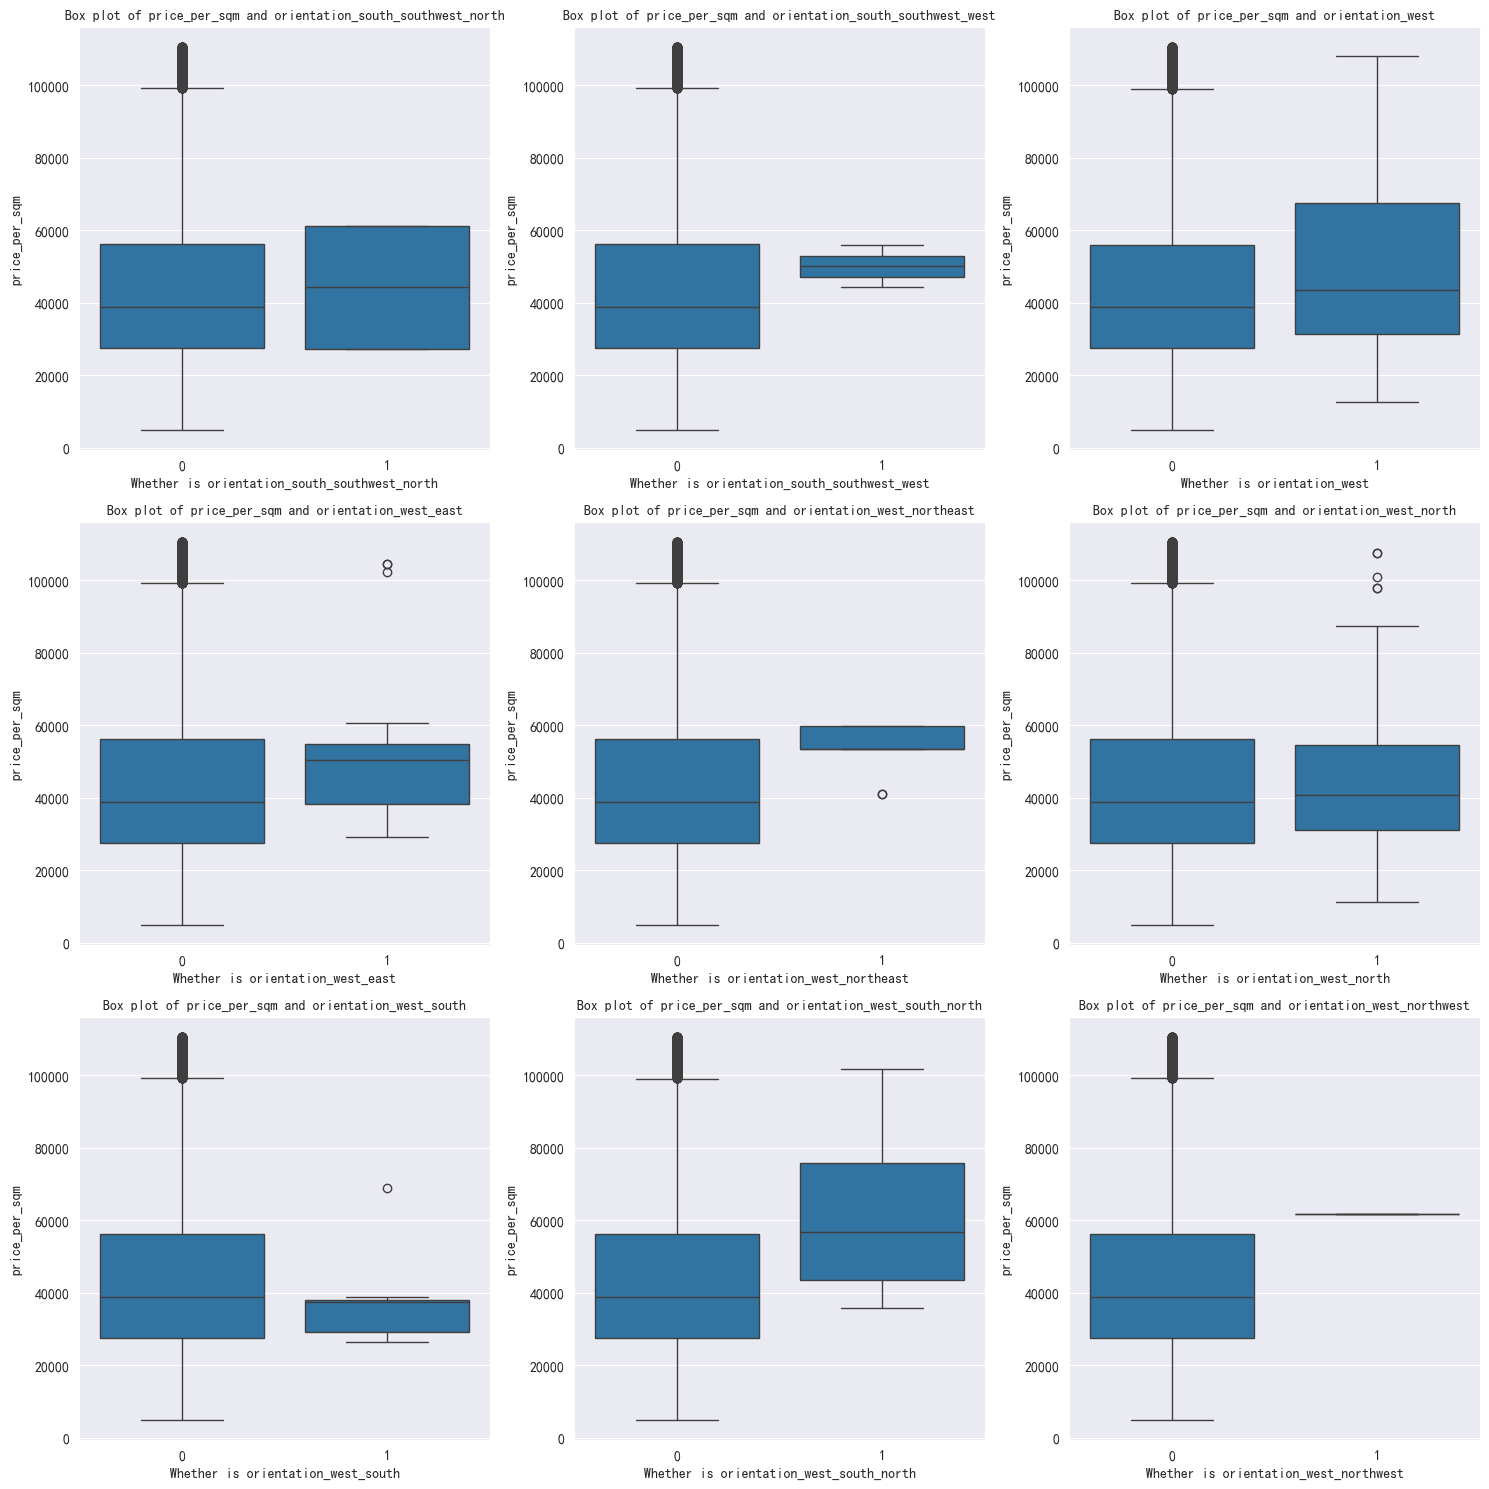

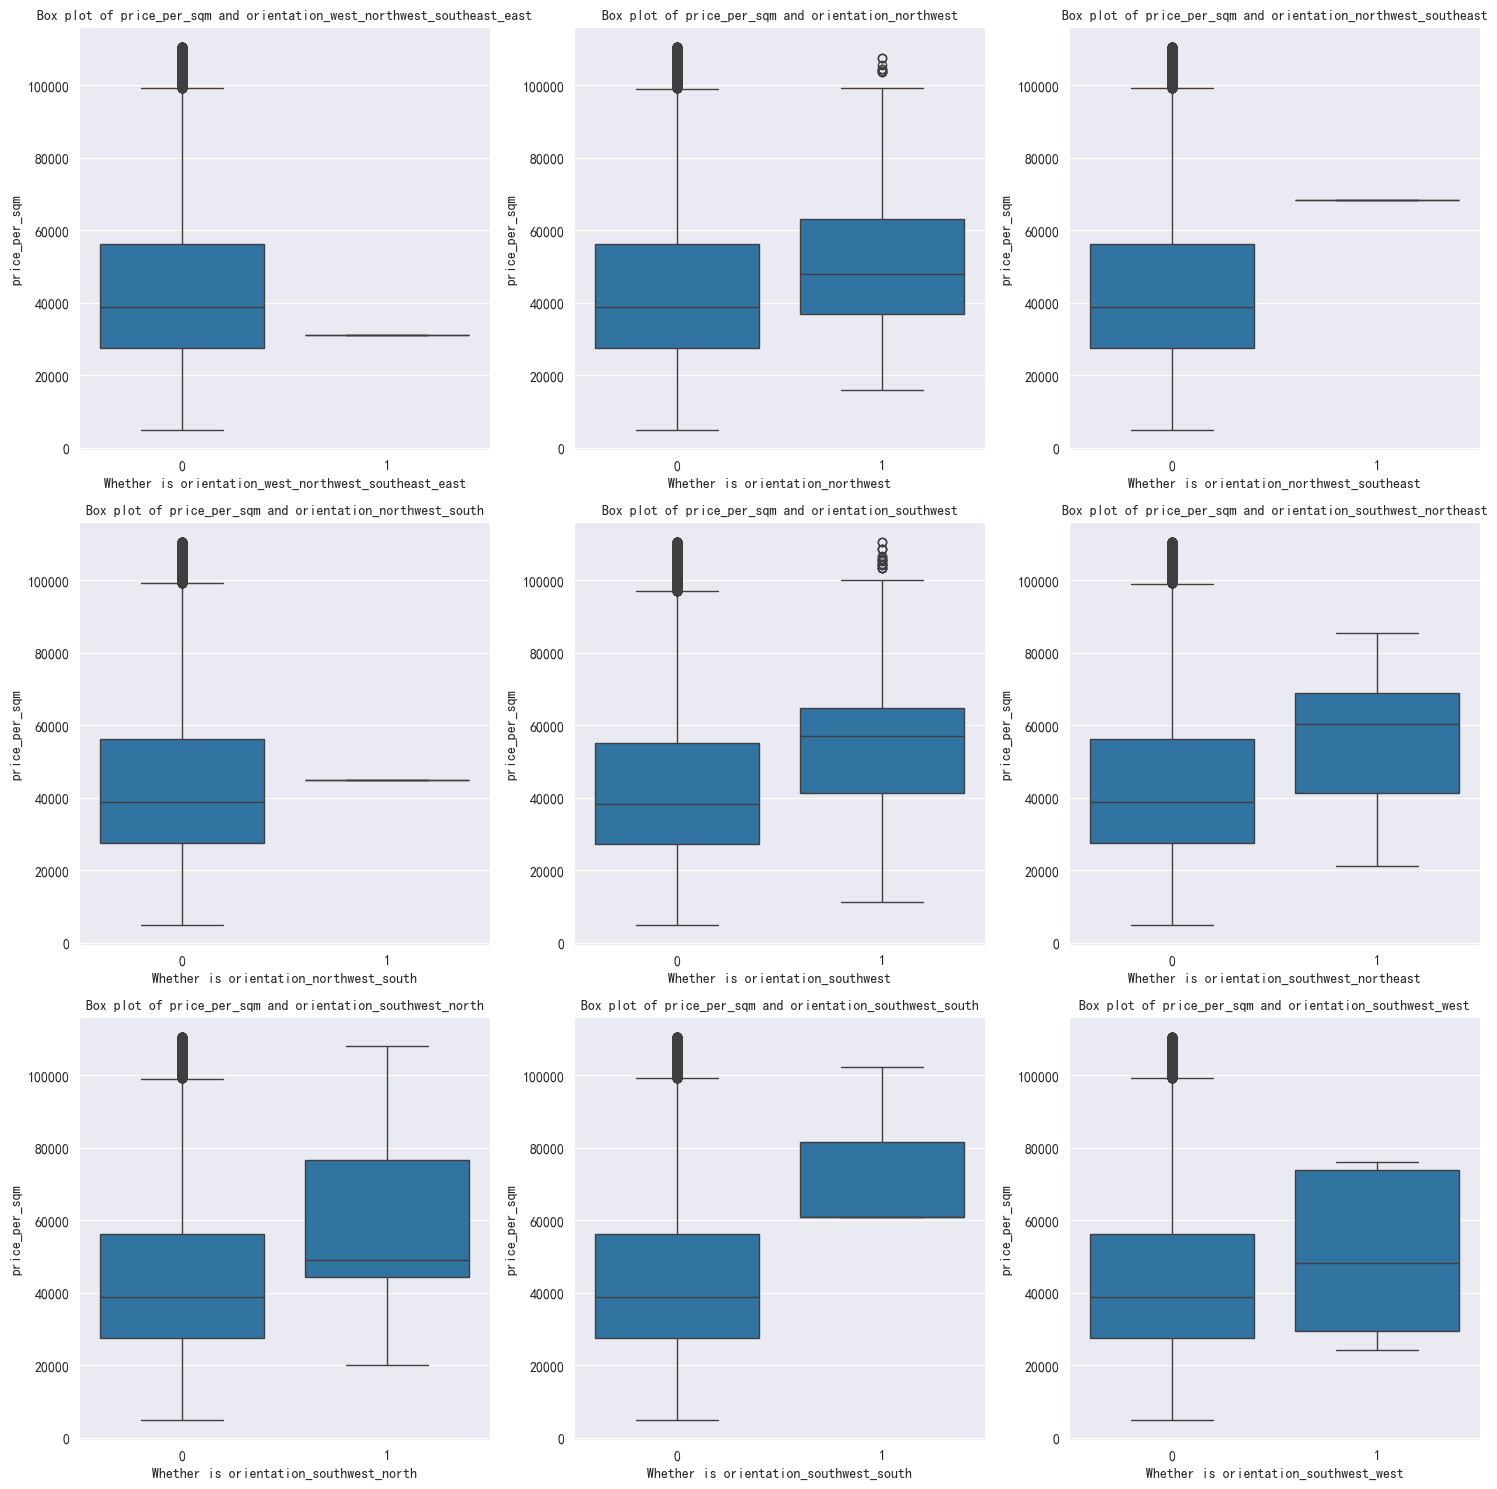

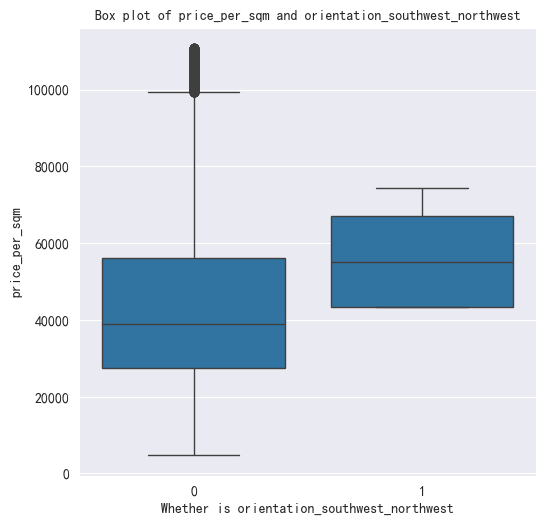

带有"decoration"关键词的列数: 4
总共需要生成 1 张图


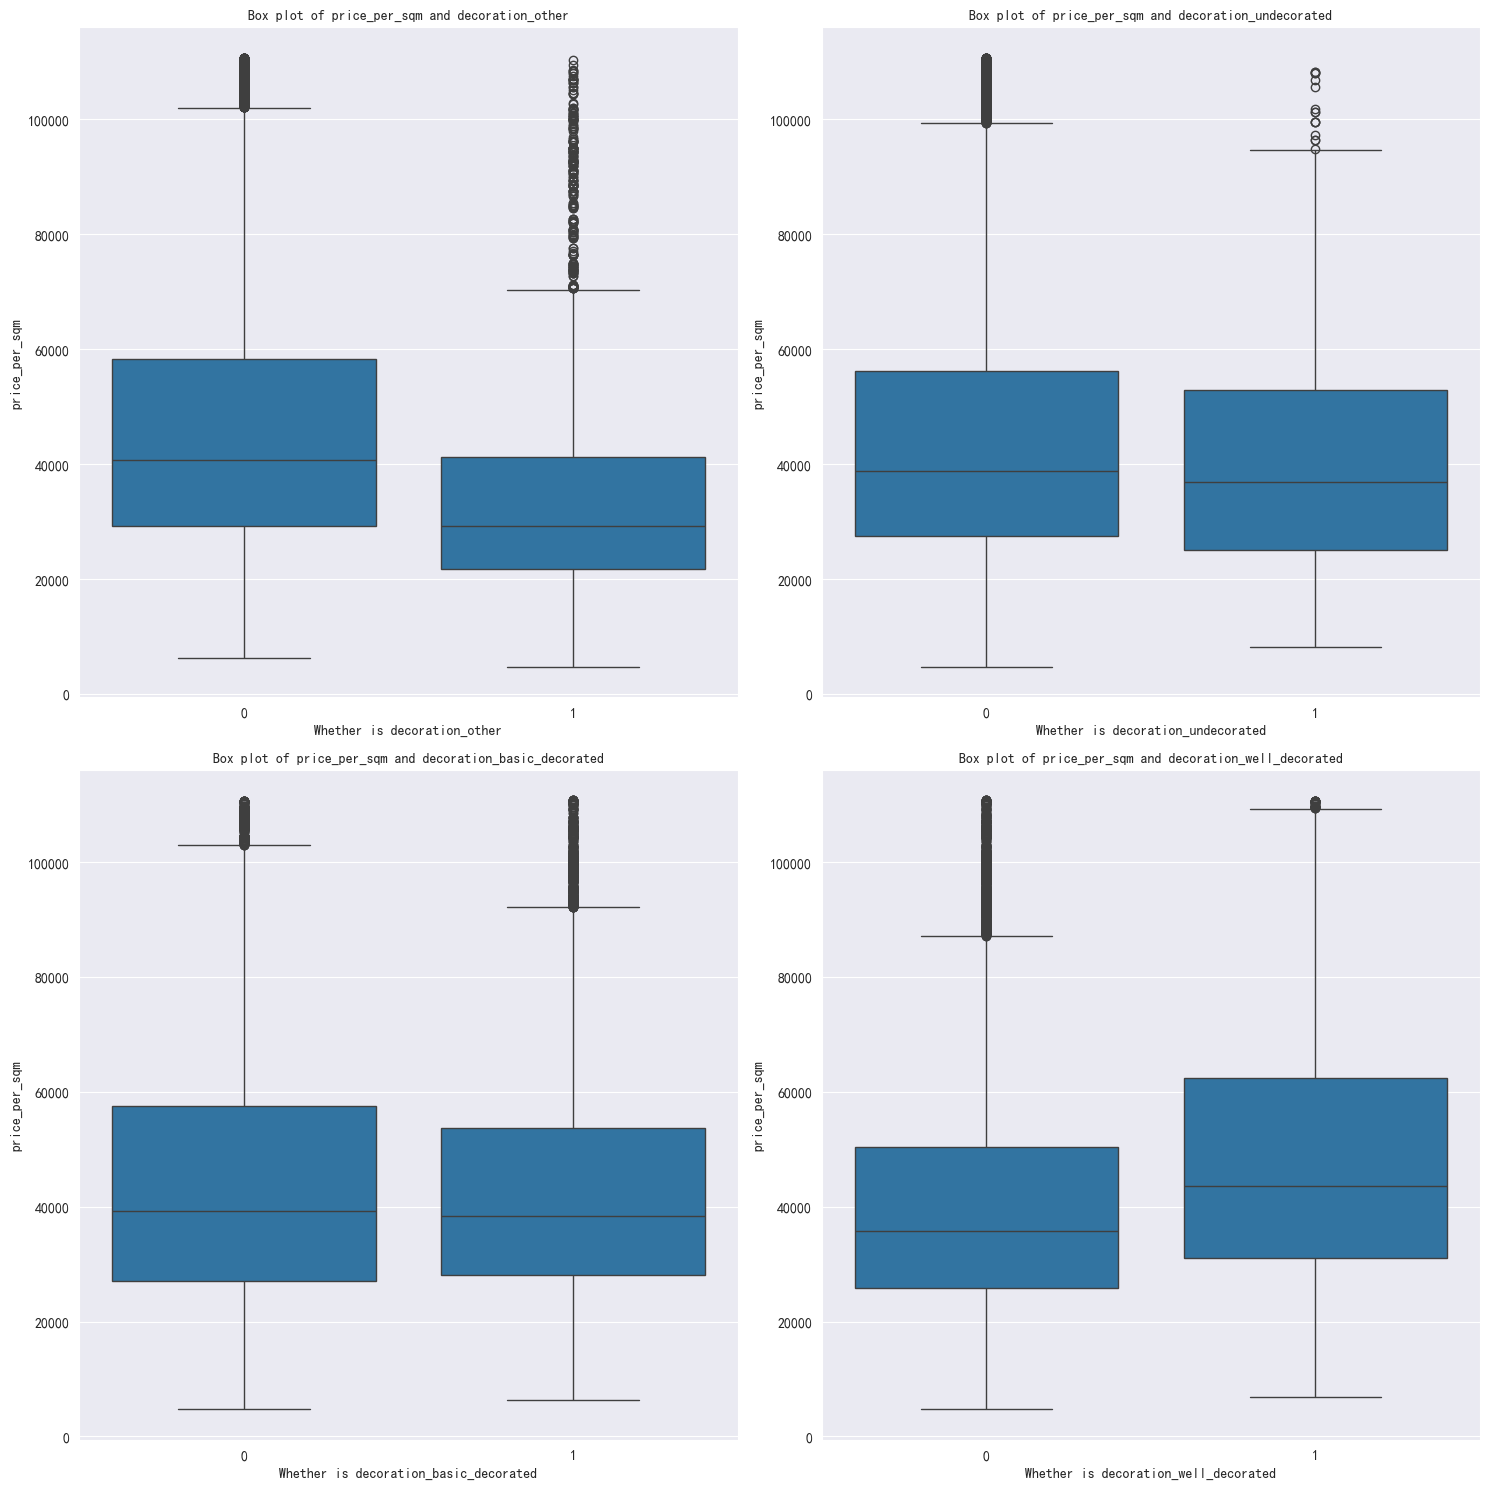

带有"floor_level"关键词的列数: 5
总共需要生成 1 张图


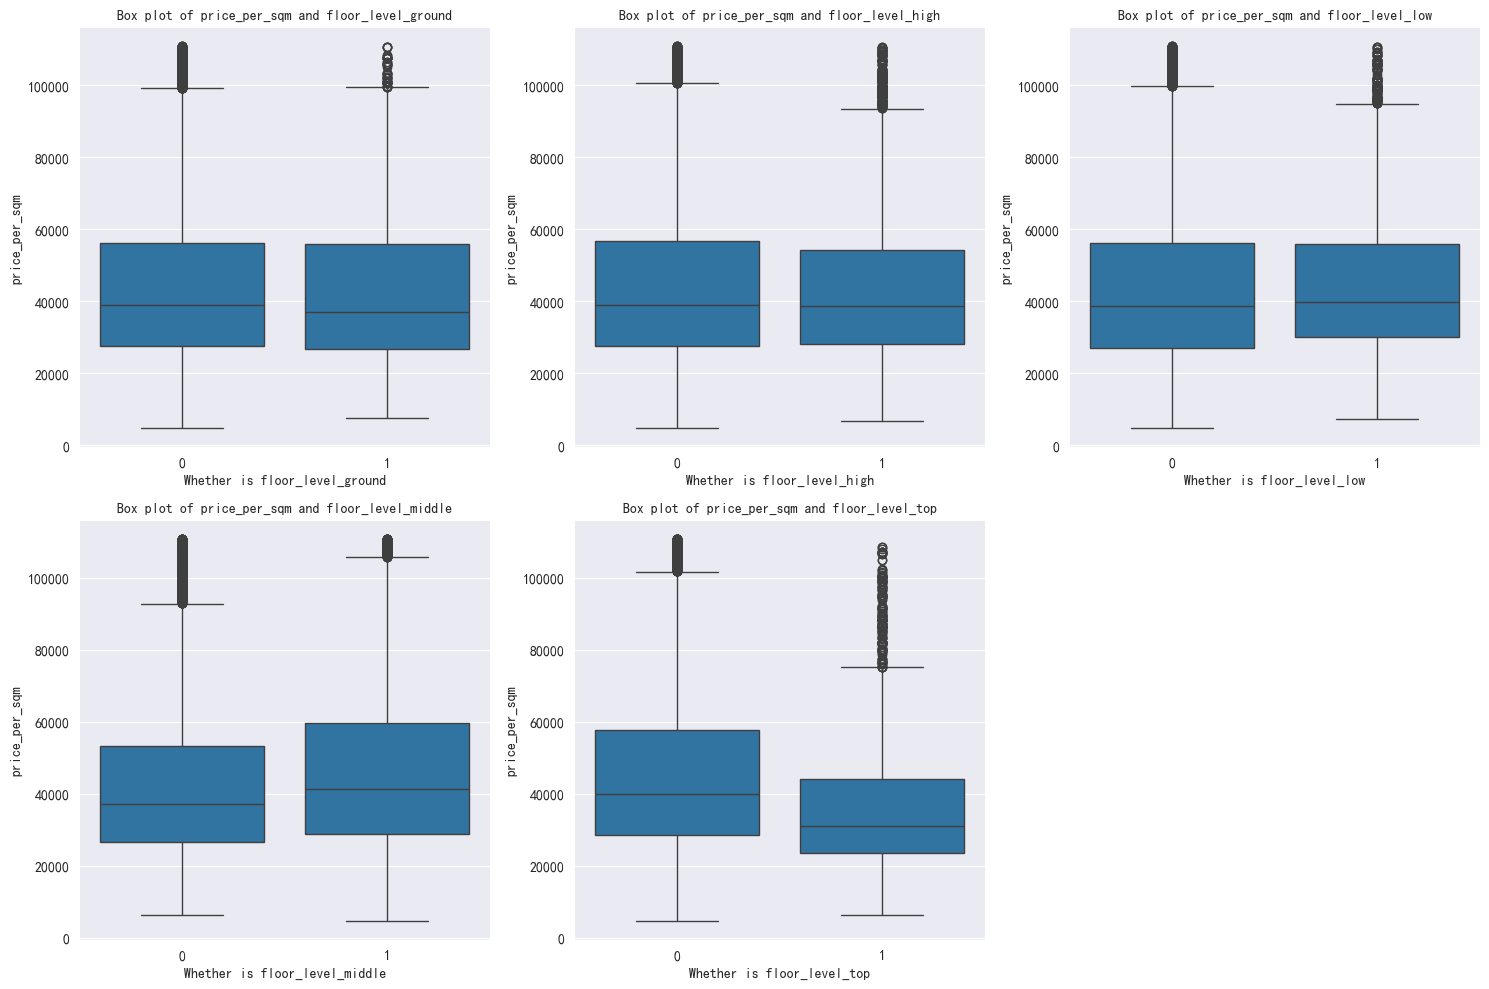

带有"building_type"关键词的列数: 3
总共需要生成 1 张图


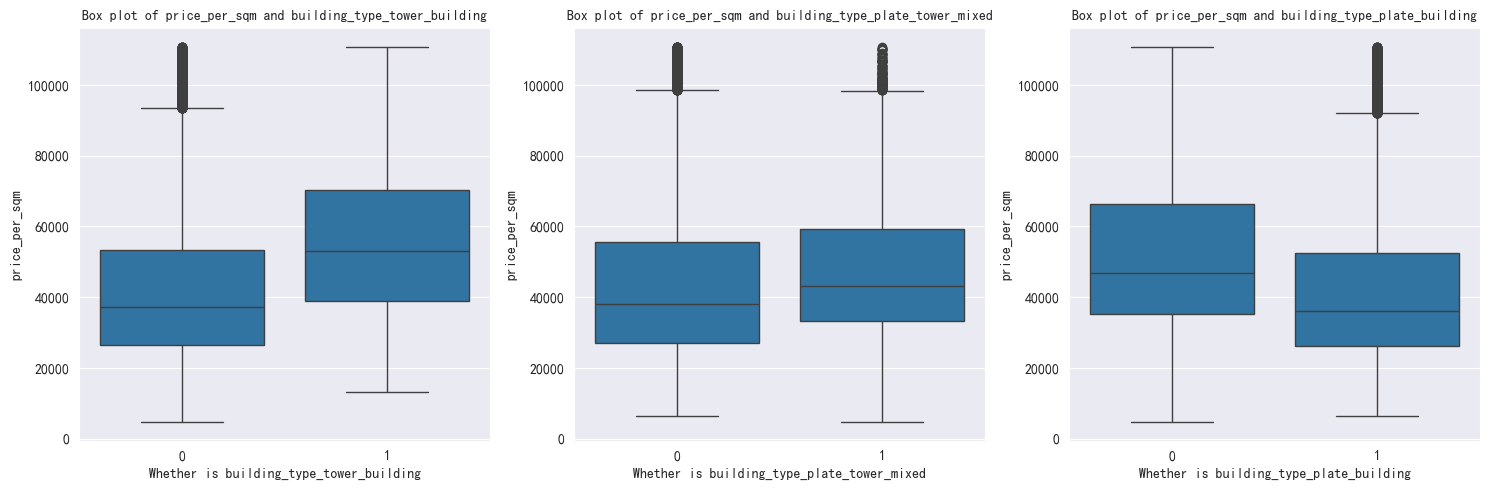

带有"build_year"关键词的列数: 4
总共需要生成 1 张图


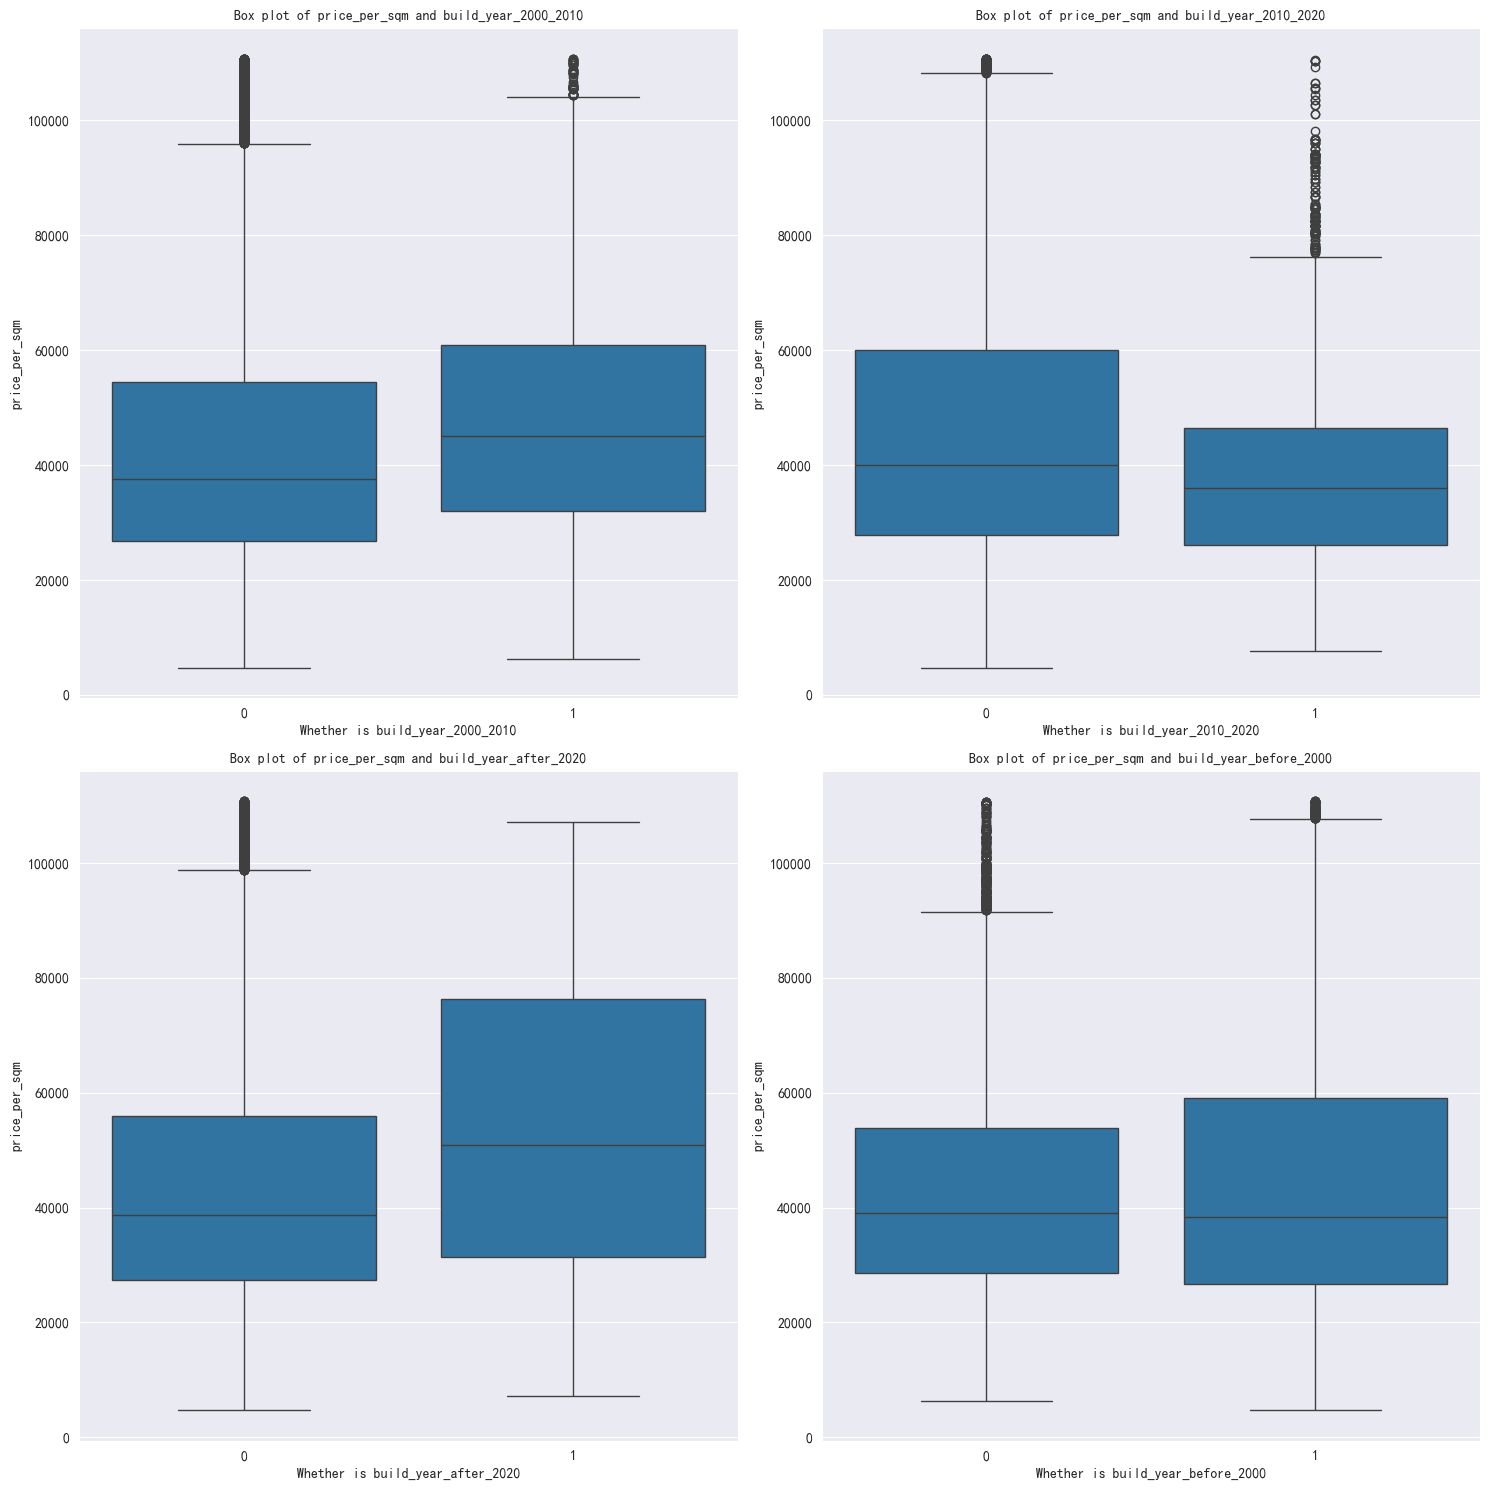

带有"district_"关键词的列数: 17
总共需要生成 2 张图


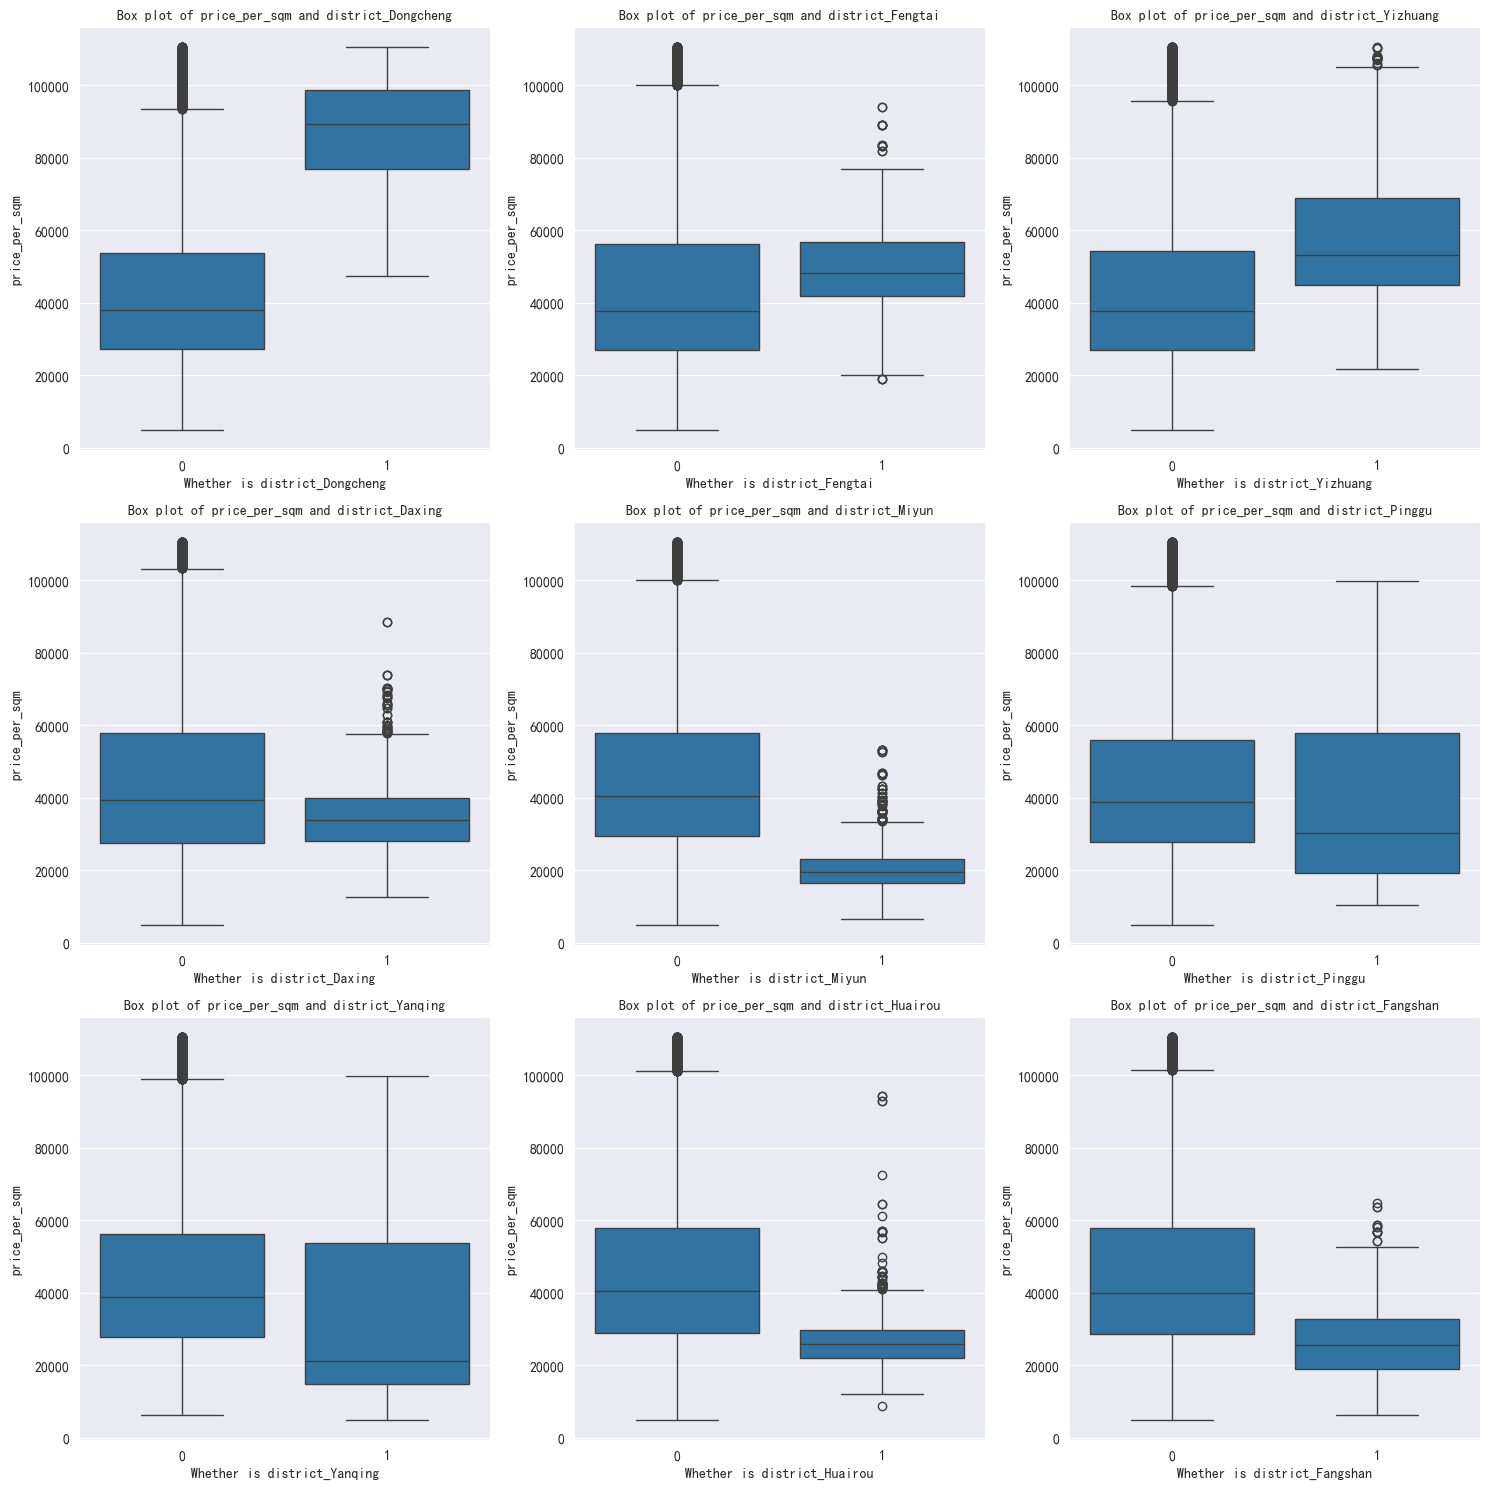

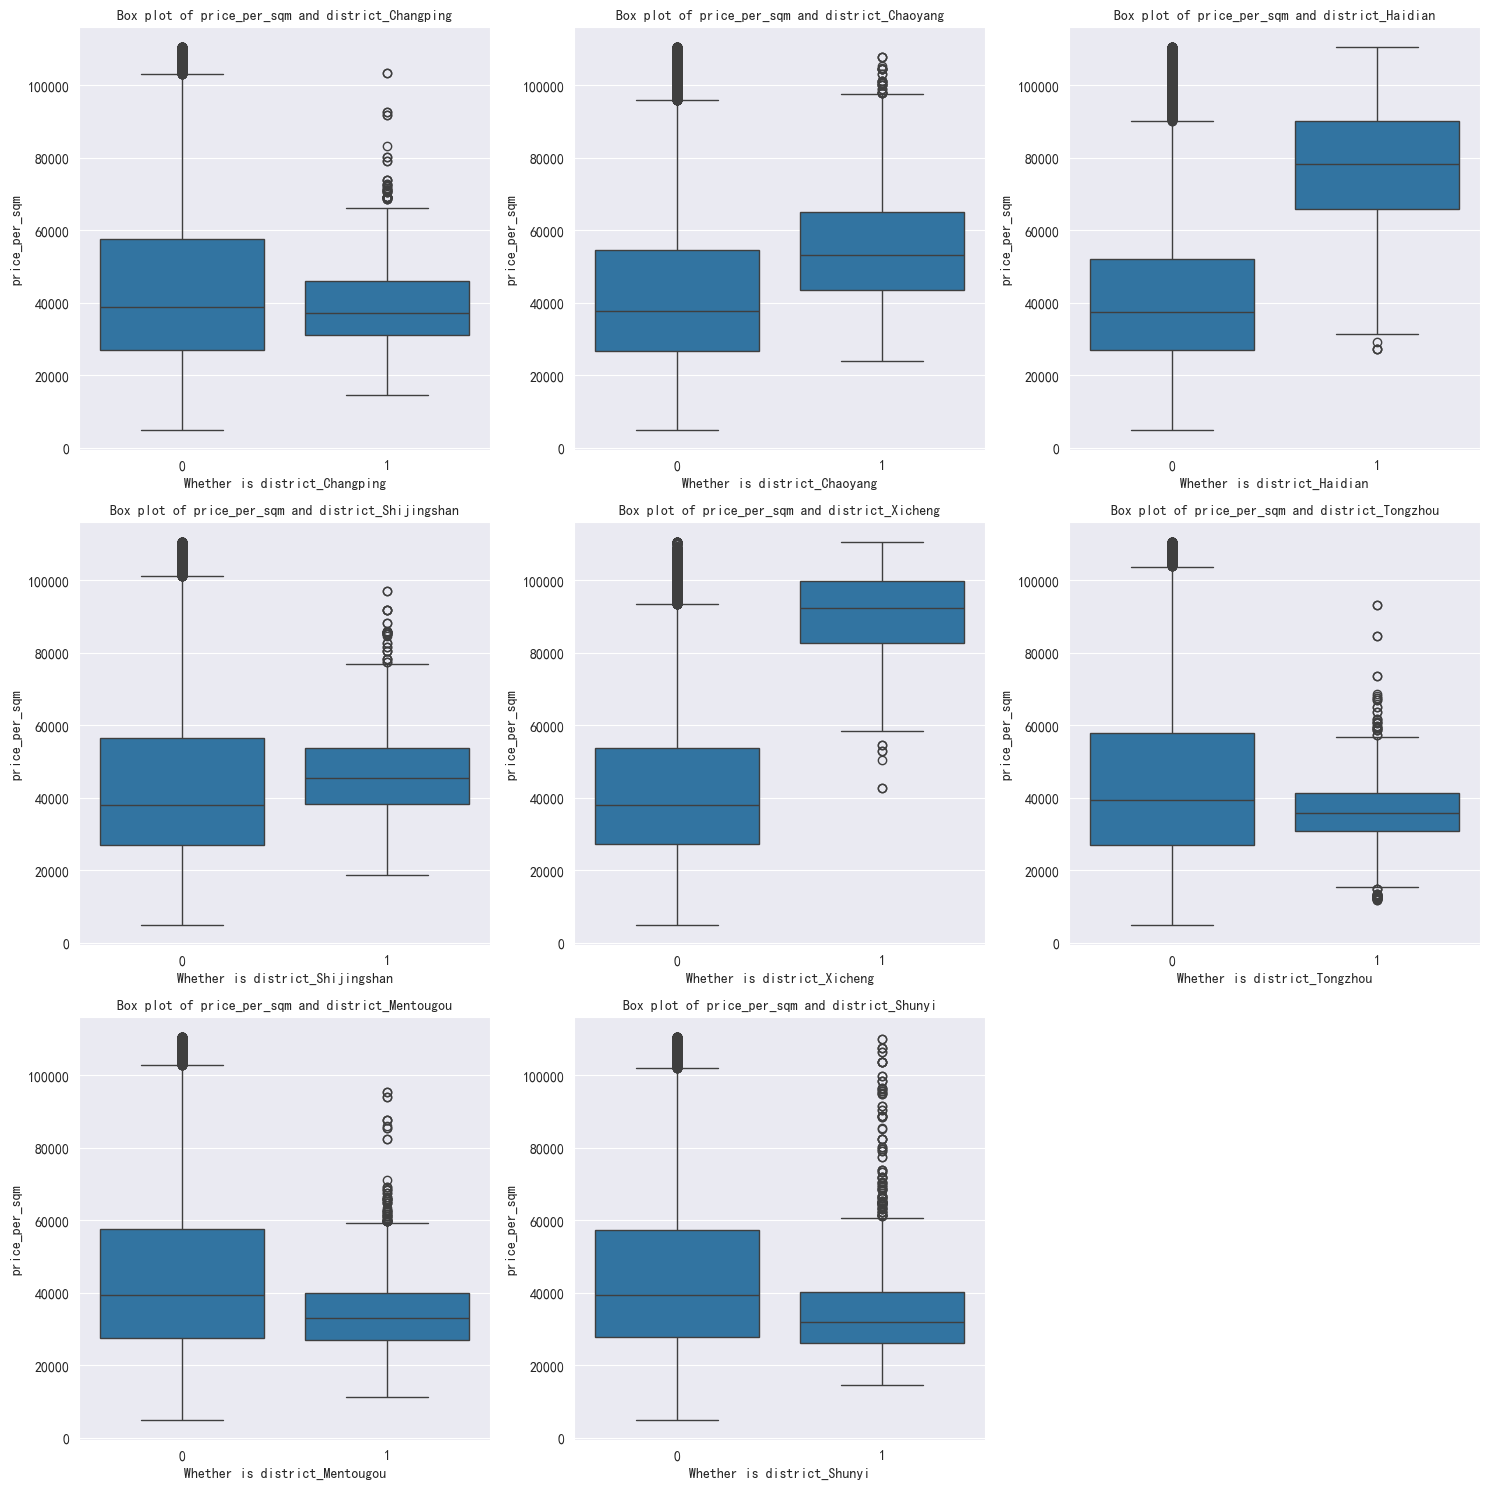

带有"near_subway"关键词的列数: 1
总共需要生成 1 张图


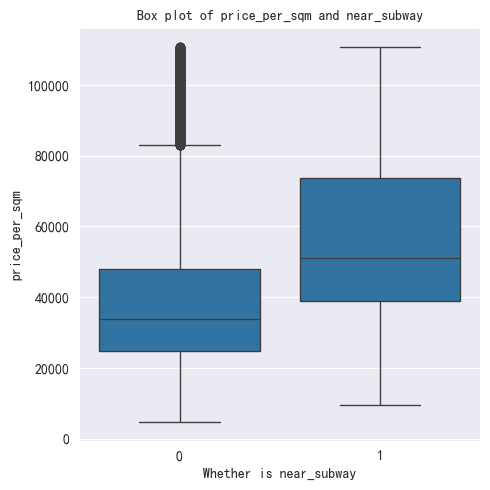

带有"owned_over_5y"关键词的列数: 1
总共需要生成 1 张图


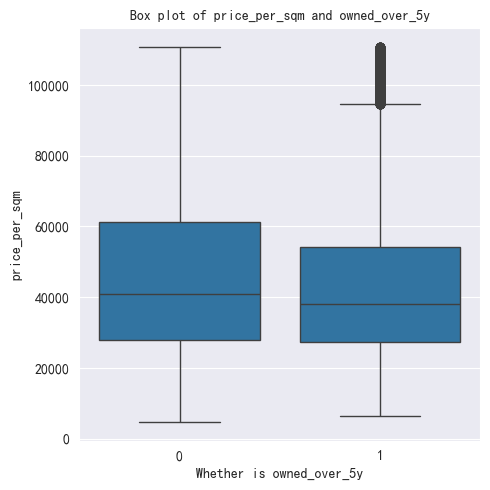

带有"has_elevator"关键词的列数: 1
总共需要生成 1 张图


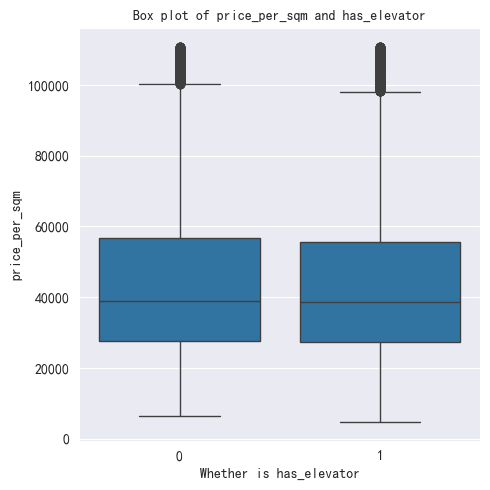

带有"bedroom"关键词的列数: 15
总共需要生成 2 张图


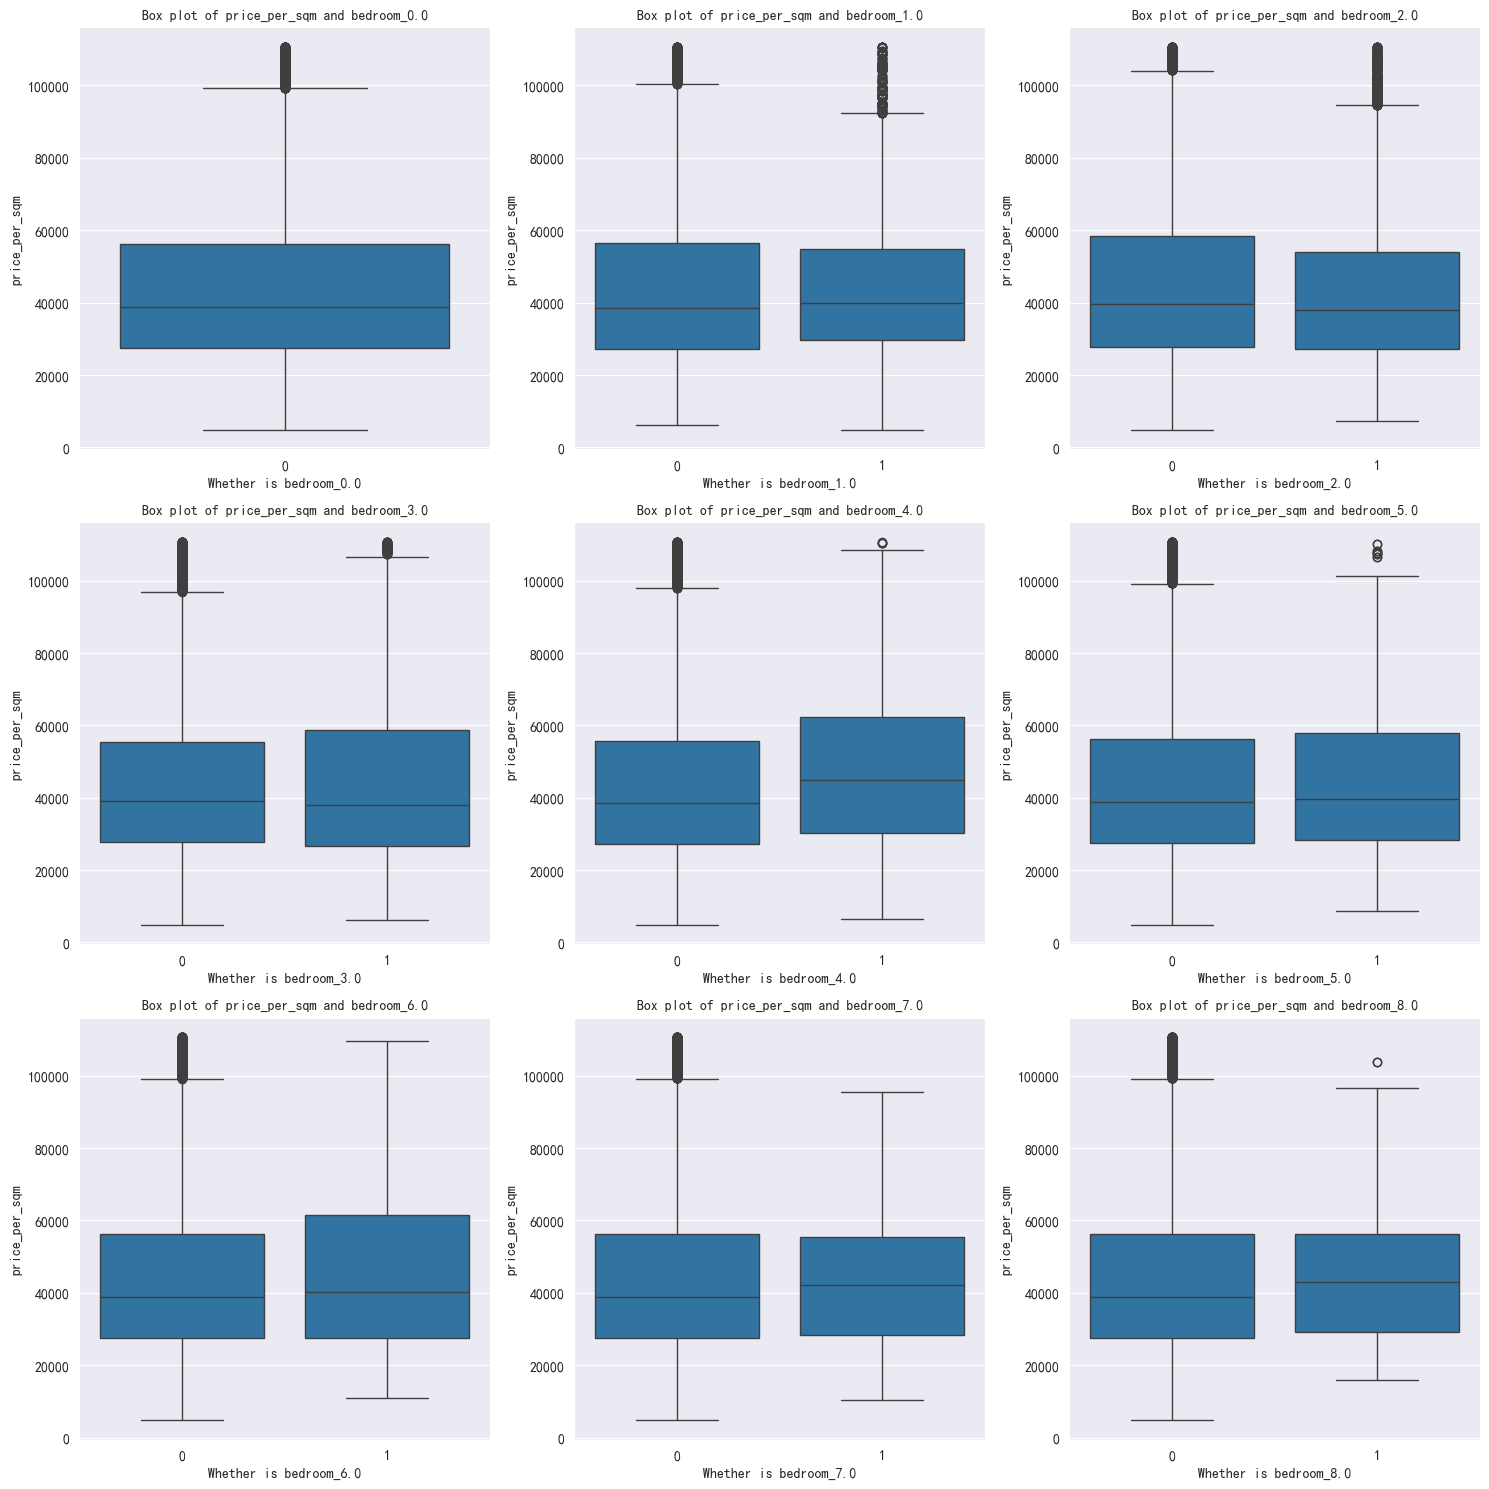

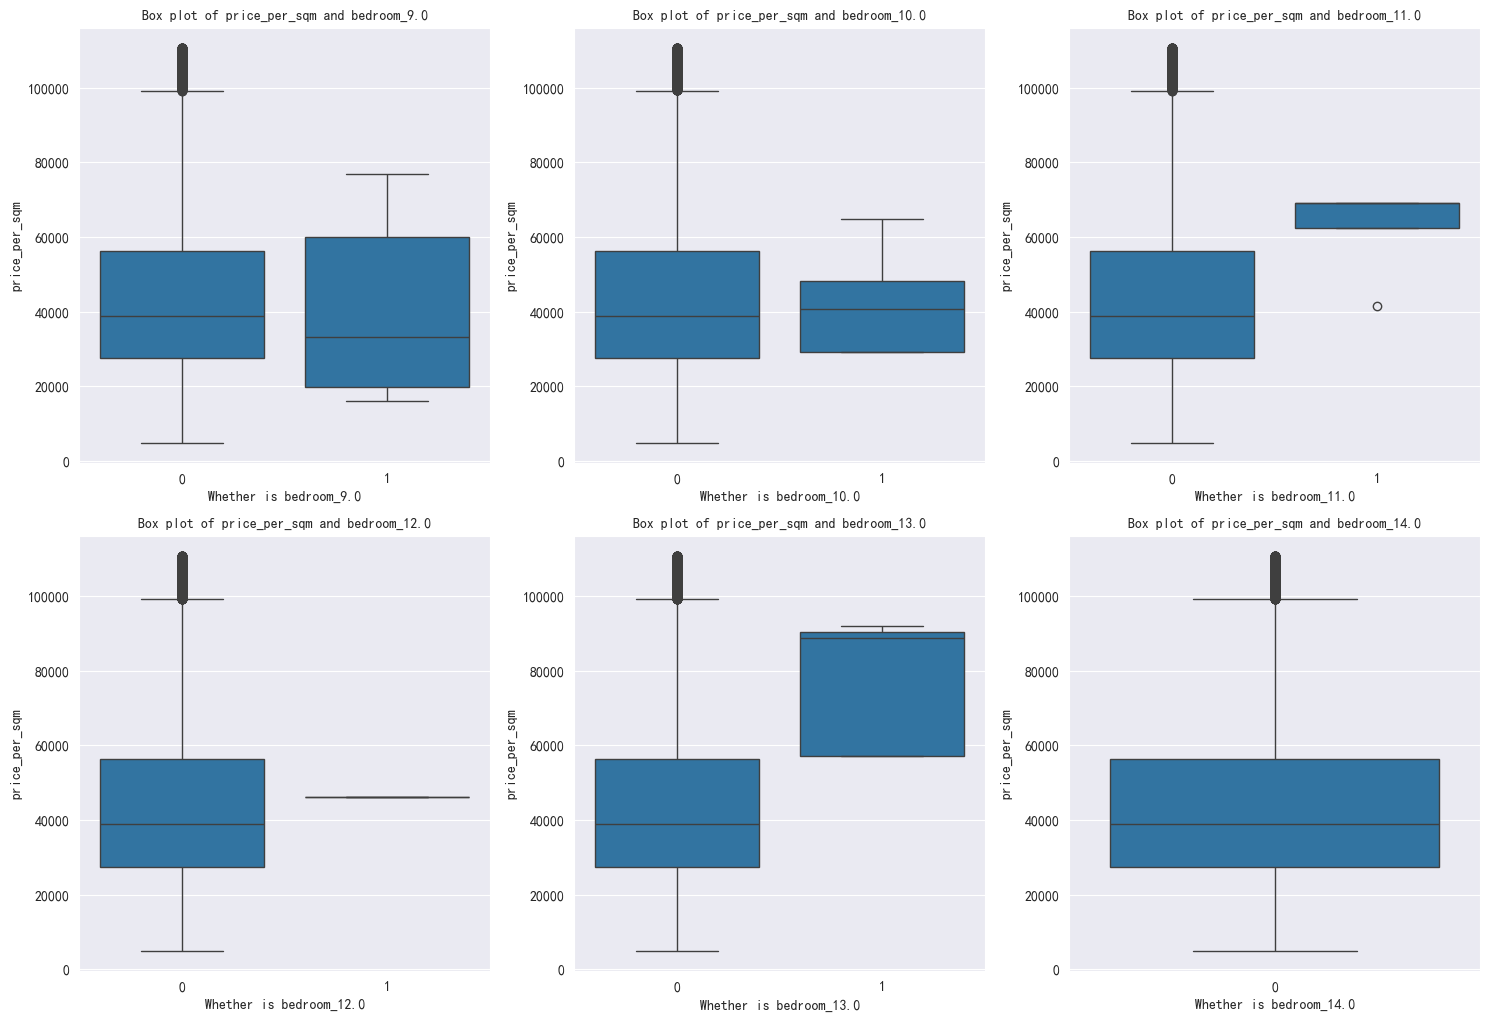

带有"living_room"关键词的列数: 9
总共需要生成 1 张图


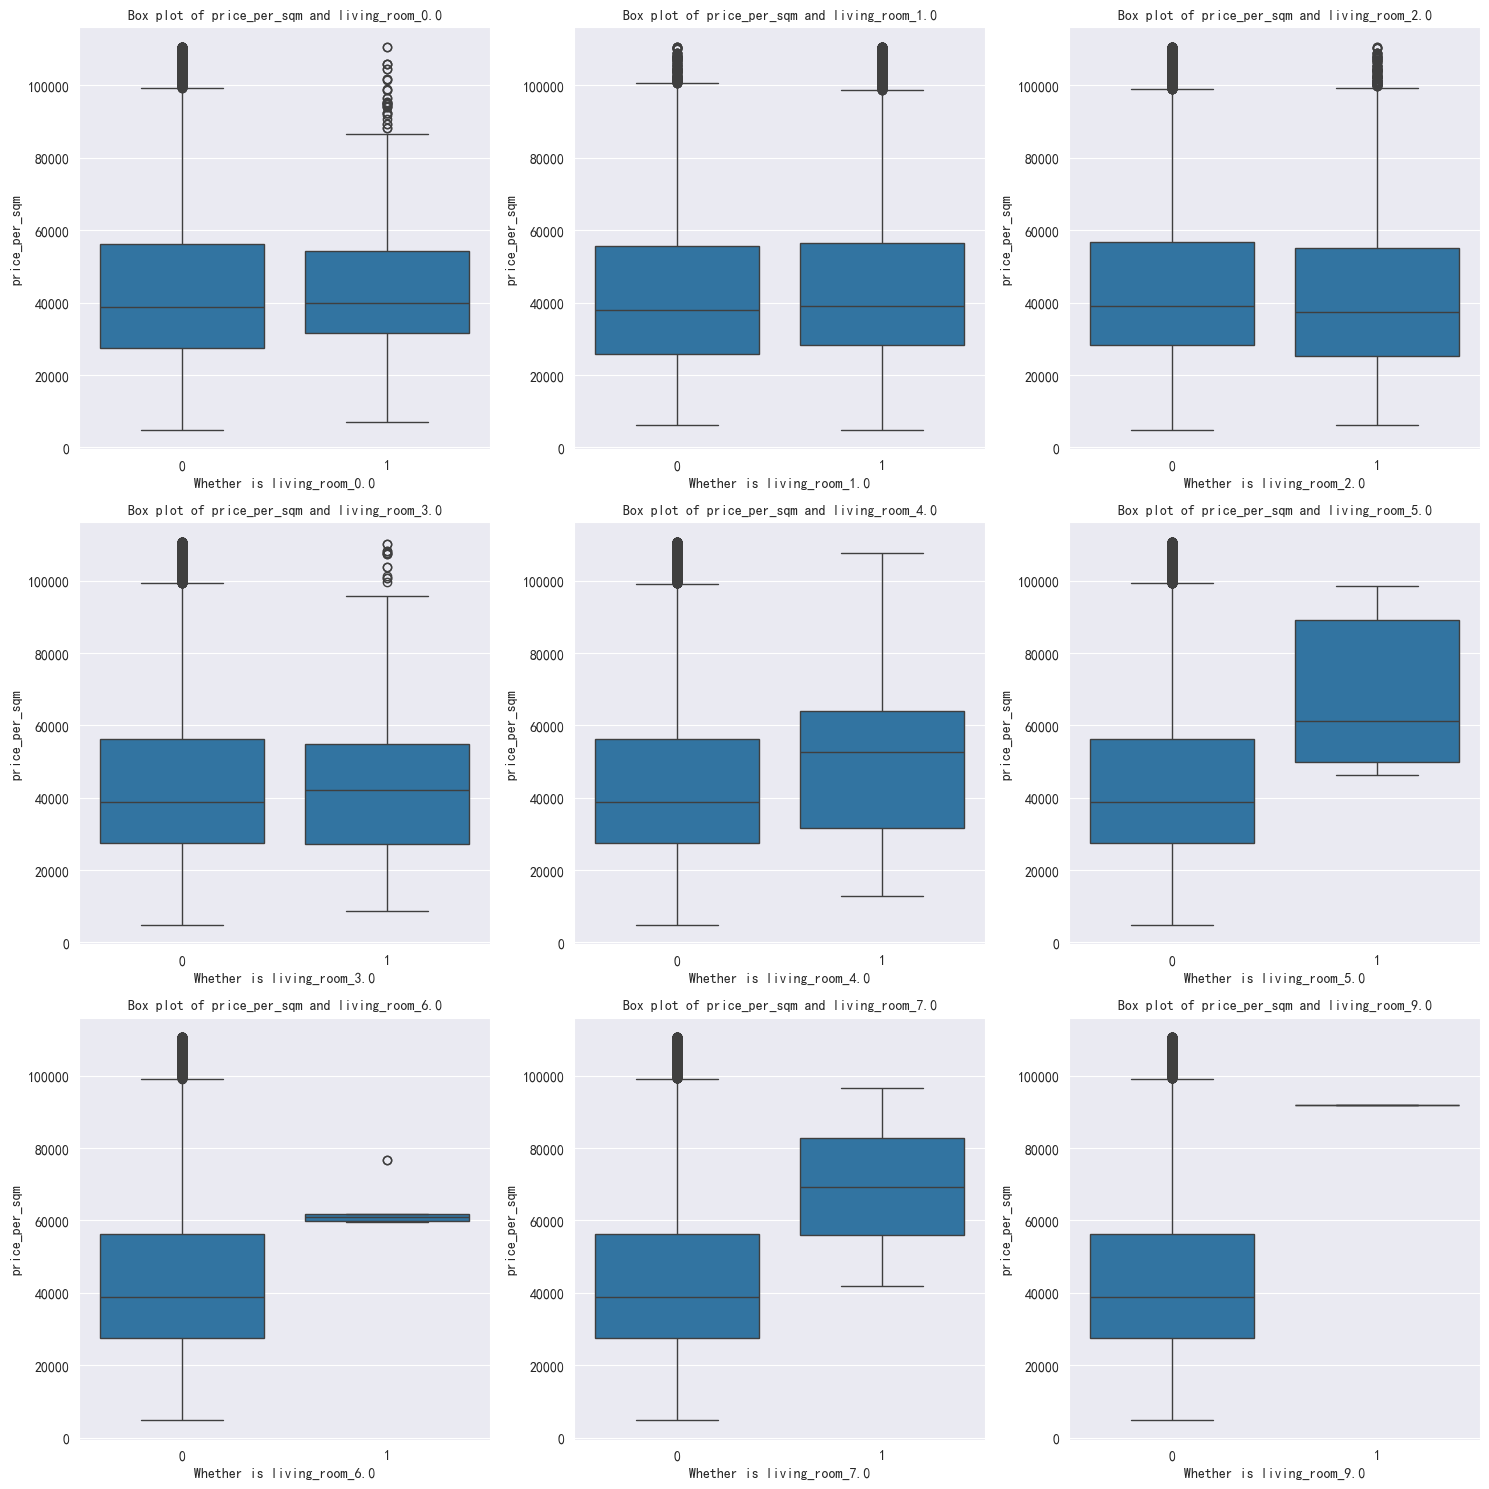

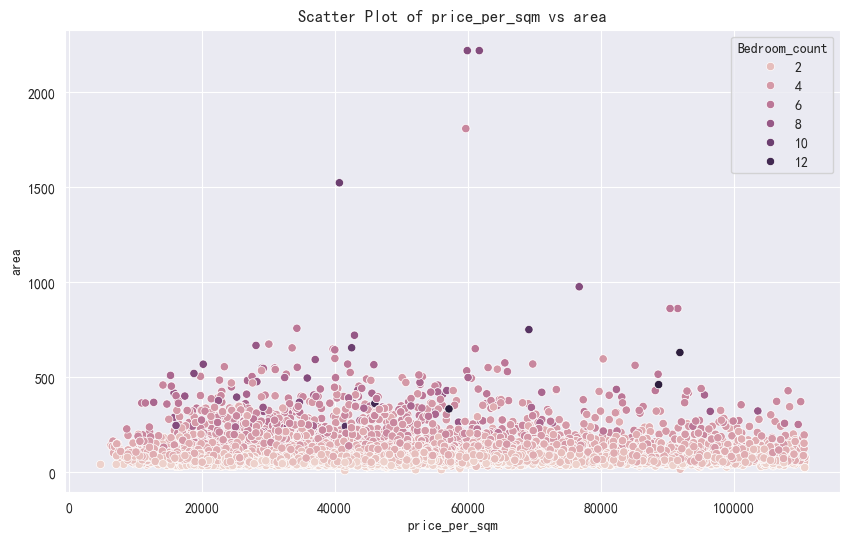

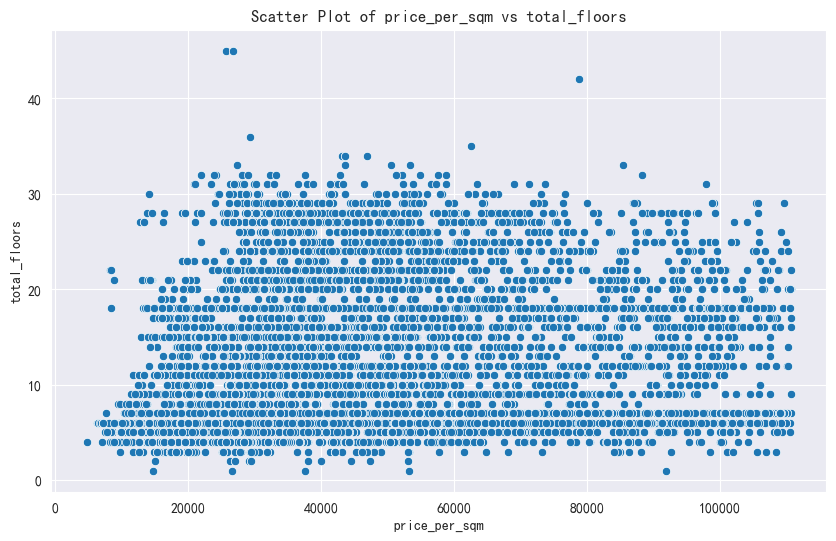

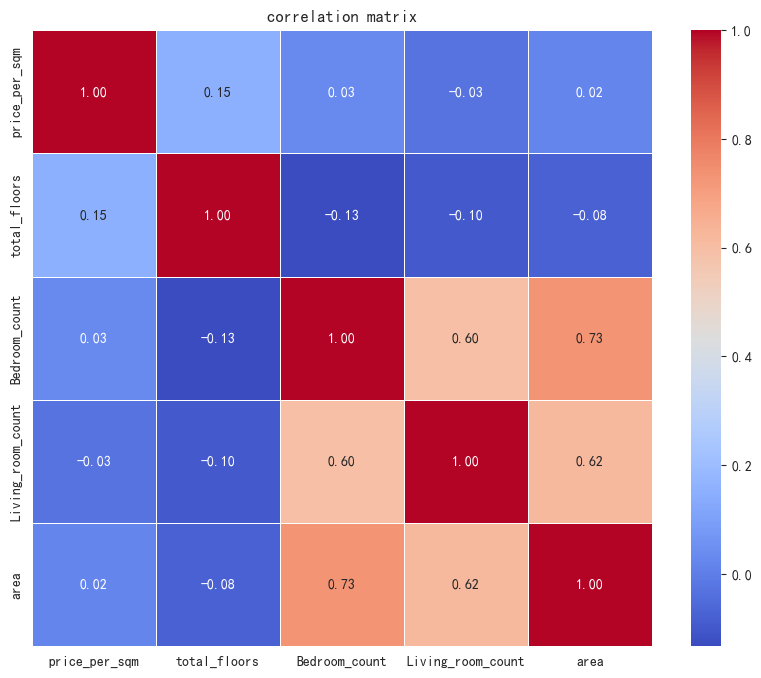

In [14]:
# 对processed_lianjia_data_filtered.csv的数据绘制箱型图
def generate_boxplots(data, keyword, target_column='price_per_sqm', n_cols=3, n_rows=3, figsize=(15, 15)):
    """
    根据关键词生成箱型图。

    参数:
    data (pd.DataFrame): 输入的数据集
    keyword (str): 用于筛选列的关键词
    target_column (str): 目标列，默认为'单价'
    n_cols (int): 每张图中的列数，默认为3
    n_rows (int): 每张图中的行数，默认为3
    figsize (tuple): 图形的大小，默认为(15, 15)
    """
    # 设置全局字体为 SimHei，支持中文
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

    # 筛选出包含关键词的列
    keyword_columns = [col for col in data.columns if keyword in col]
    keyword_columns_len = len(keyword_columns)
    print(f'带有"{keyword}"关键词的列数: {keyword_columns_len}')

    # 每张图的子图数量
    subplots_per_fig = n_rows * n_cols

    # 计算需要多少张图
    total_figs = math.ceil(keyword_columns_len / subplots_per_fig)
    print(f'总共需要生成 {total_figs} 张图')

    # 分别生成每张图
    for fig_idx in range(total_figs):
        start_idx = fig_idx * subplots_per_fig
        end_idx = min(start_idx + subplots_per_fig, keyword_columns_len)

        # 创建一个新的图形
        if n_cols == 1 and n_rows == 1:
            fig, ax = plt.subplots(figsize=figsize)
            axes = [ax]  # 将单个 Axes 对象放入列表中
        else:
            fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=figsize)
            axes = axes.flatten()

        # 绘制箱型图
        for ax, col in zip(axes, keyword_columns[start_idx:end_idx]):
            sns.boxplot(x=data[col], y=data[target_column], ax=ax)
            ax.set_title('Box plot of price_per_sqm and '+col,fontdict={'fontsize': 10})
            ax.set_xlabel('Whether is ' + col)
            ax.set_ylabel(target_column)

        # 关闭多余的子图
        if n_cols == 1 and n_rows == 1:
            pass  # 不需要关闭多余子图
        else:
            for i in range(end_idx - start_idx, len(axes)):
                fig.delaxes(axes[i])

        plt.tight_layout()
        plt.savefig(f'{keyword}_boxplots_{fig_idx + 1}.png')  # 保存图片
        plt.show()

data_houses_processed = pd.read_csv("D:/University of Macau/Introduction to dada science programming/final project/processed_lianjia_data_filtered.csv")
#删除异常值之后的box plot
generate_boxplots(data_houses_processed, 'orientation')
generate_boxplots(data_houses_processed, 'decoration', n_cols=2, n_rows=2)
generate_boxplots(data_houses_processed, 'floor_level', n_cols=3, n_rows=2, figsize=(15, 10))
generate_boxplots(data_houses_processed, 'building_type', n_cols=3, n_rows=1, figsize=(15, 5))
generate_boxplots(data_houses_processed, 'build_year', n_cols=2, n_rows=2)
generate_boxplots(data_houses_processed, 'district_')
generate_boxplots(data_houses_processed, 'near_subway', n_cols=1, n_rows=1, figsize=(5, 5))
generate_boxplots(data_houses_processed, 'owned_over_5y', n_cols=1, n_rows=1, figsize=(5, 5))
generate_boxplots(data_houses_processed, 'has_elevator', n_cols=1, n_rows=1, figsize=(5, 5))
generate_boxplots(data_houses_processed, 'bedroom')
generate_boxplots(data_houses_processed, 'living_room')


## 删除异常值后的scatter plot
# 确保卧室数量列的数据类型是整数
data_houses_processed['Bedroom_count'] = data_houses_processed['Bedroom_count'].astype(int)

# 明确指定卧室数量的类别
unique_bedroom_counts = data_houses_processed['Bedroom_count'].unique()
unique_bedroom_counts.sort()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_houses_processed, x='price_per_sqm', y='area', hue='Bedroom_count')

plt.title('Scatter Plot of price_per_sqm vs area')
plt.xlabel('price_per_sqm')
plt.ylabel('area')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_houses_processed, x='price_per_sqm', y='total_floors')

plt.title('Scatter Plot of price_per_sqm vs total_floors')
plt.xlabel('price_per_sqm')
plt.ylabel('total_floors')
plt.show()

# ## 删除异常值后的相关性矩阵图
# 选择需要的列
columns_of_interest = ['price_per_sqm', 'total_floors', 'Bedroom_count', 'Living_room_count', 'area']
data_subset = data_houses_processed[columns_of_interest]

# 计算相关系数矩阵
correlation_matrix = data_subset.corr()
# 绘制相关性矩阵的热力图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('correlation matrix')
plt.show()


In [6]:
def min_max(features):
    min_vals = features.min(axis=0)
    max_vals = features.max(axis=0)
    
    # 避免除以 0 的情况
    range_vals = max_vals - min_vals
    range_vals[range_vals == 0] = 1  # 如果某列所有值相同，将其范围设为 1，避免除以 0
    
    normalized_features = (features - min_vals) / range_vals
    return normalized_features



全为 0 的列：
['bedroom_0.0', 'bedroom_14.0', 'orientation_east_southeast_north', 'orientation_east_west_southwest', 'orientation_east_southwest_north']


In [7]:
# 从可视化探索得到的五个视觉上最为相关的特征出发，采用逐步向前回归选取预测单价的特征
# forward selection
# 选择相关特征
# 选择基准特征
base_features = ['orientation_south_southwest', 'district_Dongcheng', 'district_Haidian',
                 'district_Xicheng', 'near_subway', 'living_room_5.0', 'area']


# 提取所有非目标列作为候选特征
def forward_selection(data, target_column, base_features, significance_level=0.05):
    remaining_features = [col for col in data.columns if col not in base_features]
    best_features = base_features.copy()

    while len(remaining_features) > 0:
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target_column, sm.add_constant(data[best_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]

        min_p_value = new_pval.min()
        if min_p_value < significance_level:
            best_feature = new_pval.idxmin()
            best_features.append(best_feature)
            remaining_features.remove(best_feature)
            print(f"Added feature: {best_feature}, p-value: {min_p_value:.4f}")
        else:
            break

    return best_features


# 分离特征和目标变量
X = data_houses_processed.drop(columns=['price_per_sqm', 'total_price', 'price_level_low_price', 'price_level_high_price',
                              'price_level_upper_middle_price', 'price_level_middle_price',
                              'price_level_lower_middle_price'])
y = data_houses_processed['price_per_sqm']

# 分割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = min_max(X_train)
X_test=min_max(X_test)
# 使用前向选择方法从基准特征开始筛选最佳特征
selected_features = forward_selection(X_train, y_train, base_features)

print(f"前向选择选出的最佳特征: {selected_features}")

# 使用选出的最佳特征重新构建模型
X_train_best = sm.add_constant(X_train[selected_features])
X_test_best = sm.add_constant(X_test[selected_features])

# 训练最终的线性回归模型
final_model = sm.OLS(y_train, X_train_best).fit()

# 输出模型摘要
print(final_model.summary())

# 在测试集上进行预测
y_pred = final_model.predict(X_test_best)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"均方误差 (MSE): {mse}")
print(f"R² 得分: {r2}")  # 分离特征和目标变量

Added feature: district_Yizhuang, p-value: 0.0000
Added feature: district_Chaoyang, p-value: 0.0000
Added feature: district_Miyun, p-value: 0.0000
Added feature: district_Fengtai, p-value: 0.0000
Added feature: district_Shijingshan, p-value: 0.0000
Added feature: decoration_well_decorated, p-value: 0.0000
Added feature: district_Fangshan, p-value: 0.0000
Added feature: district_Huairou, p-value: 0.0000
Added feature: Bedroom_count, p-value: 0.0000
Added feature: floor_level_top, p-value: 0.0000
Added feature: building_type_plate_tower_mixed, p-value: 0.0000
Added feature: build_year_after_2020, p-value: 0.0000
Added feature: bedroom_2.0, p-value: 0.0000
Added feature: orientation_southwest, p-value: 0.0000
Added feature: district_Changping, p-value: 0.0000
Added feature: district_Pinggu, p-value: 0.0000
Added feature: orientation_east_west, p-value: 0.0000
Added feature: owned_over_5y, p-value: 0.0000
Added feature: floor_level_middle, p-value: 0.0000
Added feature: bedroom_1.0, p-valu

In [10]:
print(len(selected_features))

62


需要 46 个主成分来解释 85% 的方差


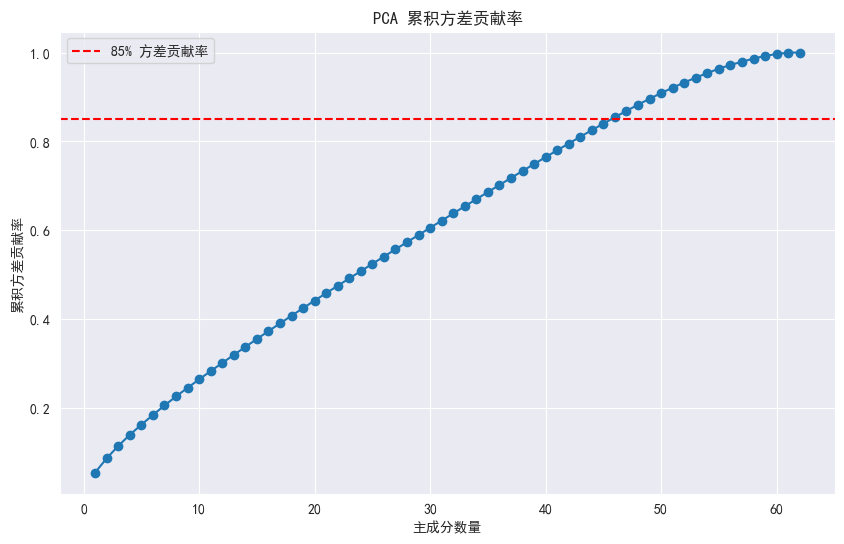

In [9]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# 提取选定的特征
X = data_houses_processed[selected_features]

# 如果需要，分离目标变量
y = data_houses_processed['price_per_sqm']

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 应用 PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 计算累积方差贡献率
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# 找到方差贡献率达到 85% 的主成分数量
n_components_85 = np.argmax(cumulative_variance_ratio >= 0.85) + 1

print(f"需要 {n_components_85} 个主成分来解释 85% 的方差")

# 选择前 n_components_85 个主成分
X_pca_85 = X_pca[:, :n_components_85]

# 绘制累积方差贡献率图
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.axhline(y=0.85, color='r', linestyle='--', label='85% 方差贡献率')
plt.xlabel('主成分数量')
plt.ylabel('累积方差贡献率')
plt.title('PCA 累积方差贡献率')
plt.legend()
plt.grid(True)
plt.show()